### The Libraries

This part of the project is where I will be importing all of the libraries I will use throughout the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

from scipy import stats
import random

### The Data

This part is intended to just upload all of the data that will be used for the project as dataframes.

In [2]:
fi_2014 = pd.read_csv("Financial_Indicators/2014_Financial_Data.csv")
fi_2015 = pd.read_csv("Financial_Indicators/2015_Financial_Data.csv")
fi_2016 = pd.read_csv("Financial_Indicators/2016_Financial_Data.csv")
fi_2017 = pd.read_csv("Financial_Indicators/2017_Financial_Data.csv")
fi_2018 = pd.read_csv("Financial_Indicators/2018_Financial_Data.csv")

In [3]:
for i in fi_2014.columns:
    print(i)

Unnamed: 0
Revenue
Revenue Growth
Cost of Revenue
Gross Profit
R&D Expenses
SG&A Expense
Operating Expenses
Operating Income
Interest Expense
Earnings before Tax
Income Tax Expense
Net Income - Non-Controlling int
Net Income - Discontinued ops
Net Income
Preferred Dividends
Net Income Com
EPS
EPS Diluted
Weighted Average Shs Out
Weighted Average Shs Out (Dil)
Dividend per Share
Gross Margin
EBITDA Margin
EBIT Margin
Profit Margin
Free Cash Flow margin
EBITDA
EBIT
Consolidated Income
Earnings Before Tax Margin
Net Profit Margin
Cash and cash equivalents
Short-term investments
Cash and short-term investments
Receivables
Inventories
Total current assets
Property, Plant & Equipment Net
Goodwill and Intangible Assets
Long-term investments
Tax assets
Total non-current assets
Total assets
Payables
Short-term debt
Total current liabilities
Long-term debt
Total debt
Deferred revenue
Tax Liabilities
Deposit Liabilities
Total non-current liabilities
Total liabilities
Other comprehensive income
Re

In [4]:
# This is a quick check of one of the files.  The files should have very similar information
# with the only difference between them being the year the data was collected.

fi_2014.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


Now I will chekc the shape of all those dataframes.

In [5]:
# This is a quick check on the shape of the datasets.

print('The shape of the 2014 file is:', fi_2014.shape)

print('The shape of the 2015 file is:', fi_2015.shape)

print('The shape of the 2016 file is:', fi_2016.shape)

print('The shape of the 2017 file is:', fi_2017.shape)

print('The shape of the 2018 file is:', fi_2018.shape)

The shape of the 2014 file is: (3808, 225)
The shape of the 2015 file is: (4120, 225)
The shape of the 2016 file is: (4797, 225)
The shape of the 2017 file is: (4960, 225)
The shape of the 2018 file is: (4392, 225)


The shape of the files shows that each one of them have different amounts of rows, which means that some of the files will have more stocks than others.  

The good news is that they all have the same amount of columns/features.  This is good because it makes it possible to merge those files into a single dataframe which makes the project more effective.

The plan is to merge all of these dataframes into a single dataframe.  Since each dataframe is from a different year, before merging them, I will check the sets of stocks in each individual dataframe, which in this case are the very first column of each dataframe.  There needs to be only one of each in each year to avoid repeated information.  To do this check, I will confirm that the amount of unique stocks is equals to the number of rows for each dataframe.  True means the amount of rows and amount of stocks are the same.

In [6]:
print('The check for the 2014 dataframe is', len(fi_2014['Unnamed: 0'].unique()) == fi_2014.shape[0])

print('The check for the 2015 dataframe is', len(fi_2015['Unnamed: 0'].unique()) == fi_2015.shape[0])

print('The check for the 2016 dataframe is', len(fi_2016['Unnamed: 0'].unique()) == fi_2016.shape[0])

print('The check for the 2017 dataframe is', len(fi_2017['Unnamed: 0'].unique()) == fi_2017.shape[0])

print('The check for the 2018 dataframe is', len(fi_2018['Unnamed: 0'].unique()) == fi_2018.shape[0])

The check for the 2014 dataframe is True
The check for the 2015 dataframe is True
The check for the 2016 dataframe is True
The check for the 2017 dataframe is True
The check for the 2018 dataframe is True


Great!  Now we know there are not repeat stocks in each of the dataframes!!!

Now let's perform the same test for the columns.  Each set of unique columns will be compared to the amount of columns in each dataframe.

In [7]:
print('The check for the 2014 dataframe is', len(fi_2014.columns.unique()) == fi_2014.shape[1])

print('The check for the 2015 dataframe is', len(fi_2015.columns.unique()) == fi_2015.shape[1])

print('The check for the 2016 dataframe is', len(fi_2016.columns.unique()) == fi_2016.shape[1])

print('The check for the 2017 dataframe is', len(fi_2017.columns.unique()) == fi_2017.shape[1])

print('The check for the 2018 dataframe is', len(fi_2018.columns.unique()) == fi_2018.shape[1])

The check for the 2014 dataframe is True
The check for the 2015 dataframe is True
The check for the 2016 dataframe is True
The check for the 2017 dataframe is True
The check for the 2018 dataframe is True


Perfect!

The financial indicators in the year 2014 is a good way we can see how the dataset is built.  Since we are dealing with multiple datasets that should have the same kind of information, the column names in all of them should be the same.  That means that the next step is to check just that.

In [8]:
# This step will isolate the column names to check if all files have equal columns.

col_2014 = fi_2014.columns # Isolating the 2014 column names

col_2015 = fi_2015.columns # Isolating the 2015 column names

col_2016 = fi_2016.columns # Isolating the 2016 column names

col_2017 = fi_2017.columns # Isolating the 2017 column names

col_2018 = fi_2018.columns # Isolating the 2018 column names

# Now let's print the column names for the 2014 file just to familiarize with them.
for f in col_2014:
    print(f)

Unnamed: 0
Revenue
Revenue Growth
Cost of Revenue
Gross Profit
R&D Expenses
SG&A Expense
Operating Expenses
Operating Income
Interest Expense
Earnings before Tax
Income Tax Expense
Net Income - Non-Controlling int
Net Income - Discontinued ops
Net Income
Preferred Dividends
Net Income Com
EPS
EPS Diluted
Weighted Average Shs Out
Weighted Average Shs Out (Dil)
Dividend per Share
Gross Margin
EBITDA Margin
EBIT Margin
Profit Margin
Free Cash Flow margin
EBITDA
EBIT
Consolidated Income
Earnings Before Tax Margin
Net Profit Margin
Cash and cash equivalents
Short-term investments
Cash and short-term investments
Receivables
Inventories
Total current assets
Property, Plant & Equipment Net
Goodwill and Intangible Assets
Long-term investments
Tax assets
Total non-current assets
Total assets
Payables
Short-term debt
Total current liabilities
Long-term debt
Total debt
Deferred revenue
Tax Liabilities
Deposit Liabilities
Total non-current liabilities
Total liabilities
Other comprehensive income
Re

In [9]:
# Let's check how the 2014 column names compares to the other files.

print('The number of unequal column names comparing the 2014 dataset with the others:')

print('2014 - 2015:', (col_2014 != col_2015).sum()) # Checking amount of unmatching columns

print('2014 - 2016:', (col_2014 != col_2016).sum()) # Checking amount of unmatching columns

print('2014 - 2017:', (col_2014 != col_2017).sum()) # Checking amount of unmatching columns

print('2014 - 2018:', (col_2014 != col_2018).sum()) # Checking amount of unmatching columns

The number of unequal column names comparing the 2014 dataset with the others:
2014 - 2015: 1
2014 - 2016: 1
2014 - 2017: 1
2014 - 2018: 1


In [10]:
# Let's check which column from the 2014 file does not match the other files column names.

print('The different column name is:\n')

print('2014 - 2015:\n', col_2014[col_2014 != col_2015][0]) # Checking which column name is not matching
print('\n')
print('2014 - 2016:\n', col_2014[col_2014 != col_2016][0]) # Checking which column name is not matching
print('\n')
print('2014 - 2017:\n', col_2014[col_2014 != col_2017][0]) # Checking which column name is not matching
print('\n')
print('2014 - 2018:\n', col_2014[col_2014 != col_2018][0]) # Checking which column name is not matching
print('\n')

The different column name is:

2014 - 2015:
 2015 PRICE VAR [%]


2014 - 2016:
 2015 PRICE VAR [%]


2014 - 2017:
 2015 PRICE VAR [%]


2014 - 2018:
 2015 PRICE VAR [%]




It seems that since the column title (2015 PRICE VAR [%]) contains a 'year' in it.  Since in 2014 the year said 2015, that means that the values in that column is taken at the end of the data year, which means at the beginning of the following year. It can be assumed that for the other years the name will be different, for example the 2015 data will have the column '2016 PRICE VAR [%]'.  What needs to be done is to change the column name by removing the year from it.

The other column name that I feel like needs to be changed is the very first column, which currently is 'Unnamed'.  The name of these columns in each of the dataset will become 'Stock'.

To separate the data by the year, I will create a new column named "Year" which will contain the integer value for the year of the dataset.  This column is created to help organize the dataset when merging them since I believe that many of the stock names will be the same throughout all of the datasets.

In [11]:
fi_2014.rename(columns = {'Unnamed: 0' : 'Stock', # Changing 'Stock' column name
                          '2015 PRICE VAR [%]' : 'PRICE VAR [%]'}, inplace = True) # Changing 'PRICE VAR' column name
fi_2014['Year'] = 2014 # Creating 'Year' Column

fi_2015.rename(columns = {'Unnamed: 0' : 'Stock', # Changing 'Stock' column name
                          '2016 PRICE VAR [%]' : 'PRICE VAR [%]'}, inplace = True) # Changing 'PRICE VAR' column name
fi_2015['Year'] = 2015 # Creating 'Year' Column

fi_2016.rename(columns = {'Unnamed: 0' : 'Stock', # Changing 'Stock' column name
                          '2017 PRICE VAR [%]' : 'PRICE VAR [%]'}, inplace = True) # Changing 'PRICE VAR' column name
fi_2016['Year'] = 2016 # Creating 'Year' Column

fi_2017.rename(columns = {'Unnamed: 0' : 'Stock', # Changing 'Stock' column name
                          '2018 PRICE VAR [%]' : 'PRICE VAR [%]'}, inplace = True) # Changing 'PRICE VAR' column name
fi_2017['Year'] = 2017 # Creating 'Year' Column

fi_2018.rename(columns = {'Unnamed: 0' : 'Stock', # Changing 'Stock' column name
                          '2019 PRICE VAR [%]' : 'PRICE VAR [%]'}, inplace = True) # Changing 'PRICE VAR' column name
fi_2018['Year'] = 2018 # Creating 'Year' Column

Following the columns changes, we will now check its success.  Success in this case means the column names in all of the datasets have to match.

In [12]:
# The first step to check whether the column names match is to isolate the column names from the datasets.

col_2014 = fi_2014.columns # Isolating the 2014 column names

col_2015 = fi_2015.columns # Isolating the 2015 column names

col_2016 = fi_2016.columns # Isolating the 2016 column names

col_2017 = fi_2017.columns # Isolating the 2017 column names

col_2018 = fi_2018.columns # Isolating the 2018 column names

# The second step is to compare and see if they match.

# For this step using just one of the datasets columns, in this case 2014, to compare with the remaining datasets
# will be enough because if there are no unmatching between 2014 and 2015 and 2014 and 2016, logically speaking
# then the 2015 and the 2016 column names should also match.

print('The number of unequal column names comparing the 2014 dataset with the others:')

print('2014 - 2015:', (col_2014 != col_2015).sum()) # Checking amount of unmatching columns

print('2014 - 2016:', (col_2014 != col_2016).sum()) # Checking amount of unmatching columns

print('2014 - 2017:', (col_2014 != col_2017).sum()) # Checking amount of unmatching columns

print('2014 - 2018:', (col_2014 != col_2018).sum()) # Checking amount of unmatching columns

The number of unequal column names comparing the 2014 dataset with the others:
2014 - 2015: 0
2014 - 2016: 0
2014 - 2017: 0
2014 - 2018: 0


With all of the datasets having the same column names, it is time to merge all of the files.

In [13]:
# To merge all files since they all are dataframes already, let's first first make a list of the dataframes.

data_frames = [fi_2014, fi_2015, fi_2016, fi_2017, fi_2018]

# Now just make them into one by creating a blank dataframe and merging the list created above.

df = pd.DataFrame() # Creating empty dataframe
df = df.append(data_frames) # Merging the files dataframes

In [14]:
# Let's check how the new dataframe looks

df

,Stock,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE VAR [%],Class,Year
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,2014
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,2014
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,2014
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1,2014
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0,2018
4388,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0,2018
4389,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0,2018
4390,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0,2018


Now that we can see that the new dataframe is built as we expected, it is time to set the index.  For this dataframe the index will be both the 'Year' and the 'Stock' columns.  The year column will keep the separation of the files within the same dataframe, and the stock column is the original index since each stock has difference feature values. 

In [15]:
# Setting the index of the dataframe

df = df.set_index(['Year', 'Stock'])

In [16]:
# Checking the dataframe with the new index

df.head()

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Year Stock                                                                
2014 PG     7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
     VIPS   3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
     KR     9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
     RAD    2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
     GIS    1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

            R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
Year Stock                                                                     
2014 PG     0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
     VIPS   1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
     KR     0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
     RAD    0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
     GIS    0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

            Interest Expense  Earnings before Tax  ...  Receivables growth  \
Year Stock                                         ...                       
2014 PG         7.090000e+08         1.449400e+10  ...             -0.0187   
     VIPS       1.214869e+07         1.753823e+08  ...                 NaN   
     KR         4.430000e+08         2.270000e+09  ...              0.0618   
     RAD        4.245910e+08         2.502180e+08  ...              0.0211   
     GIS        3.024000e+08         2.707700e+09  ...              0.0257   

            Inventory Growth  Asset Growth  Book Value per Share Growth  \
Year Stock                                                                
2014 PG              -0.0217        0.0359                       0.0316   
     VIPS                NaN           NaN                          NaN   
     KR               0.0981        0.1886                       0.3268   
     RAD             -0.0510       -0.0189                       0.1963   
     GIS              0.0090        0.0215                       0.0274   

            Debt Growth  R&D Expense Growth  SG&A Expenses Growth  \
Year Stock                                                          
2014 PG          0.1228              0.0000               -0.1746   
     VIPS           NaN              1.6484                1.7313   
     KR          0.2738              0.0000                0.0234   
     RAD        -0.0458              0.0000               -0.0060   
     GIS         0.1025              0.0000               -0.0220   

                        Sector  PRICE VAR [%]  Class  
Year Stock                                            
2014 PG     Consumer Defensive      -9.323276      0  
     VIPS   Consumer Defensive     -25.512193      0  
     KR     Consumer Defensive      33.118297      1  
     RAD    Consumer Defensive       2.752291      1  
     GIS    Consumer Defensive      12.897715      1  

[5 rows x 224 columns]

I will now begin cleaning the dataframe.  The first thing that I will do is to eliminate the stocks that have more than 75% of their values missing.  To do that, I will first transpose the dataframe so that I can get the index (stocks and year) as column names.

In [17]:
df_T = df.T

df_T

Year                                2014                      \
Stock                                 PG                VIPS   
Revenue                       7.4401e+10         3.73415e+09   
Revenue Growth                   -0.0713              1.1737   
Cost of Revenue                3.903e+10         2.80563e+09   
Gross Profit                  3.5371e+10         9.28523e+08   
R&D Expenses                           0          1.0833e+08   
...                                  ...                 ...   
R&D Expense Growth                     0              1.6484   
SG&A Expenses Growth             -0.1746              1.7313   
Sector                Consumer Defensive  Consumer Defensive   
PRICE VAR [%]                   -9.32328            -25.5122   
Class                                  0                   0   

Year                                                          \
Stock                                 KR                 RAD   
Revenue                       9.8375e+10         2.55264e+10   
Revenue Growth                    0.0182              0.0053   
Cost of Revenue               7.8138e+10         1.82027e+10   
Gross Profit                  2.0237e+10         7.32373e+09   
R&D Expenses                           0                   0   
...                                  ...                 ...   
R&D Expense Growth                     0                   0   
SG&A Expenses Growth              0.0234              -0.006   
Sector                Consumer Defensive  Consumer Defensive   
PRICE VAR [%]                    33.1183             2.75229   
Class                                  1                   1   

Year                                                          \
Stock                                GIS                  PM   
Revenue                      1.79096e+10          8.0106e+10   
Revenue Growth                    0.0076               0.001   
Cost of Revenue              1.15398e+10          6.0775e+10   
Gross Profit                  6.3698e+09          1.9331e+10   
R&D Expenses                           0                   0   
...                                  ...                 ...   
R&D Expense Growth                     0                   0   
SG&A Expenses Growth              -0.022              0.0161   
Sector                Consumer Defensive  Consumer Defensive   
PRICE VAR [%]                    12.8977             13.9809   
Class                                  1                   1   

Year                                                          \
Stock                                 KO                 WMT   
Revenue                       4.5998e+10         4.76294e+11   
Revenue Growth                   -0.0183              0.0163   
Cost of Revenue               1.7889e+10         3.58069e+11   
Gross Profit                  2.8109e+10         1.18225e+11   
R&D Expenses                           0                   0   
...                                  ...                 ...   
R&D Expense Growth                     0                   0   
SG&A Expenses Growth             -0.0053              0.0307   
Sector                Consumer Defensive  Consumer Defensive   
PRICE VAR [%]                    5.33941            -26.6537   
Class                                  1                   0   

Year                                                          ...  \
Stock                               MDLZ                  MO  ...   
Revenue                       3.4244e+10          2.4522e+10  ...   
Revenue Growth                   -0.0299              0.0023  ...   
Cost of Revenue               2.1647e+10          1.4362e+10  ...   
Gross Profit                  1.2597e+10           1.016e+10  ...   
R&D Expenses                           0                   0  ...   
...                                  ...                 ...  ...   
R&D Expense Growth                     0                   0  ...   
SG&A Expenses Growth             -0.0256       

Now I will collect the stocks that have 75% or more missing values.

In [18]:
missing_75 = df_T.loc[:,df_T.isna().mean() >= 0.75].columns

missing_75

MultiIndex([(2014,  'TWNK'),
            (2014,  'TEDU'),
            (2014,  'ADAP'),
            (2014,  'IMUC'),
            (2014,  'ANTH'),
            (2014, 'CDMOP'),
            (2014, 'CYCCP'),
            (2014,   'HUD'),
            (2014,   'CCZ'),
            (2014, 'HOVNP'),
            ...
            (2018,   'SCD'),
            (2018, 'SLMBP'),
            (2018,  'SSBI'),
            (2018, 'TCBIP'),
            (2018,   'TDI'),
            (2018,   'TDJ'),
            (2018,   'UBP'),
            (2018,   'VCF'),
            (2018, 'VRTSP'),
            (2018, 'WHLRD')],
           names=['Year', 'Stock'], length=1784)

We can see that less than 10% of the stocks has 75% or more missing data in them.  Those stocks will then be extracted from the dataframe because they may be the cause of noise in later stages of the project and there are relatively very few of them.

In [19]:
df.drop(index = missing_75, inplace = True)

df.shape

(20293, 224)

After eliminating stocks with little to no useful information, it is time to begin working on the features.  The first step into checking the features will be to check the average missing values.

In [20]:
mv = pd.DataFrame(df.isna().mean(), columns = ['Average Missing Values']) # Creates a Missing Values DataFrame

mv.sort_values(by = ['Average Missing Values'], inplace = True) # Sorts the DataFrame

mv

,Average Missing Values
Class,0.000000
Sector,0.000000
PRICE VAR [%],0.000000
Gross Profit,0.000000
Financing Cash Flow,0.000148
...,...
10Y Revenue Growth (per Share),0.381807
10Y Shareholders Equity Growth (per Share),0.389100
shortTermCoverageRatios,0.441827
cashConversionCycle,0.999064


I notice that 2 features (cashConversionCycle and operatingCycle) have over 99% of their data missing.  Those features are deemed useless and will be droped in the next step.

In [21]:
df.drop(columns = ['cashConversionCycle', 'operatingCycle'], inplace = True)

In [22]:
df.shape

(20293, 222)

The next step will be to "filter" out the features that have duplicate values and/or names. The first part of this "filtering" stage is to extract the features with duplicate values.  To do that I will tranpose the dataframe and check for stocks with the least amount of missing values.

In [23]:
sorted(df.T.isna().mean())

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

Perfect!

There are now plenty of stocks that have absolutely 0 missing values!

Those stocks will now be used to collect the features that have duplicate values.  For that I will create a sample dataframe that contains only the stocks that has zero missing values, transpose it, and use the duplicated() method.

In [24]:
df_sample = df.T.loc[:,df.T.isna().mean() == 0.0]

In [25]:
df_sample.drop(index = ['Class', 'Sector'], inplace = True)

In [26]:
df_sample

Year                               2014                                     \
Stock                                KO         NWL        CPB         PEP   
Revenue                      4.5998e+10   5.727e+09  8.268e+09  6.6683e+10   
Revenue Growth                  -0.0183      0.0214     0.0268       0.004   
Cost of Revenue              1.7889e+10  3.5236e+09  5.297e+09  3.1238e+10   
Gross Profit                 2.8109e+10  2.2034e+09  2.971e+09  3.5445e+10   
R&D Expenses                          0           0   1.22e+08           0   
...                                 ...         ...        ...         ...   
Book Value per Share Growth     -0.0763     -0.0658     0.3269     -0.2646   
Debt Growth                      0.1258      0.3515    -0.0984      -0.025   
R&D Expense Growth                    0           0    -0.0469           0   
SG&A Expenses Growth            -0.0053      0.0579    -0.0733      0.0164   
PRICE VAR [%]                   5.33941     18.6038    22.6288      8.8867   

Year                                                                          \
Stock                               ADM         TAP          SYY         CHD   
Revenue                      8.1201e+10  4.1463e+09  4.65167e+10  3.2976e+09   
Revenue Growth                  -0.0958     -0.0142       0.0474      0.0323   
Cost of Revenue              7.6433e+10  2.4933e+09  3.83357e+10  1.8447e+09   
Gross Profit                  4.768e+09   1.653e+09  8.18104e+09  1.4529e+09   
R&D Expenses                          0           0            0           0   
...                                 ...         ...          ...         ...   
Book Value per Share Growth      -0.016     -0.0956       0.0203     -0.0624   
Debt Growth                     -0.1761     -0.1657      -0.0539      0.3527   
R&D Expense Growth                    0           0            0           0   
SG&A Expenses Growth             0.0989      -0.025       0.0404      -0.005   
PRICE VAR [%]                  -27.7281     29.9029      5.34612     10.7926   

Year                                                   ...         2018  \
Stock                                 EL          PPC  ...          SGA   
Revenue                      1.09688e+10  8.58336e+09  ...  1.24829e+08   
Revenue Growth                    0.0773       0.0205  ...       0.0565   
Cost of Revenue               2.1582e+09  7.18937e+09  ...   9.3727e+07   
Gross Profit                  8.8106e+09    1.394e+09  ...   3.1102e+07   
R&D Expenses                           0            0  ...            0   
...                                  ...          ...  ...          ...   
Book Value per Share Growth       0.1771       0.4717  ...       0.0263   
Debt Growth                      -0.0009      -0.9953  ...         -0.2   
R&D Expense Growth                     0            0  ...            0   
SG&A Expenses Growth               0.059       0.0424  ...      -0.0256   
PRICE VAR [%]                    17.9308     -17.3446  ...     -5.62535   

Year                                                                          \
Stock                               SSNT         SVT        TGC         TRNS   
Revenue                      4.10003e+07  4.7857e+07  5.871e+06  1.55141e+08   
Revenue Growth                    0.1764      0.1547     0.2537       0.0781   
Cost of Revenue              2.40799e+07  3.5772e+07  3.591e+06    1.177e+08   
Gross Profit                 1.69204e+07  1.2085e+07   2.28e+06   3.7441e+07   
R&D Expenses                           0           0          0            0   
...                                  ...         ...        ...          ...   
Book Value per Share Growth       0.0223      0.0878     0.2417       0.1616   
Debt Growth                        1.603     -0.1372     0.3778      -0.1634   
R&D Expense Growth                     0           0          0            0   
SG&A Expenses Growth               0.289      -0.013     0.0632        0.051   
PRICE VA

In [27]:
duplicated_values = df_sample.loc[df_sample.duplicated(),:]

In [28]:
duplicated_values

Year                               2014                                 \
Stock                                KO        NWL       CPB       PEP   
nIperEBT                       0.763308   0.809167  0.698387   0.74759   
eBTperEBIT                     0.950624   0.885454  0.910426  0.905519   
eBITperRevenue                 0.212661  0.0920726  0.164731   0.14428   
cashFlowCoverageRatios         0.254282    0.25549   0.22391  0.363567   
Operating Cash Flow per Share    2.4196     2.2966    2.8631    6.9622   
Free Cash Flow per Share          1.922       1.71     2.191     5.144   
Cash per Share                   4.1053     0.7222    0.7389    4.0649   
PE ratio                        26.0617    27.8029   15.3007   22.4432   
Price to Sales Ratio             4.0204     1.8031    1.6034     2.171   
POCF ratio                      17.4214    16.2848   14.7459   13.7794   
PFCF ratio                      21.9662    22.2716   23.1014   18.8051   
PB ratio                         6.0879     5.6125    8.2107    8.2378   
PTB ratio                       46.7543          0         0         0   
Debt to Equity                   1.3768     1.3406    2.4861    1.6439   
Debt to Assets                   0.4536     0.3781    0.4949    0.4098   
Current ratio                     1.019      1.214     0.703     1.142   
Interest Coverage               20.2526     8.7301   11.1639   10.5842   
Payout Ratio                      0.753      0.482     0.452     0.588   
ROIC                             0.1004     0.0776    0.1186    0.1227   
Return on Tangible Assets        0.4656     0.3924     0.606    0.3287   
Days Sales Outstanding          35.4383    79.5518   29.5779   36.4053   
Days Payables Outstanding        73.273    42.9625    23.265   71.2451   
Days of Inventory on Hand      -63.2512   -73.3916  -70.0094  -36.7243   
Payables Turnover                1.1559     2.4753    3.5276    1.5615   
Inventory Turnover              14.4262     8.2231    8.5193    20.355   
ROE                              0.2341     0.2041    0.5362    0.3705   

Year                                                                     \
Stock                                ADM       TAP        SYY       CHD   
nIperEBT                         0.71936  0.881647   0.631281  0.662346   
eBTperEBIT                      0.902657  0.800824   0.922631  0.957995   
eBITperRevenue                 0.0426349  0.175578  0.0343826  0.197811   
cashFlowCoverageRatios          0.873322  0.406239   0.546202  0.497239   
Operating Cash Flow per Share     7.5697    6.9654     2.5475    1.9996   
Free Cash Flow per Share          6.2006      5.61      1.723     1.739   
Cash per Share                     1.683     3.378      0.953    1.5655   
PE ratio                         15.1163   26.8058    23.5535   25.7549   
Price to Sales Ratio              0.4123    2.9518     0.4706    3.1971   
POCF ratio                        6.7726    9.5032     14.665   19.5128   
PFCF ratio                        8.3863   13.2846    22.0467   22.6633   
PB ratio                          1.7139     1.758     4.1708    5.0205   
PTB ratio                         2.0719         0     6.9983         0   
Debt to Equity                    0.2883    0.4032     0.5189     0.517   
Debt to Assets                    0.1286    0.2268      0.208    0.2493   
Current ratio                      1.668     0.678       1.53     1.125   
Interest Coverage                 10.273    5.0207    12.9251   23.8066   
Payout Ratio                       0.279     0.532      0.717     0.405   
ROIC                              0.0774    0.0087     0.1155    0.1169   
Return on Tangible Assets         0.1109    0.4894     0.1479    0.5678   
Days Sales Outstanding           12.1545   54.7284    26.6685   35.7407   
Days Payables Outstanding        45.8492   114.879    22.2141   56.1956   
Days of Inventory on Hand       -44.7648  -33.1139   -24.7742  -48.6548   
Payables Turnover                  2.138    0.7122  

The dataframe above tells me which are the duplicate features.  For my next steps I will create a list of those features and use it to drop from the main dataframe.

In [29]:
duplicated_values_columns = list(duplicated_values.index)
duplicated_values_columns

['nIperEBT',
 'eBTperEBIT',
 'eBITperRevenue',
 'cashFlowCoverageRatios',
 'Operating Cash Flow per Share',
 'Free Cash Flow per Share',
 'Cash per Share',
 'PE ratio',
 'Price to Sales Ratio',
 'POCF ratio',
 'PFCF ratio',
 'PB ratio',
 'PTB ratio',
 'Debt to Equity',
 'Debt to Assets',
 'Current ratio',
 'Interest Coverage',
 'Payout Ratio',
 'ROIC',
 'Return on Tangible Assets',
 'Days Sales Outstanding',
 'Days Payables Outstanding',
 'Days of Inventory on Hand',
 'Payables Turnover',
 'Inventory Turnover',
 'ROE']

In [30]:
df.drop(columns = duplicated_values_columns, inplace = True)

In [31]:
df

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Year Stock                                                                
2014 PG     7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
     VIPS   3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
     KR     9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
     RAD    2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
     GIS    1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
...                  ...             ...              ...           ...   
2018 YRIV   0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
     YTEN   5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
     ZKIN   5.488438e+07          0.2210     3.659379e+07  1.829059e+07   
     ZOM    0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
     ZYME   5.301900e+07          0.0243     0.000000e+00  5.301900e+07   

            R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
Year Stock                                                                     
2014 PG     0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
     VIPS   1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
     KR     0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
     RAD    0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
     GIS    0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   
...                  ...           ...                 ...               ...   
2018 YRIV   0.000000e+00  3.755251e+06        3.755251e+06     -3.755251e+06   
     YTEN   4.759000e+06  5.071000e+06        9.830000e+06     -9.274000e+06   
     ZKIN   1.652633e+06  7.020320e+06        8.672953e+06      9.617636e+06   
     ZOM    1.031715e+07  4.521349e+06        1.664863e+07     -1.664863e+07   
     ZYME   5.668400e+07  2.945700e+07        8.614600e+07     -3.312700e+07   

            Interest Expense  Earnings before Tax  ...  Receivables growth  \
Year Stock                                         ...                       
2014 PG         7.090000e+08         1.449400e+10  ...             -0.0187   
     VIPS       1.214869e+07         1.753823e+08  ...                 NaN   
     KR         4.430000e+08         2.270000e+09  ...              0.0618   
     RAD        4.245910e+08         2.502180e+08  ...              0.0211   
     GIS        3.024000e+08         2.707700e+09  ...              0.0257   
...                      ...                  ...  ...                 ...   
2018 YRIV       1.105849e+07        -1.482451e+07  ...              0.0000   
     YTEN       0.000000e+00        -9.170000e+06  ...              0.3445   
     ZKIN       1.239170e+06         8.416324e+06  ...              0.1605   
     ZOM        0.000000e+00        -1.664769e+07  ...              0.8980   
     ZYME       1.660000e+05        -3.438500e+07  ...             -0.4185   

            Inventory Growth  Asset Growth  Book Value per Share Growth  \
Year Stock                                                                
2014 PG              -0.0217        0.0359                       0.0316   
     VIPS                NaN           NaN                          NaN   
     KR               0.0981        0.1886                       0.3268   
     RAD             -0.0510       -0.0189                       0.1963   
     GIS              0.0090        0.0215                       0.0274   
...                      ...           ...                          ...   
2018 YRIV             0.0000       -0.0508                      -0.1409   
     YTEN             0.0000       -0.2323                      -0.8602   
     ZKIN             0.7706        0.2489                       0.4074   
     ZOM              0.0000        0.1568                      -0.2200   
     ZYME             0.0000        0.8519                       0.1325   

         

A greate progress has beem made so far.  Now I will see if there are any features that have duplicate names.  These columns may not have been filtered when looking for duplicate values because some of them may have more missing values than their duplicates.  For this step I will find the feature names that are duplicates and extract the ones that have the most missing values.

To catch duplicate feature names, I will create a list of the dataframe column names lower-cased and no space.

In [32]:
lst1 = [] # Creating an empty list.

for c in df.columns:
    lst1.append(c.replace(' ', '').lower()) # Adding the column names to the list lower-cased and without space.
    
# Let's check the newly created list

lst1


['revenue',
 'revenuegrowth',
 'costofrevenue',
 'grossprofit',
 'r&dexpenses',
 'sg&aexpense',
 'operatingexpenses',
 'operatingincome',
 'interestexpense',
 'earningsbeforetax',
 'incometaxexpense',
 'netincome-non-controllingint',
 'netincome-discontinuedops',
 'netincome',
 'preferreddividends',
 'netincomecom',
 'eps',
 'epsdiluted',
 'weightedaverageshsout',
 'weightedaverageshsout(dil)',
 'dividendpershare',
 'grossmargin',
 'ebitdamargin',
 'ebitmargin',
 'profitmargin',
 'freecashflowmargin',
 'ebitda',
 'ebit',
 'consolidatedincome',
 'earningsbeforetaxmargin',
 'netprofitmargin',
 'cashandcashequivalents',
 'short-terminvestments',
 'cashandshort-terminvestments',
 'receivables',
 'inventories',
 'totalcurrentassets',
 'property,plant&equipmentnet',
 'goodwillandintangibleassets',
 'long-terminvestments',
 'taxassets',
 'totalnon-currentassets',
 'totalassets',
 'payables',
 'short-termdebt',
 'totalcurrentliabilities',
 'long-termdebt',
 'totaldebt',
 'deferredrevenue',
 't

The list is now created and the order of the features in the list is the exact same order they appear in the original dataframe.  To keep this order, I will create a new dataframe out of that list because the index of this new dataframe will be the same index of the column in the original dataframe and by building a dataframe I can use the duplicated() method once again to check for duplicated names.

In [33]:
# Creating the columns names dataframe

col_df = pd.DataFrame({"Column Names" : lst1})

# Checking the column names dataframe

col_df

,Column Names
0,revenue
1,revenuegrowth
2,costofrevenue
3,grossprofit
4,r&dexpenses
...,...
191,r&dexpensegrowth
192,sg&aexpensesgrowth
193,sector
194,pricevar[%]


In [34]:
# Creating the duplicate dataframe with the 'second' names.

duplicates_last = col_df[col_df.duplicated()]

# Creating the duplicate dataframe with the 'first' names.

duplicates_first = col_df[col_df.duplicated(keep = 'last')]

In [35]:
duplicates_last

,Column Names
93,netprofitmargin
141,dividendyield


In [36]:
duplicates_first

,Column Names
30,netprofitmargin
84,dividendyield


There are 2 columns that have the same name but different column index.  To find those columns in the original dataframe I will use the index of the new dataframes.

While fiding the real name, I will also check and see which one of them have the least amount of missing data.  The column with the most missing data will be dropped.

In [37]:
duplicate_column_names = {
                          93 : [df.iloc[:,93].name, df.iloc[:,93].isna().sum()],
                          30 : [df.iloc[:,30].name, df.iloc[:,30].isna().sum()],
                          84 : [df.iloc[:,84].name, df.iloc[:,84].isna().sum()],
                          141 : [df.iloc[:,141].name, df.iloc[:,141].isna().sum()]
                         }
duplicate_column_names = pd.DataFrame.from_dict(duplicate_column_names, orient = 'index',
                                                columns = ['Column Name', 'Missing Values'])



In [38]:
duplicate_column_names.index.name = 'Original Index'

In [39]:
duplicate_column_names

,Column Name,Missing Values
Original Index,,
93,netProfitMargin,1378
30,Net Profit Margin,169
84,dividendYield,1514
141,Dividend Yield,466


The features at index 93 and 84 will be the ones extracted because they have the most missing values then their respective duplicates.

In [40]:
df.drop(columns = [df.iloc[:,93].name, df.iloc[:,84].name], inplace = True)

In [41]:
df

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Year Stock                                                                
2014 PG     7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
     VIPS   3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
     KR     9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
     RAD    2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
     GIS    1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
...                  ...             ...              ...           ...   
2018 YRIV   0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
     YTEN   5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
     ZKIN   5.488438e+07          0.2210     3.659379e+07  1.829059e+07   
     ZOM    0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
     ZYME   5.301900e+07          0.0243     0.000000e+00  5.301900e+07   

            R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
Year Stock                                                                     
2014 PG     0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
     VIPS   1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
     KR     0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
     RAD    0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
     GIS    0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   
...                  ...           ...                 ...               ...   
2018 YRIV   0.000000e+00  3.755251e+06        3.755251e+06     -3.755251e+06   
     YTEN   4.759000e+06  5.071000e+06        9.830000e+06     -9.274000e+06   
     ZKIN   1.652633e+06  7.020320e+06        8.672953e+06      9.617636e+06   
     ZOM    1.031715e+07  4.521349e+06        1.664863e+07     -1.664863e+07   
     ZYME   5.668400e+07  2.945700e+07        8.614600e+07     -3.312700e+07   

            Interest Expense  Earnings before Tax  ...  Receivables growth  \
Year Stock                                         ...                       
2014 PG         7.090000e+08         1.449400e+10  ...             -0.0187   
     VIPS       1.214869e+07         1.753823e+08  ...                 NaN   
     KR         4.430000e+08         2.270000e+09  ...              0.0618   
     RAD        4.245910e+08         2.502180e+08  ...              0.0211   
     GIS        3.024000e+08         2.707700e+09  ...              0.0257   
...                      ...                  ...  ...                 ...   
2018 YRIV       1.105849e+07        -1.482451e+07  ...              0.0000   
     YTEN       0.000000e+00        -9.170000e+06  ...              0.3445   
     ZKIN       1.239170e+06         8.416324e+06  ...              0.1605   
     ZOM        0.000000e+00        -1.664769e+07  ...              0.8980   
     ZYME       1.660000e+05        -3.438500e+07  ...             -0.4185   

            Inventory Growth  Asset Growth  Book Value per Share Growth  \
Year Stock                                                                
2014 PG              -0.0217        0.0359                       0.0316   
     VIPS                NaN           NaN                          NaN   
     KR               0.0981        0.1886                       0.3268   
     RAD             -0.0510       -0.0189                       0.1963   
     GIS              0.0090        0.0215                       0.0274   
...                      ...           ...                          ...   
2018 YRIV             0.0000       -0.0508                      -0.1409   
     YTEN             0.0000       -0.2323                      -0.8602   
     ZKIN             0.7706        0.2489                       0.4074   
     ZOM              0.0000        0.1568                      -0.2200   
     ZYME             0.0000        0.8519                       0.1325   

         

Now that I have taken care of all of the columns that were duplicates, the remaining problem is the amount of missing values.  For that I will check the average missing values per columns.  I have learned earlier that very few of the columns have no missing values.  Since I will be picking from the remaining columns to use in the next phases of the project and to a good array of options, I cannot just keep the features that have 0 missing values.

To try and find out the columns I will keep to choose from, I will first check the average missing values in each of them.

In [42]:
sorted(df.isna().mean())

[0.0,
 0.0,
 0.0,
 0.0,
 0.00014783422855171733,
 0.00014783422855171733,
 0.00034494653328734045,
 0.0006406149903907751,
 0.0006898930665746809,
 0.0012812299807815502,
 0.001330508056965456,
 0.001330508056965456,
 0.001330508056965456,
 0.001330508056965456,
 0.0014783422855171734,
 0.0018725668949884197,
 0.0021189572759079487,
 0.0023653476568274772,
 0.0030059626472182526,
 0.0034494653328734047,
 0.0036958557137929337,
 0.0036958557137929337,
 0.0036958557137929337,
 0.004237914551815897,
 0.004237914551815897,
 0.004237914551815897,
 0.004385748780367614,
 0.004484304932735426,
 0.004878529542206672,
 0.005223476075494012,
 0.005617700684965259,
 0.005617700684965259,
 0.006011925294436505,
 0.006061203370620411,
 0.006110481446804317,
 0.008327994875080076,
 0.008327994875080076,
 0.008327994875080076,
 0.008426551027447889,
 0.008475829103631795,
 0.008771497560735229,
 0.008919331789286946,
 0.009067166017838664,
 0.009215000246390381,
 0.009264278322574288,
 0.009658502932

By doing a quick glance, I can see that most columns has up to 5% of missing data.  Just to be sure, I will check how many columns has up to 5% of missing values.

In [43]:
(df.isna().mean() <= 0.05).sum()

126

126 features gives me a great number of options from which to pick!  I will now keep only those features.

In [44]:
df = df.loc[:,df.isna().mean() <= 0.05]

In [45]:
df

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Year Stock                                                                
2014 PG     7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
     VIPS   3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
     KR     9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
     RAD    2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
     GIS    1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
...                  ...             ...              ...           ...   
2018 YRIV   0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
     YTEN   5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
     ZKIN   5.488438e+07          0.2210     3.659379e+07  1.829059e+07   
     ZOM    0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
     ZYME   5.301900e+07          0.0243     0.000000e+00  5.301900e+07   

            R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
Year Stock                                                                     
2014 PG     0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
     VIPS   1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
     KR     0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
     RAD    0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
     GIS    0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   
...                  ...           ...                 ...               ...   
2018 YRIV   0.000000e+00  3.755251e+06        3.755251e+06     -3.755251e+06   
     YTEN   4.759000e+06  5.071000e+06        9.830000e+06     -9.274000e+06   
     ZKIN   1.652633e+06  7.020320e+06        8.672953e+06      9.617636e+06   
     ZOM    1.031715e+07  4.521349e+06        1.664863e+07     -1.664863e+07   
     ZYME   5.668400e+07  2.945700e+07        8.614600e+07     -3.312700e+07   

            Interest Expense  Earnings before Tax  ...  Free Cash Flow growth  \
Year Stock                                         ...                          
2014 PG         7.090000e+08         1.449400e+10  ...                -0.0695   
     VIPS       1.214869e+07         1.753823e+08  ...                -0.3626   
     KR         4.430000e+08         2.270000e+09  ...                 0.3935   
     RAD        4.245910e+08         2.502180e+08  ...                -0.2691   
     GIS        3.024000e+08         2.707700e+09  ...                -0.1936   
...                      ...                  ...  ...                    ...   
2018 YRIV       1.105849e+07        -1.482451e+07  ...                -2.0605   
     YTEN       0.000000e+00        -9.170000e+06  ...                -0.0716   
     ZKIN       1.239170e+06         8.416324e+06  ...                -3.7263   
     ZOM        0.000000e+00        -1.664769e+07  ...                -0.6197   
     ZYME       1.660000e+05        -3.438500e+07  ...                14.0145   

            Receivables growth  Inventory Growth  Asset Growth  Debt Growth  \
Year Stock                                                                    
2014 PG                -0.0187           -0.0217        0.0359       0.1228   
     VIPS                  NaN               NaN           NaN          NaN   
     KR                 0.0618            0.0981        0.1886       0.2738   
     RAD                0.0211           -0.0510       -0.0189      -0.0458   
     GIS                0.0257            0.0090        0.0215       0.1025   
...                        ...               ...           ...          ...   
2018 YRIV               0.0000            0.0000       -0.0508      -0.0152   
     YTEN               0.3445            0.0000       -0.2323       0.0000   
     ZKIN               0.1605            0.7706        0.2489      -0.0968   
     ZOM                0.8980            0.0000        0.1568       0.0000  

To take care of the remaining missing values, I will check how many stocks I can keep if I only kept the ones that have no missing values.

In [46]:
(df.T.isna().sum() == 0).sum()

17314

After the changes that I have made so far, if I were to eliminate all of the missing values by keeping just the stocks that do not have any missing values, I would be keeping 17314 stocks, which is a very good amount to keep for the next phases of the project.

In [47]:
df = df.loc[df.T.isna().sum() == 0, :]

In [48]:
df

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Year Stock                                                                
2014 PG     7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
     KR     9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
     RAD    2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
     GIS    1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
     PM     8.010600e+10          0.0010     6.077500e+10  1.933100e+10   
...                  ...             ...              ...           ...   
2018 XBIO   0.000000e+00         -1.0000     0.000000e+00  0.000000e+00   
     XELB   3.546600e+07          0.1186     2.702000e+06  3.276400e+07   
     YTEN   5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
     ZKIN   5.488438e+07          0.2210     3.659379e+07  1.829059e+07   
     ZYME   5.301900e+07          0.0243     0.000000e+00  5.301900e+07   

            R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
Year Stock                                                                     
2014 PG              0.0  2.146100e+10        2.146100e+10      1.391000e+10   
     KR              0.0  1.519600e+10        1.751200e+10      2.725000e+09   
     RAD             0.0  6.561162e+09        6.586482e+09      7.372520e+08   
     GIS             0.0  3.474300e+09        3.412400e+09      2.957400e+09   
     PM              0.0  7.001000e+09        7.629000e+09      1.170200e+10   
...                  ...           ...                 ...               ...   
2018 XBIO      2883952.0  4.392375e+06        7.276327e+06     -7.276327e+06   
     XELB            0.0  2.446700e+07        2.883400e+07      3.930000e+06   
     YTEN      4759000.0  5.071000e+06        9.830000e+06     -9.274000e+06   
     ZKIN      1652633.0  7.020320e+06        8.672953e+06      9.617636e+06   
     ZYME     56684000.0  2.945700e+07        8.614600e+07     -3.312700e+07   

            Interest Expense  Earnings before Tax  ...  Free Cash Flow growth  \
Year Stock                                         ...                          
2014 PG         7.090000e+08         1.449400e+10  ...                -0.0695   
     KR         4.430000e+08         2.270000e+09  ...                 0.3935   
     RAD        4.245910e+08         2.502180e+08  ...                -0.2691   
     GIS        3.024000e+08         2.707700e+09  ...                -0.1936   
     PM         1.052000e+09         1.059000e+10  ...                -0.2629   
...                      ...                  ...  ...                    ...   
2018 XBIO      -5.090000e+02        -7.300458e+06  ...                -5.3379   
     XELB       1.011000e+06         2.919000e+06  ...                 0.1450   
     YTEN       0.000000e+00        -9.170000e+06  ...                -0.0716   
     ZKIN       1.239170e+06         8.416324e+06  ...                -3.7263   
     ZYME       1.660000e+05        -3.438500e+07  ...                14.0145   

            Receivables growth  Inventory Growth  Asset Growth  Debt Growth  \
Year Stock                                                                    
2014 PG                -0.0187           -0.0217        0.0359       0.1228   
     KR                 0.0618            0.0981        0.1886       0.2738   
     RAD                0.0211           -0.0510       -0.0189      -0.0458   
     GIS                0.0257            0.0090        0.0215       0.1025   
     PM                 0.0392           -0.1274       -0.0781       0.0642   
...                        ...               ...           ...          ...   
2018 XBIO               0.0000            0.0000       -0.2470       0.0000   
     XELB               0.2910            0.0000        0.0225      -0.2154   
     YTEN               0.3445            0.0000       -0.2323       0.0000   
     ZKIN               0.1605            0.7706        0.2489      -0.0968  

In [49]:
df[df['Gross Profit'] != (df.Revenue - df['Cost of Revenue'])]

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Year Stock                                                                
2014 BRFS   1.089253e+10         -0.0745     7.697109e+09  3.195419e+09   
     FMX    1.786579e+10         -0.0971     1.039455e+10  7.471246e+09   
     DEO    1.747530e+10          0.0158     6.863714e+09  1.061158e+10   
     CCU    2.142262e+09         -0.0596     9.977732e+08  1.144488e+09   
     CRESY  5.660192e+08         -0.1365     3.415294e+08  2.244898e+08   
...                  ...             ...              ...           ...   
2018 RCON   1.283516e+07          0.4563     1.220634e+07  6.288159e+05   
     SIFY   3.177514e+08          0.1194     2.063740e+08  1.113773e+08   
     SIM    1.820319e+09          0.2476     1.559353e+09  2.609662e+08   
     TURN  -7.008000e+06          0.3342     0.000000e+00  6.858360e+05   
     WILC   8.995878e+07          0.0012     6.383830e+07  2.612048e+07   

            R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
Year Stock                                                                     
2014 BRFS         0.0000  1.734360e+09        1.898873e+09      1.296545e+09   
     FMX          0.0000  5.375017e+09        5.375017e+09      2.096229e+09   
     DEO          0.0000  2.759796e+09        6.000000e+09      4.611584e+09   
     CCU          0.0000  8.895616e+08        8.475343e+08      2.969540e+08   
     CRESY        0.0000  1.090484e+08        1.070814e+08      1.174084e+08   
...                  ...           ...                 ...               ...   
2018 RCON    487220.1515  6.469798e+06        6.829558e+06     -6.200742e+06   
     SIFY         0.0000  6.750866e+07        9.446008e+07      1.691724e+07   
     SIM          0.0000  5.510265e+07        5.510265e+07      2.058636e+08   
     TURN         0.0000  4.855031e+06        3.035664e+06      1.122000e+06   
     WILC         0.0000  1.609282e+07        1.607447e+07      1.004601e+07   

            Interest Expense  Earnings before Tax  ...  Free Cash Flow growth  \
Year Stock                                         ...                          
2014 BRFS       9.656403e+08         9.679309e+08  ...                -0.9983   
     FMX        4.544283e+08         1.556626e+09  ...                 0.0862   
     DEO        0.000000e+00         4.591141e+09  ...                -0.0100   
     CCU        3.789076e+07         2.763976e+08  ...                -1.6101   
     CRESY      3.506270e+08        -1.791247e+08  ...                 0.3155   
...                      ...                  ...  ...                    ...   
2018 RCON       1.359880e+05        -6.675165e+06  ...                -3.0894   
     SIFY       7.631029e+06         1.418733e+07  ...                 2.4140   
     SIM        8.423980e+05         2.247862e+08  ...                 7.5176   
     TURN       0.000000e+00         1.122000e+06  ...                 1.3901   
     WILC      -6.000000e+05         8.727926e+06  ...                 0.9238   

            Receivables growth  Inventory Growth  Asset Growth  Debt Growth  \
Year Stock                                                                    
2014 BRFS              -0.1907           -0.1619       -0.0113       0.0349   
     FMX               -0.0433           -0.1674       -0.0736      -0.0415   
     DEO                0.1376            0.1232        0.0285       0.0293   
     CCU               -0.0179           -0.0110       -0.1119      -0.3415   
     CRESY             -0.2854            0.1538        0.5330      -0.0793   
...                        ...               ...           ...          ...   
2018 RCON              -0.1276            1.6553        0.7674       0.8425   
     SIFY               0.2169           -0.4550        0.1331       0.1742   
     SIM                0.1829            0.1942        0.0664      -0.9940   
     TURN               0.0213            0.0000       -0.0009      -1.0000  

In [50]:
df.loc[:,(df == 0).mean() <= 0.05]

Revenue  Revenue Growth  Gross Profit  SG&A Expense  \
Year Stock                                                             
2014 PG     7.440100e+10         -0.0713  3.537100e+10  2.146100e+10   
     KR     9.837500e+10          0.0182  2.023700e+10  1.519600e+10   
     RAD    2.552641e+10          0.0053  7.323734e+09  6.561162e+09   
     GIS    1.790960e+10          0.0076  6.369800e+09  3.474300e+09   
     PM     8.010600e+10          0.0010  1.933100e+10  7.001000e+09   
...                  ...             ...           ...           ...   
2018 XBIO   0.000000e+00         -1.0000  0.000000e+00  4.392375e+06   
     XELB   3.546600e+07          0.1186  3.276400e+07  2.446700e+07   
     YTEN   5.560000e+05         -0.4110  5.560000e+05  5.071000e+06   
     ZKIN   5.488438e+07          0.2210  1.829059e+07  7.020320e+06   
     ZYME   5.301900e+07          0.0243  5.301900e+07  2.945700e+07   

            Operating Expenses  Operating Income  Earnings before Tax  \
Year Stock                                                              
2014 PG           2.146100e+10      1.391000e+10         1.449400e+10   
     KR           1.751200e+10      2.725000e+09         2.270000e+09   
     RAD          6.586482e+09      7.372520e+08         2.502180e+08   
     GIS          3.412400e+09      2.957400e+09         2.707700e+09   
     PM           7.629000e+09      1.170200e+10         1.059000e+10   
...                        ...               ...                  ...   
2018 XBIO         7.276327e+06     -7.276327e+06        -7.300458e+06   
     XELB         2.883400e+07      3.930000e+06         2.919000e+06   
     YTEN         9.830000e+06     -9.274000e+06        -9.170000e+06   
     ZKIN         8.672953e+06      9.617636e+06         8.416324e+06   
     ZYME         8.614600e+07     -3.312700e+07        -3.438500e+07   

              Net Income  Net Income Com   EPS  ...  Operating Income Growth  \
Year Stock                                      ...                            
2014 PG     1.164300e+10    1.164300e+10  4.19  ...                   0.0067   
     KR     1.519000e+09    1.519000e+09  1.47  ...                  -0.0141   
     RAD    2.494140e+08    2.154160e+08  4.60  ...                   0.1113   
     GIS    1.824400e+09    1.824400e+09  2.90  ...                   0.0370   
     PM     7.493000e+09    7.493000e+09  4.76  ...                  -0.1341   
...                  ...             ...   ...  ...                      ...   
2018 XBIO  -7.300458e+06   -7.300458e+06 -9.60  ...                  -1.0389   
     XELB   1.088000e+06    1.088000e+06  0.06  ...                   1.4262   
     YTEN  -9.170000e+06   -9.170000e+06 -0.92  ...                   0.0010   
     ZKIN   7.018114e+06    7.018114e+06  0.52  ...                   0.1903   
     ZYME  -3.655600e+07   -3.655600e+07 -1.26  ...                  -2.6816   

            Net Income Growth  EPS Growth  EPS Diluted Growth  \
Year Stock                                                      
2014 PG                0.0293      0.0371              0.0389   
     KR                0.0147      0.0576              0.0469   
     RAD               1.0043      0.9167              0.9167   
     GIS              -0.0166      0.0140              0.0143   
     PM               -0.1263     -0.0951             -0.0951   
...                       ...         ...                 ...   
2018 XBIO             -1.0307     -0.9512             -0.9512   
     XELB              1.1075      1.1091              1.1091   
     YTEN              0.1527      0.7204              0.7204   
     ZKIN              0.1947     -0.0714             -0.0714   
     ZYME             -2.5130     -1.4706             -0.9688   

            Operating Cash Flow growth  Free Cash Flow growth  Asset Growth  \
Year Stock                                                                    
2014 PG                        -0.0615                -0.0695        0.0359   
     K

Now that I have sets of stocks and features that do not have any missing values, I feel confident in picking the features that I will be using for the continuation of this project.

The decisions will be made according to profitability, liquidity, leverage, marketability, and activity of the company.  Some of the features to be used will be created according to the features that were left from the previous stages.  All of the features to be chosen will be put in a list called *final features*

The profitability of a company indicates the ability the company has to generate profit (revenues - cost).  The rates to be used for this check will be:

    1. Return on Assets (ROA) - Measures a company ability to generate income from its assets.
    
    2. Return on Equity (ROE) - A measure of the profitability of a corporation in relation to stockholders’ equity.
    
    3. Profit Margin - indicates how many cents of profit has been generated for each dollar of sale.

Let's create the total assets feature.

In [51]:
df['Return on Assets'] = df['Net Income'] / df['Total assets']

C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df['Return on Assets']

Year  Stock
2014  PG       0.080705
      KR       0.051877
      RAD      0.035913
      GIS      0.078822
      PM       0.212948
                 ...   
2018  XBIO    -0.505884
      XELB     0.007881
      YTEN    -0.707562
      ZKIN     0.091862
      ZYME    -0.149597
Name: Return on Assets, Length: 17314, dtype: float64

Now I will create the list for the final features and put return on assets, return on equity and profit margin in it.

In [53]:
final_features = ['Return on Assets', 'returnOnEquity', 'Profit Margin']

The Liquidity ratios of a company measures its ability to meet short-term debt obligations without raising additional capital.  The features that I will be using to represent the liquidity ratios are:

    1. Current Ratio - A liquidity ratio that measures a company's ability to pay short-term obligations or those due within one year.
    
    2.  Quick Ratio - Indicates a company's capacity to pay its current liabilities without needing to sell its inventory or get additional financing.
    
    3. Cash Ratio - indicates a company's ability to repay its short-term debt with cash or near-cash resources, such as easily marketable securities.

Let's create the current ratio, quick ratio and cash ratio features.

In [54]:
df['Current Ratio'] = df['Total current assets'] / df['Total current liabilities']

C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df['Current Ratio']

Year  Stock
2014  PG       0.937467
      KR       0.824848
      RAD      1.708956
      GIS      0.810086
      PM       1.024616
                 ...   
2018  XBIO     0.746331
      XELB     1.481447
      YTEN     3.886045
      ZKIN     1.644405
      ZYME     6.815481
Name: Current Ratio, Length: 17314, dtype: float64

In [56]:
df['Quick Ratio'] = (df['Cash and cash equivalents'] + df['Receivables'] + df['Investments']) / df['Total current liabilities']

C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
df['Quick Ratio']

Year  Stock
2014  PG       0.506197
      KR       0.141709
      RAD      0.436885
      GIS      0.433465
      PM       0.447922
                 ...   
2018  XBIO     0.398875
      XELB     1.323467
      YTEN     3.815356
      ZKIN     1.189722
      ZYME     6.720436
Name: Quick Ratio, Length: 17314, dtype: float64

In [58]:
df['Cash Ratio'] = df['Cash and cash equivalents'] / df['Total current liabilities']

C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
df['Cash Ratio']

Year  Stock
2014  PG       0.253751
      KR       0.037459
      RAD      0.058388
      GIS      0.159915
      PM       0.111302
                 ...   
2018  XBIO     0.398875
      XELB     0.548337
      YTEN     2.044485
      ZKIN     0.196330
      ZYME     1.407490
Name: Cash Ratio, Length: 17314, dtype: float64

now I will append current ratio, quick ratio and cash ratio to the final feature list.

In [60]:
liquidity = ['Current Ratio', 'Quick Ratio', 'Cash Ratio']

for i in liquidity:
    final_features.append(i)

In [61]:
final_features

['Return on Assets',
 'returnOnEquity',
 'Profit Margin',
 'Current Ratio',
 'Quick Ratio',
 'Cash Ratio']

The next step will be to take care of the features that indicates the amount of debt a company incurs in relation to its equity and assets.  These features are:

    1. Debt Ratio - A financial ratio that measures the extent of a company’s leverage.  It can be interpreted as the proportion of a company’s assets that are financed by debt.
    
    2. Debt to Equity Ratio - It indicates the degree to which its operations are funded by debt and whether shareholders’ equity can cover total liabilities.
    
    3. Interest Coverage Ratio - Used to determine how easily a company can pay its interest expenses on outstanding debt.
    
    4. Cash Flow to Debt Ratio - Used to determine how long it would take a company to repay its debt if it devoted all of its cash flow to debt repayment.

Let's create the cash flow to debt ratio.

In [62]:
df['Cash Flow to Debt Ratio'] = df['Operating Cash Flow'] / df['Total debt']

C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
df['Cash Flow to Debt Ratio']

Year  Stock
2014  PG       0.394105
      KR       0.315915
      RAD      0.121943
      GIS      0.289217
      PM       0.262740
                 ...   
2018  XBIO         -inf
      XELB     0.336807
      YTEN    -1.354060
      ZKIN    -0.115980
      ZYME          inf
Name: Cash Flow to Debt Ratio, Length: 17314, dtype: float64

Now let's add the coverage features to the final features list.

In [64]:
coverage_features = ['debtRatio', 'debtEquityRatio', 'interestCoverage', 'Cash Flow to Debt Ratio']

for i in coverage_features:
    final_features.append(i)

In [65]:
final_features

['Return on Assets',
 'returnOnEquity',
 'Profit Margin',
 'Current Ratio',
 'Quick Ratio',
 'Cash Ratio',
 'debtRatio',
 'debtEquityRatio',
 'interestCoverage',
 'Cash Flow to Debt Ratio']

Now, I will pick the Market Ratios.  The market ratios are used to evaluate the share price of a company. The features that I will pick for this section are:

    1. Price to Earnings Ratio - Is the ratio for valuing a company that measures its current share price relative to its per-share earnings (EPS).
    
    2. Price Earning to Growth Ratio - The 'PEG ratio' is a valuation metric for determining the relative trade-off between the price of a stock, the earnings generated per share, and the company's expected growth.
    
    3. Price to Sales Ratio - Is calculated by taking a company's market capitalization (the number of outstanding shares multiplied by the share price) and divide it by the company's total sales or revenue over the past 12 months. The lower the P/S ratio, the more attractive the investment.
    
    4. Dividend Yield - Shows how much a company pays out in dividends each year relative to its stock price.
    
    5. Dividend Payout Ratio - The ratio of the total amount of dividends paid out to shareholders relative to the net income of the company.

Let's calculate the price earnings to growth ratio.

In [66]:
df['Price Earnings to Growth Ratio'] = df['priceEarningsRatio'] / df['EPS Growth']

C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df['Price Earnings to Growth Ratio']

Year  Stock
2014  PG        505.568733
      KR        208.923611
      RAD        31.208356
      GIS      1335.957143
      PM       -179.929548
                  ...     
2018  XBIO       -0.000000
      XELB       16.980705
      YTEN        0.000000
      ZKIN      -86.187675
      ZYME       -0.000000
Name: Price Earnings to Growth Ratio, Length: 17314, dtype: float64

Let's now create the dividend payout ratio.

In [68]:
df['Dividend Payout Ratio'] = df['Dividend payments'] / df['Net Income']

C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df['Dividend Payout Ratio']

Year  Stock
2014  PG      -0.593576
      KR      -0.210007
      RAD      0.000000
      GIS     -0.538972
      PM      -0.805418
                 ...   
2018  XBIO    -0.000000
      XELB     0.000000
      YTEN    -0.000000
      ZKIN     0.000000
      ZYME    -0.000000
Name: Dividend Payout Ratio, Length: 17314, dtype: float64

Now let's add the market ratio features to the final features list.

In [70]:
market_features = ['priceEarningsRatio', 'Price Earnings to Growth Ratio', 
                   'priceToSalesRatio', 'Dividend Yield', 'Dividend Payout Ratio']

for i in market_features:
    final_features.append(i)

In [71]:
final_features

['Return on Assets',
 'returnOnEquity',
 'Profit Margin',
 'Current Ratio',
 'Quick Ratio',
 'Cash Ratio',
 'debtRatio',
 'debtEquityRatio',
 'interestCoverage',
 'Cash Flow to Debt Ratio',
 'priceEarningsRatio',
 'Price Earnings to Growth Ratio',
 'priceToSalesRatio',
 'Dividend Yield',
 'Dividend Payout Ratio']

And finally the activity ratio.  The activity ratio indicates the company's efficiency in generating sales from its assets.  The features I will select to represent the market ratios are:

    1. Asset Turnover Ratio - This metric helps investors understand how effectively companies are using their assets to generate sales.
    
    2. Inventory Turnover Ratio - It is used to determine how effectively a company’s inventory is managed and how quickly its products are sold.
    
    3. Receivables Turnover Ratio - It highlights the company’s efficiency in issuing credit and collecting money owed by its clients.

Let's add the activity features into the final features list.

In [72]:
activity_features = ['assetTurnover', 'inventoryTurnover', 'Receivables Turnover']

for i in activity_features:
    final_features.append(i)

On top of those features, the other features that I will be using that I find essential are:

    1. Price Variance - Price variation has been computed in terms of Adjusted closing prices. To obtain the percent price variation: (price(end) - price(start)) / price(start); where start is the first trading day of the year (Jan) and end is the last trading day of the year (dec).
    
    2. Sector - Indicates in which industry the company does business.
    
    3. Class - Indicates which stocks are recommended to buy (1 for yes and 0 for no).

Let's add those 3 features to the list.

In [73]:
additional_features = ['PRICE VAR [%]',  'Sector', 'Class']

for i in additional_features:
    final_features.append(i)

In [74]:
final_features

['Return on Assets',
 'returnOnEquity',
 'Profit Margin',
 'Current Ratio',
 'Quick Ratio',
 'Cash Ratio',
 'debtRatio',
 'debtEquityRatio',
 'interestCoverage',
 'Cash Flow to Debt Ratio',
 'priceEarningsRatio',
 'Price Earnings to Growth Ratio',
 'priceToSalesRatio',
 'Dividend Yield',
 'Dividend Payout Ratio',
 'assetTurnover',
 'inventoryTurnover',
 'Receivables Turnover',
 'PRICE VAR [%]',
 'Sector',
 'Class']

In [75]:
indicators = df[final_features]

In [76]:
indicators.head()

Return on Assets  returnOnEquity  Profit Margin  Current Ratio  \
Year Stock                                                                   
2014 PG             0.080705          0.1664          0.156       0.937467   
     KR             0.051877          0.2821          0.015       0.824848   
     RAD            0.035913         -0.1180          0.008       1.708956   
     GIS            0.078822          0.2792          0.102       0.810086   
     PM             0.212948         -0.5933          0.094       1.024616   

            Quick Ratio  Cash Ratio  debtRatio  debtEquityRatio  \
Year Stock                                                        
2014 PG        0.506197    0.253751     0.2455           0.5061   
     KR        0.141709    0.037459     0.3863           2.1007   
     RAD       0.436885    0.058388     0.8290          -2.7237   
     GIS       0.433465    0.159915     0.3796           1.3445   
     PM        0.447922    0.111302     0.8371          -2.3323   

            interestCoverage  Cash Flow to Debt Ratio  ...  \
Year Stock                                             ...   
2014 PG              21.4429                 0.394105  ...   
     KR               6.1242                 0.315915  ...   
     RAD              1.5893                 0.121943  ...   
     GIS              9.9540                 0.289217  ...   
     PM              11.0665                 0.262740  ...   

            Price Earnings to Growth Ratio  priceToSalesRatio  Dividend Yield  \
Year Stock                                                                      
2014 PG                         505.568733             2.8583          0.0311   
     KR                         208.923611             0.1858          0.0174   
     RAD                         31.208356             0.2491          0.0000   
     GIS                       1335.957143             1.8610          0.0286   
     PM                        -179.929548             1.5798          0.0476   

            Dividend Payout Ratio  assetTurnover  inventoryTurnover  \
Year Stock                                                            
2014 PG                 -0.593576       0.515721            10.8869   
     KR                 -0.210007       3.359687            18.2227   
     RAD                 0.000000       3.675578             8.3030   
     GIS                -0.538972       0.773777            11.5363   
     PM                 -0.805418       2.276579             8.6892   

            Receivables Turnover  PRICE VAR [%]              Sector Class  
Year Stock                                                                 
2014 PG                  11.5404      -9.323276  Consumer Defensive     0  
     KR                  90.7937      33.118297  Consumer Defensive     1  
     RAD                 27.1769       2.752291  Consumer Defensive     1  
     GIS                 12.2250      12.897715  Consumer Defensive     1  
     PM                  20.3910      13.980937  Consumer Defensive     1  

[5 rows x 21 columns]

For the porpuses of cleanliness, I will change the column names to make them more readable.

In [77]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       'Sector', 'PRICE VAR [%]', 'Class', 'Return on Assets', 'Current Ratio',
       'Quick Ratio', 'Cash Ratio', 'Cash Flow to Debt Ratio',
       'Price Earnings to Growth Ratio', 'Dividend Payout Ratio'],
      dtype='object', length=133)

In [78]:
col_names = [
             'Return on Assets',
             'Return on Equity',
             'Profit Margin',
             'Current Ratio',
             'Quick Ratio',
             'Cash Ratio',
             'Debt Ratio',
             'Debt to Equity Ratio',
             'Interest Coverage',
             'Cash Flow to Debt Ratio',
             'Price Earnings Ratio',
             'Price Earnings to Growth Ratio',
             'Price to Sales Ratio',
             'Dividend Yield',
             'Dividend Payout Ratio',
             'Asset Turnover Ratio',
             'Inventory Turnover Ratio',
             'Receivables Turnover',
             'PRICE VAR [%]',
             'Sector',
             'Class'
            ]

In [79]:
indicators.columns = col_names

In [80]:
indicators.head()

Return on Assets  Return on Equity  Profit Margin  Current Ratio  \
Year Stock                                                                     
2014 PG             0.080705            0.1664          0.156       0.937467   
     KR             0.051877            0.2821          0.015       0.824848   
     RAD            0.035913           -0.1180          0.008       1.708956   
     GIS            0.078822            0.2792          0.102       0.810086   
     PM             0.212948           -0.5933          0.094       1.024616   

            Quick Ratio  Cash Ratio  Debt Ratio  Debt to Equity Ratio  \
Year Stock                                                              
2014 PG        0.506197    0.253751      0.2455                0.5061   
     KR        0.141709    0.037459      0.3863                2.1007   
     RAD       0.436885    0.058388      0.8290               -2.7237   
     GIS       0.433465    0.159915      0.3796                1.3445   
     PM        0.447922    0.111302      0.8371               -2.3323   

            Interest Coverage  Cash Flow to Debt Ratio  ...  \
Year Stock                                              ...   
2014 PG               21.4429                 0.394105  ...   
     KR                6.1242                 0.315915  ...   
     RAD               1.5893                 0.121943  ...   
     GIS               9.9540                 0.289217  ...   
     PM               11.0665                 0.262740  ...   

            Price Earnings to Growth Ratio  Price to Sales Ratio  \
Year Stock                                                         
2014 PG                         505.568733                2.8583   
     KR                         208.923611                0.1858   
     RAD                         31.208356                0.2491   
     GIS                       1335.957143                1.8610   
     PM                        -179.929548                1.5798   

            Dividend Yield  Dividend Payout Ratio  Asset Turnover Ratio  \
Year Stock                                                                
2014 PG             0.0311              -0.593576              0.515721   
     KR             0.0174              -0.210007              3.359687   
     RAD            0.0000               0.000000              3.675578   
     GIS            0.0286              -0.538972              0.773777   
     PM             0.0476              -0.805418              2.276579   

            Inventory Turnover Ratio  Receivables Turnover  PRICE VAR [%]  \
Year Stock                                                                  
2014 PG                      10.8869               11.5404      -9.323276   
     KR                      18.2227               90.7937      33.118297   
     RAD                      8.3030               27.1769       2.752291   
     GIS                     11.5363               12.2250      12.897715   
     PM                       8.6892               20.3910      13.980937   

                        Sector Class  
Year Stock                            
2014 PG     Consumer Defensive     0  
     KR     Consumer Defensive     1  
     RAD    Consumer Defensive     1  
     GIS    Consumer Defensive     1  
     PM     Consumer Defensive     1  

[5 rows x 21 columns]

Since new columns were added, I want to make sure that no missing values were created.

In [81]:
indicators.isna().sum()

Return on Assets                   0
Return on Equity                   0
Profit Margin                      0
Current Ratio                      0
Quick Ratio                        0
Cash Ratio                         0
Debt Ratio                         0
Debt to Equity Ratio               0
Interest Coverage                  0
Cash Flow to Debt Ratio            1
Price Earnings Ratio               0
Price Earnings to Growth Ratio    67
Price to Sales Ratio               0
Dividend Yield                     0
Dividend Payout Ratio              1
Asset Turnover Ratio               0
Inventory Turnover Ratio           0
Receivables Turnover               0
PRICE VAR [%]                      0
Sector                             0
Class                              0
dtype: int64

Unfortunately some missing values did come from the creation of new columns.  The good news is that it does not seem to be many. Since the most amount of stocks I could lose by extracting those with missing values is 69, extracting those stocks will not be of much consequence to the project.

In [82]:
extract_stocks = df.T.loc[:,df.T.isna().sum() > 0].columns

In [83]:
indicators.drop(index=extract_stocks, inplace=True)

C:\Users\soccershowmsn\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [84]:
indicators.isna().sum()

Return on Assets                  0
Return on Equity                  0
Profit Margin                     0
Current Ratio                     0
Quick Ratio                       0
Cash Ratio                        0
Debt Ratio                        0
Debt to Equity Ratio              0
Interest Coverage                 0
Cash Flow to Debt Ratio           0
Price Earnings Ratio              0
Price Earnings to Growth Ratio    0
Price to Sales Ratio              0
Dividend Yield                    0
Dividend Payout Ratio             0
Asset Turnover Ratio              0
Inventory Turnover Ratio          0
Receivables Turnover              0
PRICE VAR [%]                     0
Sector                            0
Class                             0
dtype: int64

In [85]:
indicators.head()

Return on Assets  Return on Equity  Profit Margin  Current Ratio  \
Year Stock                                                                     
2014 PG             0.080705            0.1664          0.156       0.937467   
     KR             0.051877            0.2821          0.015       0.824848   
     RAD            0.035913           -0.1180          0.008       1.708956   
     GIS            0.078822            0.2792          0.102       0.810086   
     PM             0.212948           -0.5933          0.094       1.024616   

            Quick Ratio  Cash Ratio  Debt Ratio  Debt to Equity Ratio  \
Year Stock                                                              
2014 PG        0.506197    0.253751      0.2455                0.5061   
     KR        0.141709    0.037459      0.3863                2.1007   
     RAD       0.436885    0.058388      0.8290               -2.7237   
     GIS       0.433465    0.159915      0.3796                1.3445   
     PM        0.447922    0.111302      0.8371               -2.3323   

            Interest Coverage  Cash Flow to Debt Ratio  ...  \
Year Stock                                              ...   
2014 PG               21.4429                 0.394105  ...   
     KR                6.1242                 0.315915  ...   
     RAD               1.5893                 0.121943  ...   
     GIS               9.9540                 0.289217  ...   
     PM               11.0665                 0.262740  ...   

            Price Earnings to Growth Ratio  Price to Sales Ratio  \
Year Stock                                                         
2014 PG                         505.568733                2.8583   
     KR                         208.923611                0.1858   
     RAD                         31.208356                0.2491   
     GIS                       1335.957143                1.8610   
     PM                        -179.929548                1.5798   

            Dividend Yield  Dividend Payout Ratio  Asset Turnover Ratio  \
Year Stock                                                                
2014 PG             0.0311              -0.593576              0.515721   
     KR             0.0174              -0.210007              3.359687   
     RAD            0.0000               0.000000              3.675578   
     GIS            0.0286              -0.538972              0.773777   
     PM             0.0476              -0.805418              2.276579   

            Inventory Turnover Ratio  Receivables Turnover  PRICE VAR [%]  \
Year Stock                                                                  
2014 PG                      10.8869               11.5404      -9.323276   
     KR                      18.2227               90.7937      33.118297   
     RAD                      8.3030               27.1769       2.752291   
     GIS                     11.5363               12.2250      12.897715   
     PM                       8.6892               20.3910      13.980937   

                        Sector Class  
Year Stock                            
2014 PG     Consumer Defensive     0  
     KR     Consumer Defensive     1  
     RAD    Consumer Defensive     1  
     GIS    Consumer Defensive     1  
     PM     Consumer Defensive     1  

[5 rows x 21 columns]

This should conclude the data wrangling phase of the project.  The next phase will be the exploratory data analysis.  In that phace there may be a need to eliminate more stocks, perhaps outliers, but the main purpose is to study the data and try to decipher what story is it trying to tell us.

# Exploratory Data Analysis

This part of the project will use statistics to gather more information about the dataset to ensure the quality of the next stage, the machine learning phase.

With that said, I will begin this part by checking the current statistics of the data using the describe method.

In [86]:
indicators.describe().T

,count,mean,std,min,25%,50%,75%,max
Return on Assets,17246.0,-0.038189,0.369143,-9.008607e+00,-0.021940,0.020396,0.061926,2.458629e+01
Return on Equity,17246.0,998.061239,91011.115067,-3.477246e+04,-0.055675,0.073300,0.145300,1.114114e+07
Profit Margin,17246.0,-8.828075,240.096486,-2.441400e+04,-0.039000,0.042000,0.125000,9.400410e+02
Current Ratio,17246.0,inf,NaN,-9.618164e-01,1.036685,1.780654,3.087974,inf
Quick Ratio,17246.0,inf,NaN,-1.116182e+00,0.975932,1.416475,2.801549,inf
Cash Ratio,17246.0,inf,NaN,-1.927361e-01,0.135979,0.434858,1.123418,inf
Debt Ratio,17246.0,0.253650,0.286623,-4.536000e-01,0.042000,0.206000,0.387775,8.319900e+00
Debt to Equity Ratio,17246.0,0.616150,28.103075,-2.586436e+03,0.037825,0.466900,1.095450,2.131513e+03
Interest Coverage,17246.0,4.865251,3399.094109,-1.214976e+05,0.000000,1.409800,7.194325,3.612074e+05
Cash Flow to Debt Ratio,17246.0,NaN,NaN,-inf,0.060321,0.229849,0.664869,inf


The describe method revealed some issues that would definitely impact the quality of the machine learning algorithm.  The issue at hand is the fact that some features contain either a minimum value of negative infinity, a maximum value of positive infinity, or both.

I will now investigate each of those columns and begin fixing the issue.

My first step will be to check how many of the currant ratio, quick ratio, and cash ratio features contains a value of positive infinity.

In [87]:
(indicators['Current Ratio'] == indicators['Current Ratio'].max()).sum()

7

In [88]:
(indicators['Quick Ratio'] == indicators['Quick Ratio'].max()).sum()

7

In [89]:
(indicators['Cash Ratio'] == indicators['Cash Ratio'].max()).sum()

7

Since all 3 of them only have 7 stocks that have values of positive infinity, I will eliminate them to avoid any future issues.  It is unrealistic to have those ratios as positive infinity so droping them is the best course of action. 

To drop them I will first save their index (stocks) into a variable.

In [90]:
current_ratio_inf_max = indicators.loc[indicators['Current Ratio'] == indicators['Current Ratio'].max(),:].index

In [91]:
current_ratio_inf_max

MultiIndex([(2014,   'GPL'),
            (2014,  'FRPH'),
            (2015,   'GPL'),
            (2015,  'CSWC'),
            (2016, 'MARPS'),
            (2017, 'MARPS'),
            (2018, 'MARPS')],
           names=['Year', 'Stock'])

In [92]:
quick_ratio_inf_max = indicators.loc[indicators['Quick Ratio'] == indicators['Quick Ratio'].max(),:].index

In [93]:
quick_ratio_inf_max

MultiIndex([(2014,   'GPL'),
            (2014,  'FRPH'),
            (2015,   'GPL'),
            (2015,  'CSWC'),
            (2016, 'MARPS'),
            (2017, 'MARPS'),
            (2018, 'MARPS')],
           names=['Year', 'Stock'])

In [94]:
len(current_ratio_inf_max == quick_ratio_inf_max)

7

In [95]:
cash_ratio_inf_max = indicators.loc[indicators['Cash Ratio'] == indicators['Cash Ratio'].max(),:].index

In [96]:
cash_ratio_inf_max

MultiIndex([(2014,   'GPL'),
            (2014,  'FRPH'),
            (2015,   'GPL'),
            (2015,  'CSWC'),
            (2016, 'MARPS'),
            (2017, 'MARPS'),
            (2018, 'MARPS')],
           names=['Year', 'Stock'])

In [97]:
len(current_ratio_inf_max == cash_ratio_inf_max)

7

Now I will use the variables with the index and the drop method to drop those stocks in place.

In [98]:
indicators.drop(cash_ratio_inf_max, inplace = True)

C:\Users\soccershowmsn\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now let's check the data again and see how much of a change did the previous steps caused.

In [99]:
indicators.describe().T

,count,mean,std,min,25%,50%,75%,max
Return on Assets,17239.0,-0.038386,0.368668,-9.008607e+00,-0.021936,0.020389,0.061911,2.458629e+01
Return on Equity,17239.0,998.466323,91029.589849,-3.477246e+04,-0.055650,0.073300,0.145250,1.114114e+07
Profit Margin,17239.0,-8.832098,240.145144,-2.441400e+04,-0.039000,0.042000,0.125000,9.400410e+02
Current Ratio,17239.0,3.172486,12.315878,-9.618164e-01,1.036202,1.780020,3.085756,1.348252e+03
Quick Ratio,17239.0,3.928270,22.167068,-1.116182e+00,0.975687,1.416097,2.798792,1.474982e+03
Cash Ratio,17239.0,1.222615,3.505869,-1.927361e-01,0.135882,0.434523,1.122258,1.535504e+02
Debt Ratio,17239.0,0.253743,0.286642,-4.536000e-01,0.042050,0.206000,0.387850,8.319900e+00
Debt to Equity Ratio,17239.0,0.616385,28.108778,-2.586436e+03,0.038100,0.467200,1.095650,2.131513e+03
Interest Coverage,17239.0,4.900816,3399.781697,-1.214976e+05,0.000000,1.411200,7.195300,3.612074e+05
Cash Flow to Debt Ratio,17239.0,NaN,NaN,-inf,0.060307,0.229665,0.664363,inf


There are less infinity values now.  I will now do something similar to the dividend payout ratio minimum value and the price earnings to growth ratio maximum value.

In [100]:
(indicators['Dividend Payout Ratio'] == indicators['Dividend Payout Ratio'].min()).sum()

2

Since there are only 2 stocks with negative infinity values for their divident payout ratio, they will be dropped.

In [101]:
dividend_payout_ratio_ninf_min = indicators.loc[indicators['Dividend Payout Ratio'] == 
                                                indicators['Dividend Payout Ratio'].min(),:].index

In [102]:
dividend_payout_ratio_ninf_min

MultiIndex([(2015, 'CRESY'),
            (2015,   'IRS')],
           names=['Year', 'Stock'])

In [103]:
indicators.drop(dividend_payout_ratio_ninf_min, inplace = True)

C:\Users\soccershowmsn\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Let me check the changes after the last drops.

In [104]:
indicators.describe().T

,count,mean,std,min,25%,50%,75%,max
Return on Assets,17237.0,-0.038391,0.368689,-9.008607e+00,-0.021944,0.020396,0.061913,2.458629e+01
Return on Equity,17237.0,998.582174,91034.870424,-3.477246e+04,-0.055700,0.073300,0.145300,1.114114e+07
Profit Margin,17237.0,-8.833123,240.159058,-2.441400e+04,-0.039000,0.042000,0.125000,9.400410e+02
Current Ratio,17237.0,3.172757,12.316567,-9.618164e-01,1.036683,1.780124,3.086073,1.348252e+03
Quick Ratio,17237.0,3.928512,22.168343,-1.116182e+00,0.975651,1.416018,2.798862,1.474982e+03
Cash Ratio,17237.0,1.222741,3.506053,-1.927361e-01,0.135842,0.434635,1.122323,1.535504e+02
Debt Ratio,17237.0,0.253746,0.286658,-4.536000e-01,0.042000,0.206000,0.387900,8.319900e+00
Debt to Equity Ratio,17237.0,0.616372,28.110408,-2.586436e+03,0.038100,0.467200,1.095700,2.131513e+03
Interest Coverage,17237.0,4.901137,3399.978940,-1.214976e+05,0.000000,1.410300,7.195300,3.612074e+05
Cash Flow to Debt Ratio,17237.0,NaN,NaN,-inf,0.060300,0.229695,0.664384,inf


In [105]:
(indicators['Price Earnings to Growth Ratio'] == indicators['Price Earnings to Growth Ratio'].max()).sum()

136

The stocks with a maximum price earnings to growth ratio of positive infinity will be droped as well.  Though there are quite a bit more of them than there were with the previous features, 136 will not make a major impact given the total amount of data there is.

In [106]:
peg_inf_max = indicators.loc[indicators['Price Earnings to Growth Ratio'] == 
                                                indicators['Price Earnings to Growth Ratio'].max(),:].index

In [107]:
peg_inf_max

MultiIndex([(2014, 'YGYI'),
            (2014, 'RELV'),
            (2014, 'WYNN'),
            (2014,  'EVI'),
            (2014, 'EMMS'),
            (2014,  'MTW'),
            (2014,  'MSA'),
            (2014,  'OSG'),
            (2014, 'AIMC'),
            (2014,  'CAI'),
            ...
            (2018, 'TSLX'),
            (2018, 'VICR'),
            (2018,  'ALE'),
            (2018, 'ECOL'),
            (2018, 'DCOM'),
            (2018,  'GPP'),
            (2018, 'LAND'),
            (2018,  'AXR'),
            (2018, 'ESBA'),
            (2018, 'MSON')],
           names=['Year', 'Stock'], length=136)

In [108]:
indicators.drop(peg_inf_max, inplace = True)

C:\Users\soccershowmsn\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [109]:
indicators.describe().T

,count,mean,std,min,25%,50%,75%,max
Return on Assets,17101.0,-0.039110,0.369978,-9.008607e+00,-0.023196,0.020229,0.061913,2.458629e+01
Return on Equity,17101.0,1006.524556,91396.119756,-3.477246e+04,-0.057600,0.073200,0.145400,1.114114e+07
Profit Margin,17101.0,-8.904599,241.110841,-2.441400e+04,-0.040500,0.042000,0.124000,9.400410e+02
Current Ratio,17101.0,3.174333,12.358653,-9.618164e-01,1.037793,1.779962,3.085439,1.348252e+03
Quick Ratio,17101.0,3.927533,22.237455,-1.116182e+00,0.974304,1.414241,2.800543,1.474982e+03
Cash Ratio,17101.0,1.224127,3.516979,-1.927361e-01,0.136051,0.434523,1.121187,1.535504e+02
Debt Ratio,17101.0,0.253687,0.286899,-4.536000e-01,0.042000,0.206100,0.388100,8.319900e+00
Debt to Equity Ratio,17101.0,0.630361,28.149953,-2.586436e+03,0.038100,0.466900,1.097000,2.131513e+03
Interest Coverage,17101.0,4.867758,3413.471726,-1.214976e+05,0.000000,1.394400,7.194100,3.612074e+05
Cash Flow to Debt Ratio,17101.0,NaN,NaN,-inf,0.059548,0.229569,0.664109,inf


Now the only problem that I have with the data is the Cash Flow to Debt Ratio which is giving me a range of negative infinity to positive infinity.  Let me check how many of each is in the data.

In [110]:
(indicators['Cash Flow to Debt Ratio'] == indicators['Cash Flow to Debt Ratio'].max()).sum()

1688

In [111]:
(indicators['Cash Flow to Debt Ratio'] == indicators['Cash Flow to Debt Ratio'].min()).sum()

1061

There a total of 2749 stocks that have cash flow to debt ratio values of either negative or positive infinity.  Since this is a ratio, the reason for an infinity value is because of a zero in the denominator, in this case a zero value for the total debt column in the original dataset.  In order to investigate this further, I will have to check the total debt column for those stocks.

Let me now isolate the stocks that contains a cash flow to debt ratio of positive infinity.

In [112]:
cfd = list(indicators.loc[indicators['Cash Flow to Debt Ratio'] == indicators['Cash Flow to Debt Ratio'].max(),:].index)

In [113]:
cfd

[(2014, 'TAL'),
 (2014, 'MNST'),
 (2014, 'CHGG'),
 (2014, 'EDU'),
 (2014, 'PETS'),
 (2014, 'TUES'),
 (2014, 'ATGE'),
 (2014, 'LANC'),
 (2014, 'WMK'),
 (2014, 'APEI'),
 (2014, 'NAII'),
 (2014, 'UG'),
 (2014, 'NATR'),
 (2014, 'NHTC'),
 (2014, 'RMCF'),
 (2014, 'WILC'),
 (2014, 'SAND'),
 (2014, 'FNV'),
 (2014, 'FSM'),
 (2014, 'IIIN'),
 (2014, 'TREX'),
 (2014, 'AAON'),
 (2014, 'HWKN'),
 (2014, 'FF'),
 (2014, 'CMCL'),
 (2014, 'NTIC'),
 (2014, 'CTHR'),
 (2014, 'FRD'),
 (2014, 'IKNX'),
 (2014, 'JCTCF'),
 (2014, 'GERN'),
 (2014, 'PGNX'),
 (2014, 'ISRG'),
 (2014, 'LMNX'),
 (2014, 'ALGN'),
 (2014, 'ABMD'),
 (2014, 'ICLR'),
 (2014, 'OSUR'),
 (2014, 'FPRX'),
 (2014, 'CDXS'),
 (2014, 'MYGN'),
 (2014, 'GMED'),
 (2014, 'VERU'),
 (2014, 'ADMS'),
 (2014, 'RMTI'),
 (2014, 'VIVO'),
 (2014, 'ICUI'),
 (2014, 'LMAT'),
 (2014, 'HIIQ'),
 (2014, 'RGEN'),
 (2014, 'ARDX'),
 (2014, 'ENTA'),
 (2014, 'CRY'),
 (2014, 'SRDX'),
 (2014, 'NEOG'),
 (2014, 'OFIX'),
 (2014, 'ANIK'),
 (2014, 'INFI'),
 (2014, 'CPIX'),
 (2014,

I will do the same with the stocks that has a cash flow to debt ratio of negative infinity.

In [114]:
for i in indicators.loc[indicators['Cash Flow to Debt Ratio'] == indicators['Cash Flow to Debt Ratio'].min(),:].index:
    cfd.append(i)

In [115]:
len(cfd)

2749

Now let me check the total debt for those stocks.

In [116]:
df.loc[cfd]['Total debt']

Year  Stock
2014  TAL      0.0
      MNST     0.0
      CHGG     0.0
      EDU      0.0
      PETS     0.0
              ... 
2018  SMSI     0.0
      SPRO     0.0
      SRTS     0.0
      UNAM     0.0
      XBIO     0.0
Name: Total debt, Length: 2749, dtype: float64

The total debt seems to be zero, thus the cause of the infinity values.  To be sure of that, since not all of the data is showing, I will now use the describe method to ssee the min and max values for those stocks.

In [117]:
df.loc[cfd]['Total debt'].describe()[['min', 'max']]

min    0.0
max    0.0
Name: Total debt, dtype: float64

Having zero debt is not necessarily a good thing for a company.  It is quite unusual for a company to have zero total debt because companies usually have a line of credit to use with with suppliers for example or to finance their growth.  When a company has zero debt it means that that company does not finance increased operations through borrowing.  This would normally turn investors away since the company is not realizing its potential for growth.

Before moving on, I will check how those stocks are devided according to the class column.

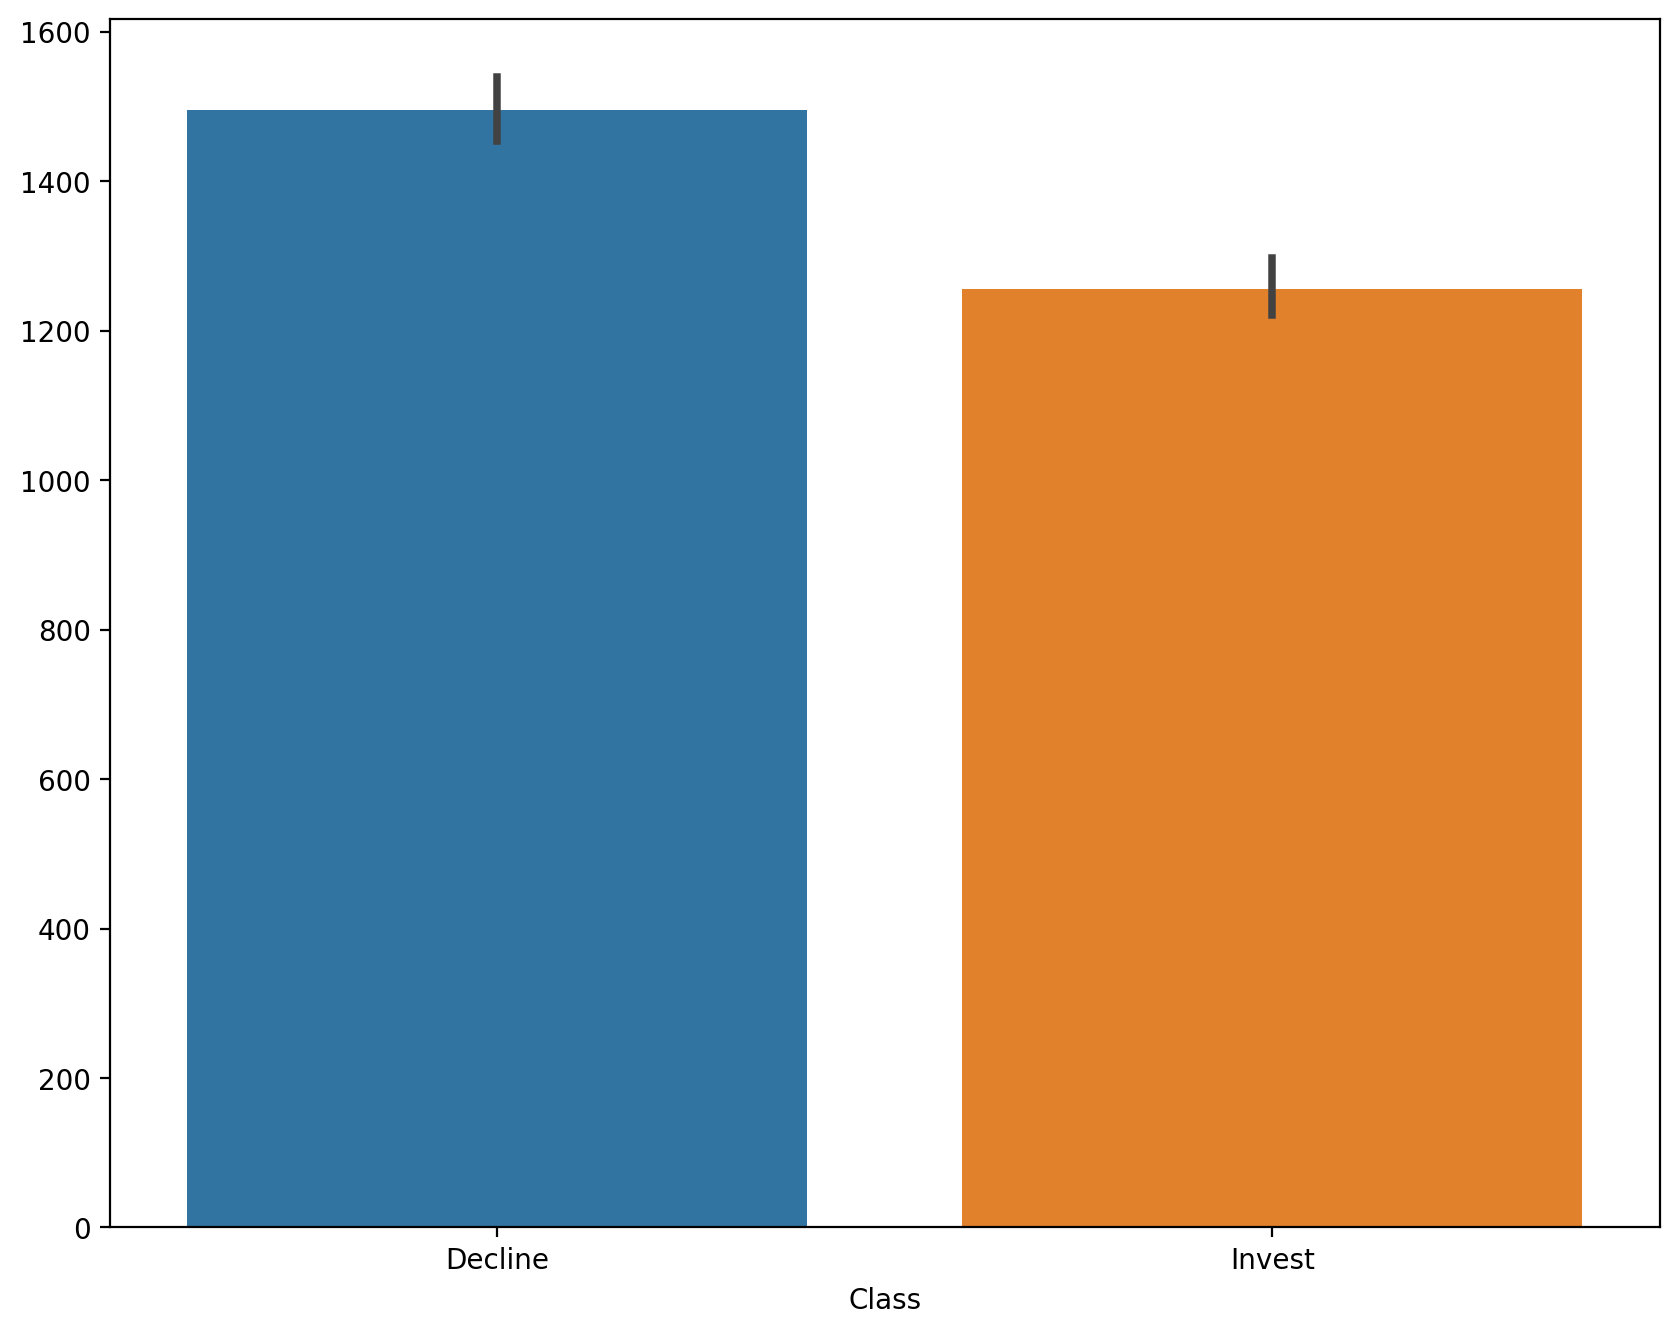

In [118]:
fig, ax = plt.subplots(figsize = (10, 8), dpi = 200)
ax = sns.barplot(y = np.arange(len(indicators.loc[cfd])), x = 'Class', data = indicators.loc[cfd])
ax.set_xticklabels(['Decline', 'Invest'])
plt.show()

Though there are slightly more stocks in the not invest class, the bar char shows that, from the list of stocks that contains a zero as their total debt value, the class column for those stocks is nearly divided in half.  Let me now check and see how the class is divided in the entire data.

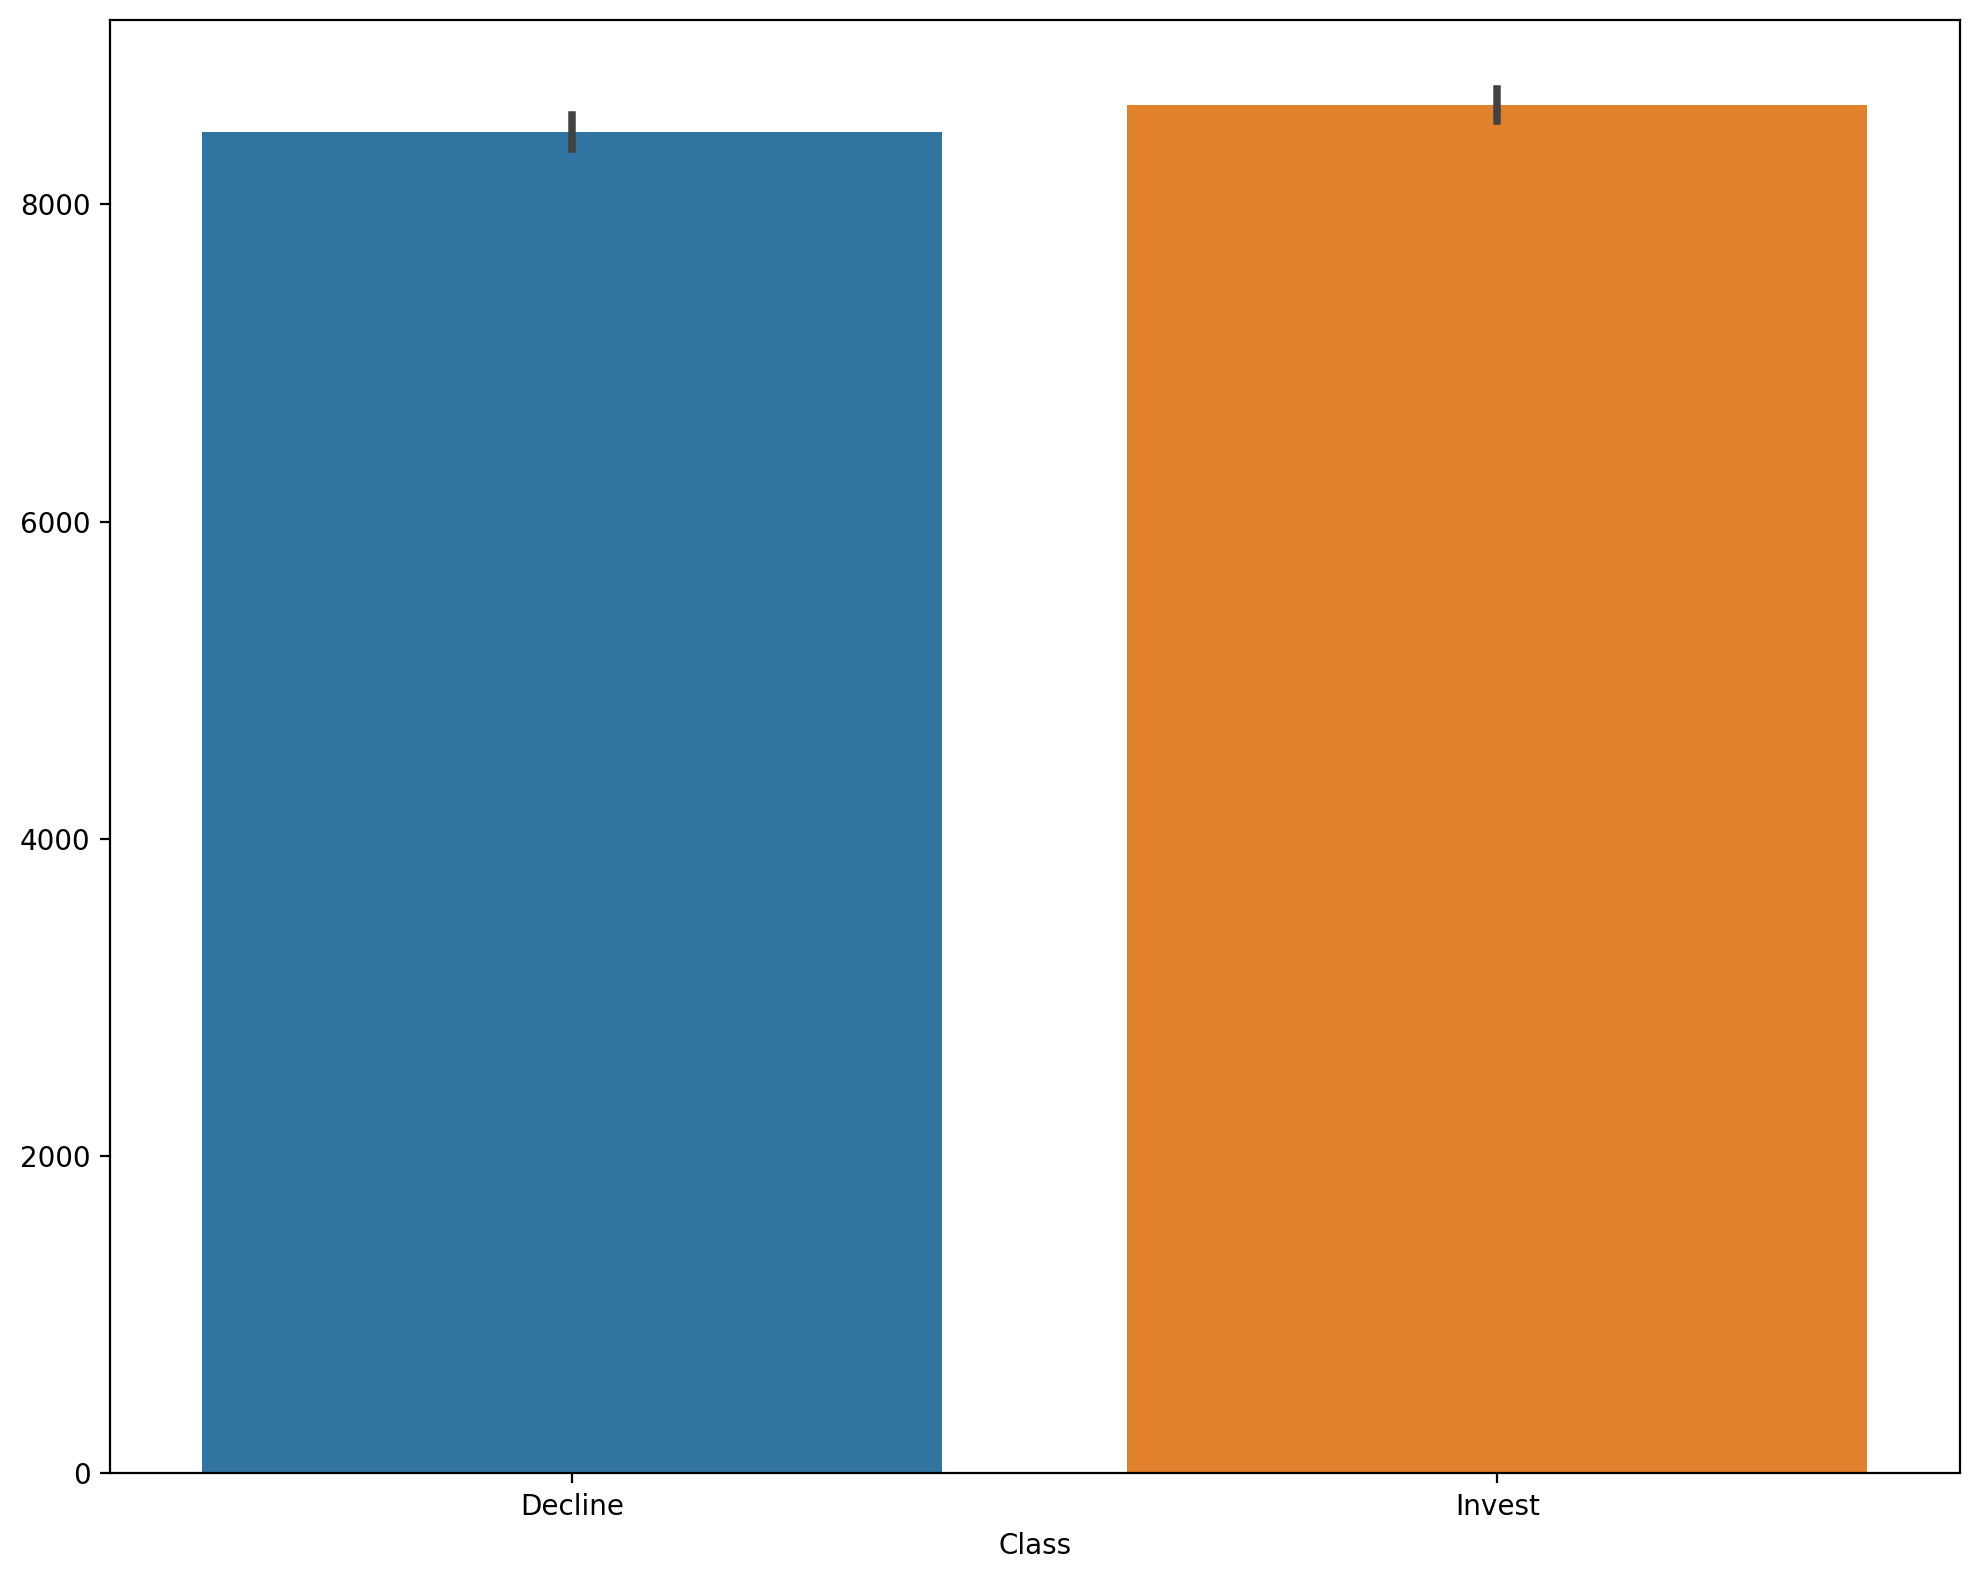

In [119]:
fig, ax = plt.subplots(figsize = (10, 8), dpi = 200)
ax = sns.barplot(y = np.arange(len(indicators)), x = 'Class', data = indicators)
ax.set_xticklabels(['Decline', 'Invest'])
fig.tight_layout()
plt.show()

The class is nearly identical in the entire dataset.  Now let me check how the class would be divided once those stocks are removed.

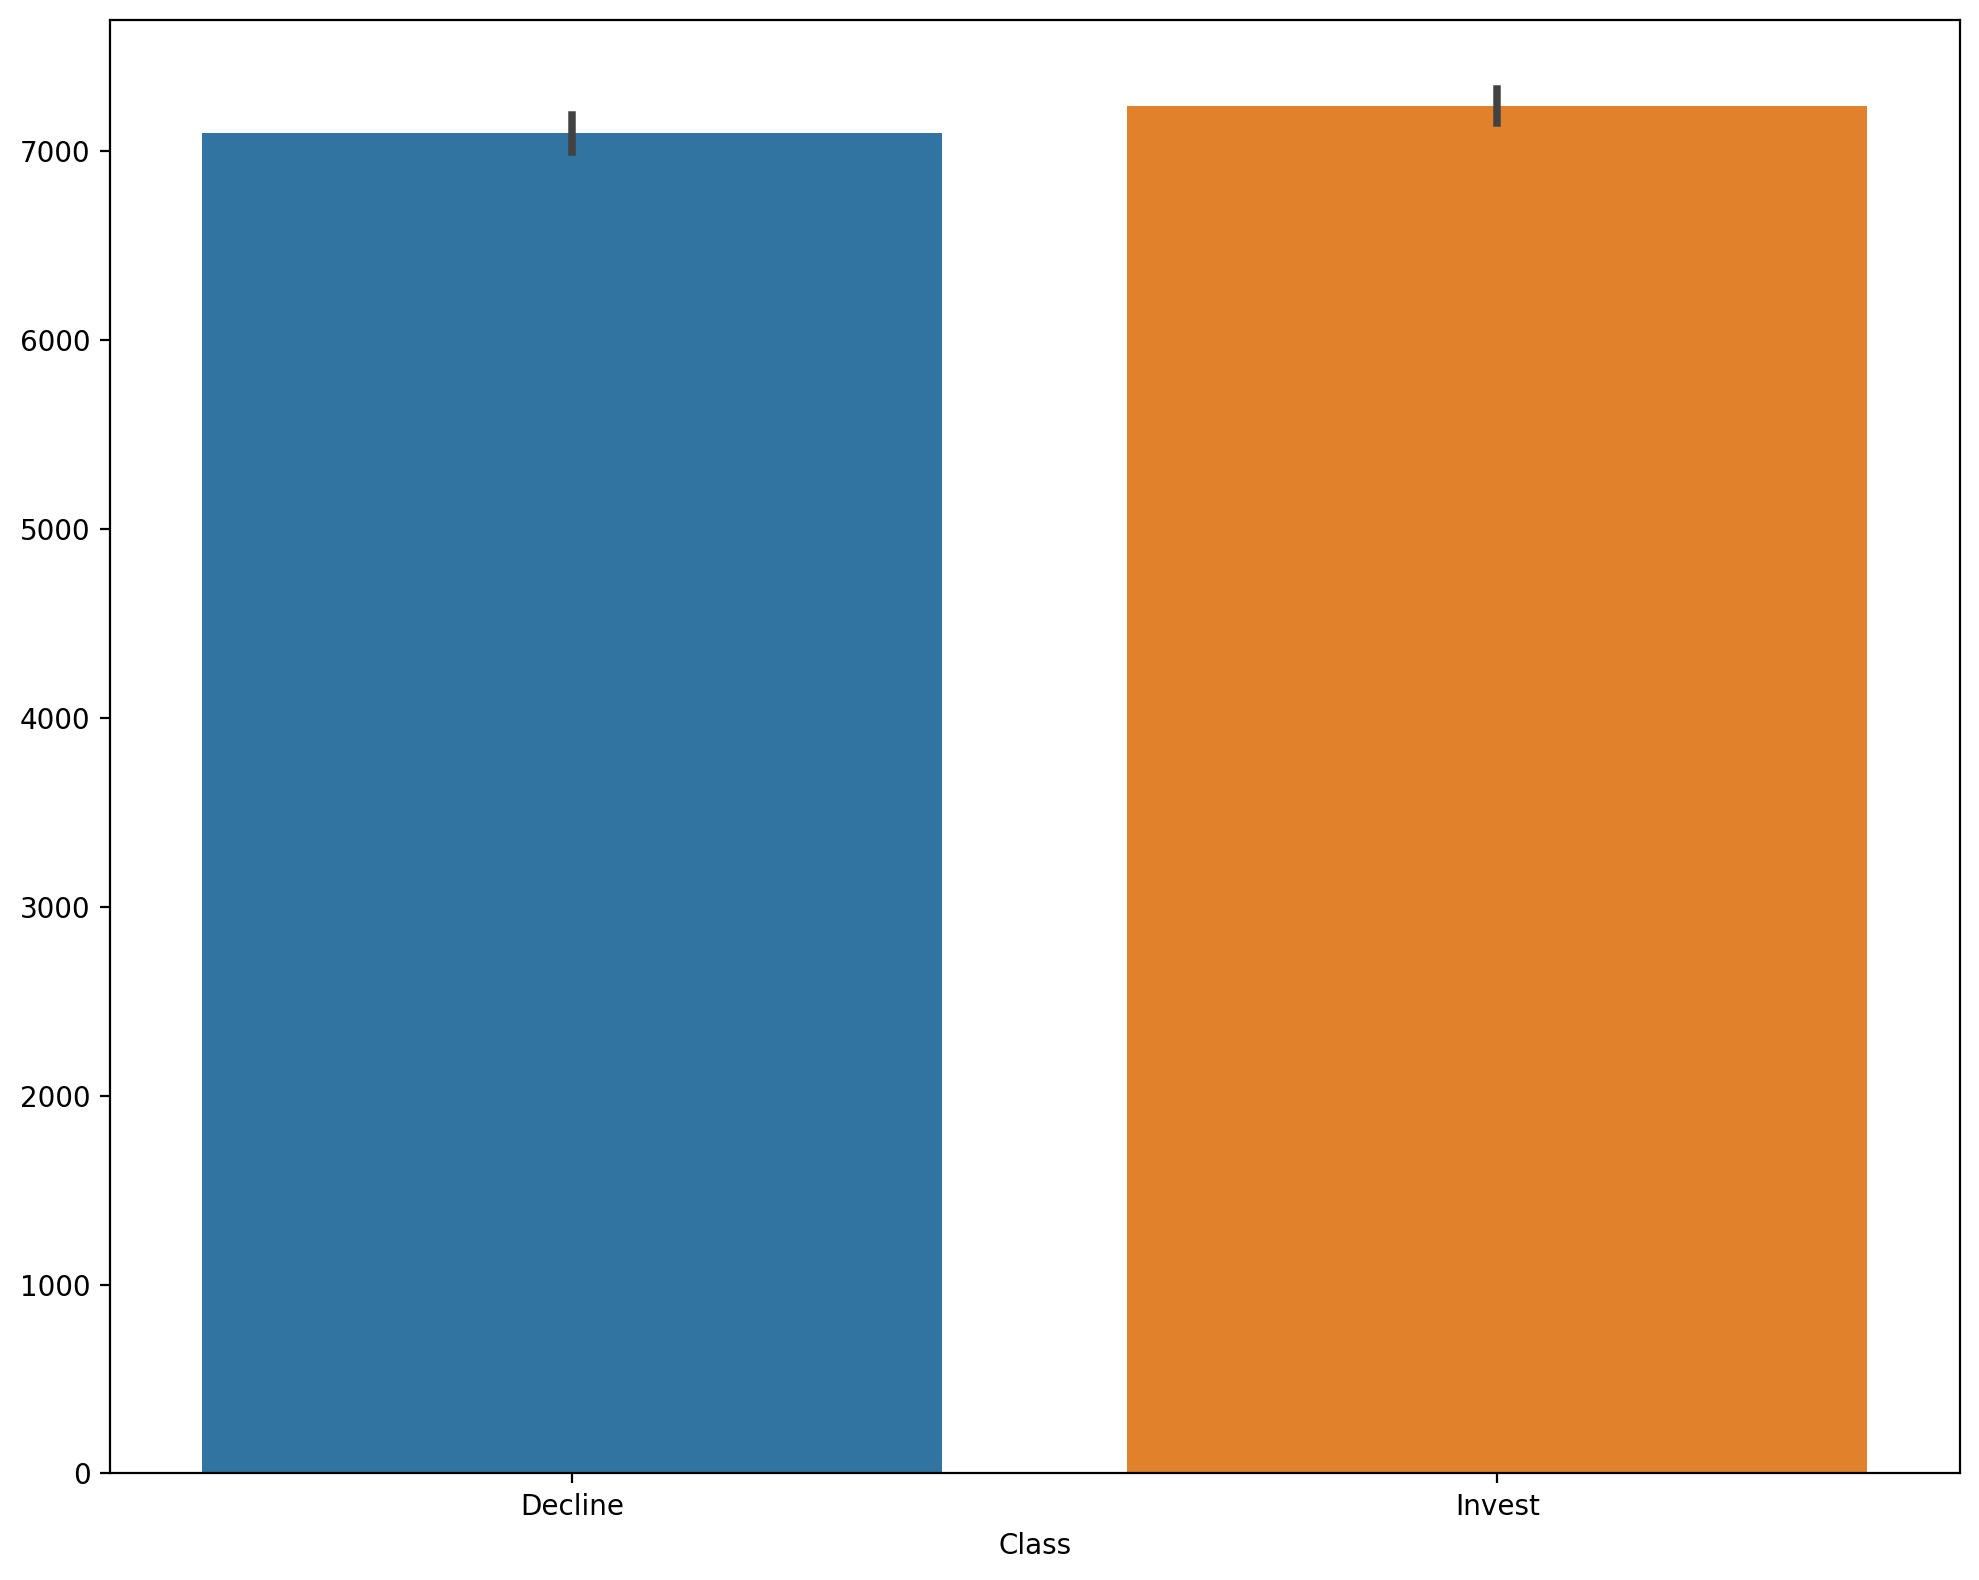

In [120]:
fig, ax = plt.subplots(figsize = (10, 8), dpi = 200)
ax = sns.barplot(y = np.arange(len(indicators.drop(cfd))), x = 'Class', data = indicators.drop(cfd))
ax.set_xticklabels(['Decline', 'Invest'])
fig.tight_layout()
plt.show()

Thogh 2749 stocks will be taken out, the class column will have nearly identical amounts of both invest and decline.  That means that there is nearly no impact from droping the stocks with zero total debt. 

In [121]:
indicators.drop(cfd, inplace = True)

C:\Users\soccershowmsn\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
indicators

Return on Assets  Return on Equity  Profit Margin  Current Ratio  \
Year Stock                                                                     
2014 PG             0.080705            0.1664          0.156       0.937467   
     KR             0.051877            0.2821          0.015       0.824848   
     RAD            0.035913           -0.1180          0.008       1.708956   
     GIS            0.078822            0.2792          0.102       0.810086   
     PM             0.212948           -0.5933          0.094       1.024616   
...                      ...               ...            ...            ...   
2018 WVFC           0.006032            0.0625          0.305       0.043902   
     WVVI           0.046494            0.0601          0.080       5.307310   
     XELB           0.007881            0.0109          0.031       1.481447   
     YTEN          -0.707562           -1.6093        -16.493       3.886045   
     ZKIN           0.091862            0.1895          0.128       1.644405   

            Quick Ratio  Cash Ratio  Debt Ratio  Debt to Equity Ratio  \
Year Stock                                                              
2014 PG        0.506197    0.253751      0.2455                0.5061   
     KR        0.141709    0.037459      0.3863                2.1007   
     RAD       0.436885    0.058388      0.8290               -2.7237   
     GIS       0.433465    0.159915      0.3796                1.3445   
     PM        0.447922    0.111302      0.8371               -2.3323   
...                 ...         ...         ...                   ...   
2018 WVFC      1.094460    0.008842      0.4865                5.0387   
     WVVI      2.240921    1.804818      0.1359                0.1756   
     XELB      1.323467    0.548337      0.1418                0.1960   
     YTEN      3.815356    2.044485      0.4988                1.1346   
     ZKIN      1.189722    0.196330      0.2522                0.5202   

            Interest Coverage  Cash Flow to Debt Ratio  ...  \
Year Stock                                              ...   
2014 PG               21.4429                 0.394105  ...   
     KR                6.1242                 0.315915  ...   
     RAD               1.5893                 0.121943  ...   
     GIS               9.9540                 0.289217  ...   
     PM               11.0665                 0.262740  ...   
...                       ...                      ...  ...   
2018 WVFC              0.0000                 0.026680  ...   
     WVVI              9.6076                 0.275577  ...   
     XELB              3.8872                 0.336807  ...   
     YTEN              0.0000                -1.354060  ...   
     ZKIN              7.7919                -0.115980  ...   

            Price Earnings to Growth Ratio  Price to Sales Ratio  \
Year Stock                                                         
2014 PG                         505.568733                2.8583   
     KR                         208.923611                0.1858   
     RAD                         31.208356                0.2491   
     GIS                       1335.957143                1.8610   
     PM                        -179.929548                1.5798   
...                                    ...                   ...   
2018 WVFC                        42.805881                4.7710   
     WVVI                       -95.153807                1.4821   
     XELB                        16.980705                0.5826   
     YTEN                         0.000000               14.9666   
     ZKIN                       -86.187675                0.7619   

            Dividend Yield  Dividend Payout Ratio  Asset Turnover Ratio  \
Year Stock                                                                
2014 PG             0.0311              -0.593576              0.515721   
     KR             0.0174              -0.210007              3.359687   
     RAD        

In [123]:
indicators.describe().T

,count,mean,std,min,25%,50%,75%,max
Return on Assets,14352.0,-0.025252,0.266046,-9.008607,-0.008396,0.021014,0.059058,3.606395e+00
Return on Equity,14352.0,-0.038333,5.034076,-492.000000,-0.024025,0.078700,0.150000,9.607510e+01
Profit Margin,14352.0,-4.208942,114.010669,-10537.097700,-0.017000,0.046000,0.129000,1.553370e+02
Current Ratio,14352.0,2.624142,12.838067,-0.961816,0.941073,1.579781,2.579812,1.348252e+03
Quick Ratio,14352.0,3.424585,22.913953,-1.116182,0.897907,1.261193,2.212084,1.474982e+03
Cash Ratio,14352.0,0.864821,2.132280,-0.192736,0.105183,0.339789,0.857865,6.822019e+01
Debt Ratio,14352.0,0.302250,0.288796,-0.453600,0.117700,0.261750,0.424200,8.319900e+00
Debt to Equity Ratio,14352.0,0.751039,30.726551,-2586.435900,0.241000,0.633200,1.266300,2.131513e+03
Interest Coverage,14352.0,-3.794628,571.894492,-30081.000000,0.000000,2.126650,7.644950,2.296951e+04
Cash Flow to Debt Ratio,14352.0,279.309721,33904.498303,-40783.940351,0.077390,0.214504,0.484970,4.061425e+06


In [124]:
description = indicators.describe().T

In [125]:
description

,count,mean,std,min,25%,50%,75%,max
Return on Assets,14352.0,-0.025252,0.266046,-9.008607,-0.008396,0.021014,0.059058,3.606395e+00
Return on Equity,14352.0,-0.038333,5.034076,-492.000000,-0.024025,0.078700,0.150000,9.607510e+01
Profit Margin,14352.0,-4.208942,114.010669,-10537.097700,-0.017000,0.046000,0.129000,1.553370e+02
Current Ratio,14352.0,2.624142,12.838067,-0.961816,0.941073,1.579781,2.579812,1.348252e+03
Quick Ratio,14352.0,3.424585,22.913953,-1.116182,0.897907,1.261193,2.212084,1.474982e+03
Cash Ratio,14352.0,0.864821,2.132280,-0.192736,0.105183,0.339789,0.857865,6.822019e+01
Debt Ratio,14352.0,0.302250,0.288796,-0.453600,0.117700,0.261750,0.424200,8.319900e+00
Debt to Equity Ratio,14352.0,0.751039,30.726551,-2586.435900,0.241000,0.633200,1.266300,2.131513e+03
Interest Coverage,14352.0,-3.794628,571.894492,-30081.000000,0.000000,2.126650,7.644950,2.296951e+04
Cash Flow to Debt Ratio,14352.0,279.309721,33904.498303,-40783.940351,0.077390,0.214504,0.484970,4.061425e+06


In [126]:
description['iqr'] = description['75%'] - description['25%']

In [127]:
description

,count,mean,std,min,25%,50%,75%,max,iqr
Return on Assets,14352.0,-0.025252,0.266046,-9.008607,-0.008396,0.021014,0.059058,3.606395e+00,0.067454
Return on Equity,14352.0,-0.038333,5.034076,-492.000000,-0.024025,0.078700,0.150000,9.607510e+01,0.174025
Profit Margin,14352.0,-4.208942,114.010669,-10537.097700,-0.017000,0.046000,0.129000,1.553370e+02,0.146000
Current Ratio,14352.0,2.624142,12.838067,-0.961816,0.941073,1.579781,2.579812,1.348252e+03,1.638739
Quick Ratio,14352.0,3.424585,22.913953,-1.116182,0.897907,1.261193,2.212084,1.474982e+03,1.314177
Cash Ratio,14352.0,0.864821,2.132280,-0.192736,0.105183,0.339789,0.857865,6.822019e+01,0.752682
Debt Ratio,14352.0,0.302250,0.288796,-0.453600,0.117700,0.261750,0.424200,8.319900e+00,0.306500
Debt to Equity Ratio,14352.0,0.751039,30.726551,-2586.435900,0.241000,0.633200,1.266300,2.131513e+03,1.025300
Interest Coverage,14352.0,-3.794628,571.894492,-30081.000000,0.000000,2.126650,7.644950,2.296951e+04,7.644950
Cash Flow to Debt Ratio,14352.0,279.309721,33904.498303,-40783.940351,0.077390,0.214504,0.484970,4.061425e+06,0.407580


In [128]:
description['lower_outlier'] = description['25%'] - (1.5 * description['iqr'])
description['higher_outlier'] = description['75%'] + (1.5 * description['iqr'])

In [129]:
description

,count,mean,std,min,25%,50%,75%,max,iqr,lower_outlier,higher_outlier
Return on Assets,14352.0,-0.025252,0.266046,-9.008607,-0.008396,0.021014,0.059058,3.606395e+00,0.067454,-0.109576,0.160238
Return on Equity,14352.0,-0.038333,5.034076,-492.000000,-0.024025,0.078700,0.150000,9.607510e+01,0.174025,-0.285062,0.411037
Profit Margin,14352.0,-4.208942,114.010669,-10537.097700,-0.017000,0.046000,0.129000,1.553370e+02,0.146000,-0.236000,0.348000
Current Ratio,14352.0,2.624142,12.838067,-0.961816,0.941073,1.579781,2.579812,1.348252e+03,1.638739,-1.517035,5.037920
Quick Ratio,14352.0,3.424585,22.913953,-1.116182,0.897907,1.261193,2.212084,1.474982e+03,1.314177,-1.073359,4.183349
Cash Ratio,14352.0,0.864821,2.132280,-0.192736,0.105183,0.339789,0.857865,6.822019e+01,0.752682,-1.023841,1.986889
Debt Ratio,14352.0,0.302250,0.288796,-0.453600,0.117700,0.261750,0.424200,8.319900e+00,0.306500,-0.342050,0.883950
Debt to Equity Ratio,14352.0,0.751039,30.726551,-2586.435900,0.241000,0.633200,1.266300,2.131513e+03,1.025300,-1.296950,2.804250
Interest Coverage,14352.0,-3.794628,571.894492,-30081.000000,0.000000,2.126650,7.644950,2.296951e+04,7.644950,-11.467425,19.112375
Cash Flow to Debt Ratio,14352.0,279.309721,33904.498303,-40783.940351,0.077390,0.214504,0.484970,4.061425e+06,0.407580,-0.533979,1.096339


In [130]:
invest = indicators[indicators.Class == 1]

In [131]:
invest_describe = invest.describe().T

In [132]:
decline = indicators[indicators.Class == 0]

In [133]:
decline_describe = decline.describe().T

In [134]:
invest_describe[['mean', '50%']]

,mean,50%
Return on Assets,0.001955,0.025071
Return on Equity,-0.028455,0.087450
Profit Margin,-2.727159,0.061000
Current Ratio,2.444259,1.520400
Quick Ratio,3.430437,1.241501
Cash Ratio,0.765298,0.312716
Debt Ratio,0.301557,0.264300
Debt to Equity Ratio,0.375435,0.665350
Interest Coverage,-0.181877,2.505250
Cash Flow to Debt Ratio,2.945946,0.233159


In [135]:
decline_describe[['mean', '50%']]

,mean,50%
Return on Assets,-0.060580,0.014341
Return on Equity,-0.051160,0.062950
Profit Margin,-6.133077,0.028000
Current Ratio,2.857724,1.662097
Quick Ratio,3.416985,1.289819
Cash Ratio,0.994054,0.373836
Debt Ratio,0.303149,0.258800
Debt to Equity Ratio,1.238771,0.589900
Interest Coverage,-8.485883,1.599150
Cash Flow to Debt Ratio,638.175431,0.191283


## Return on Assets

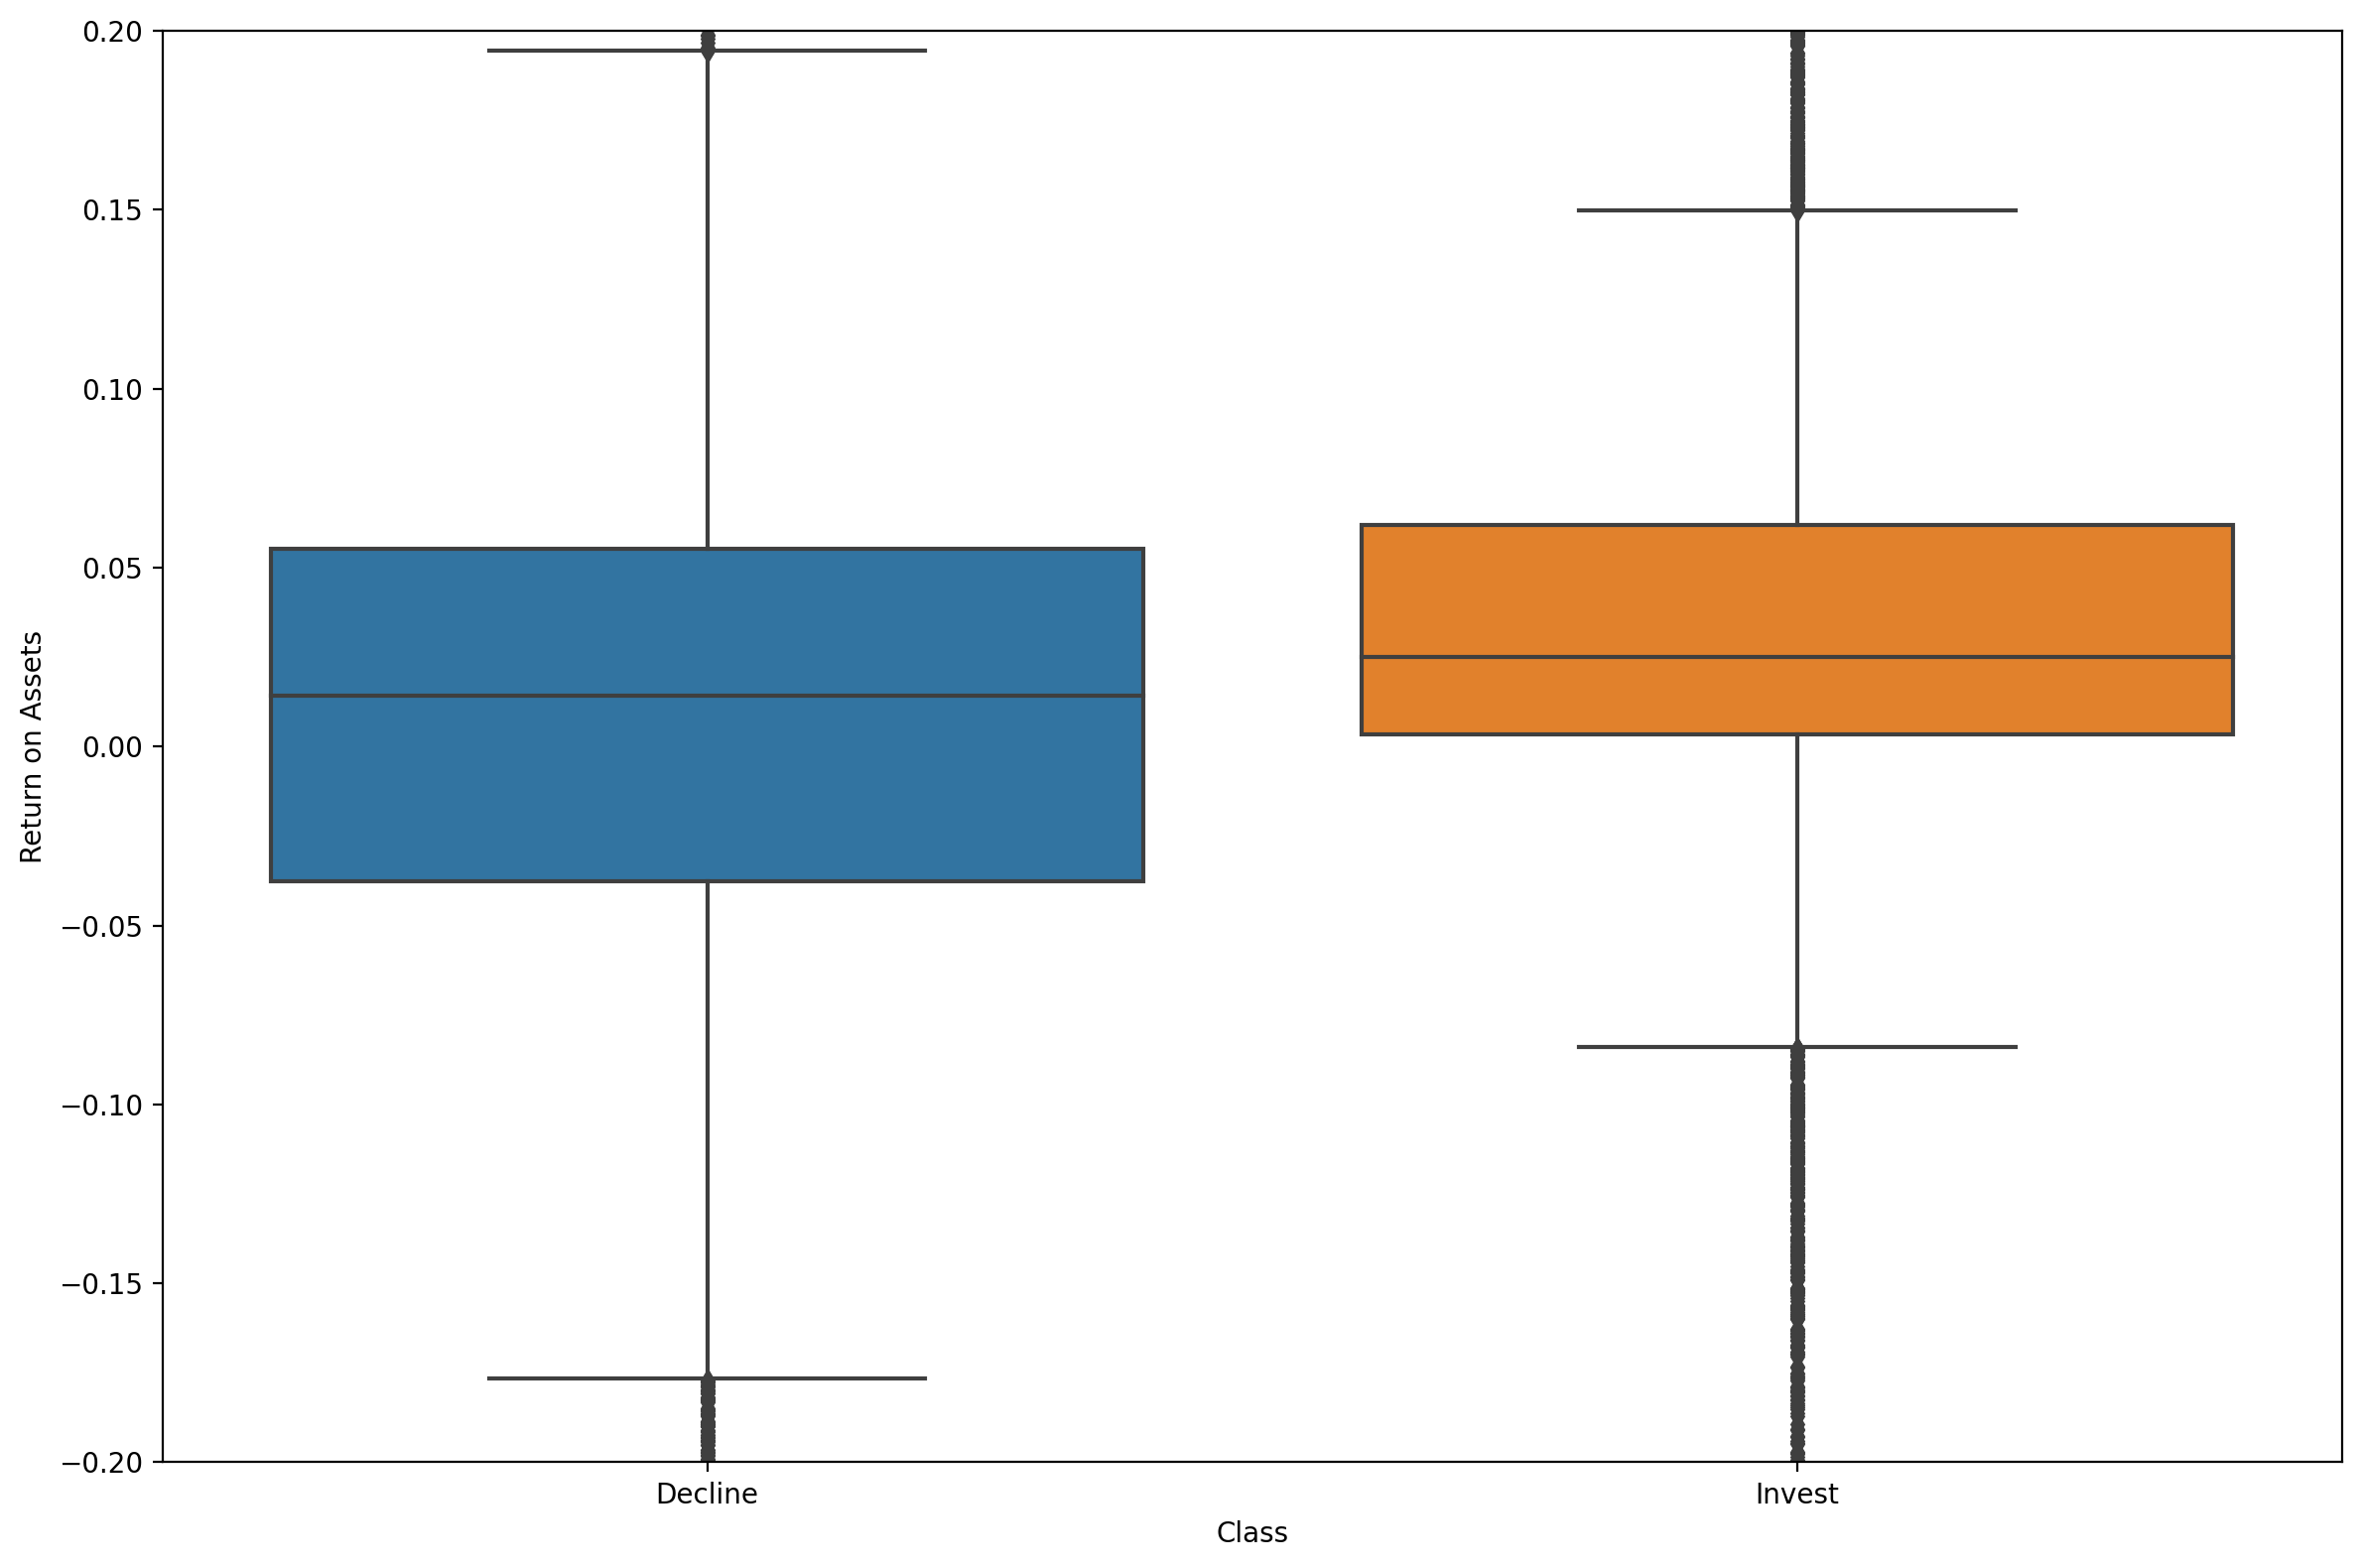

In [136]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Return on Assets', data = indicators)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-0.2, 0.2)

plt.tight_layout()

plt.show()

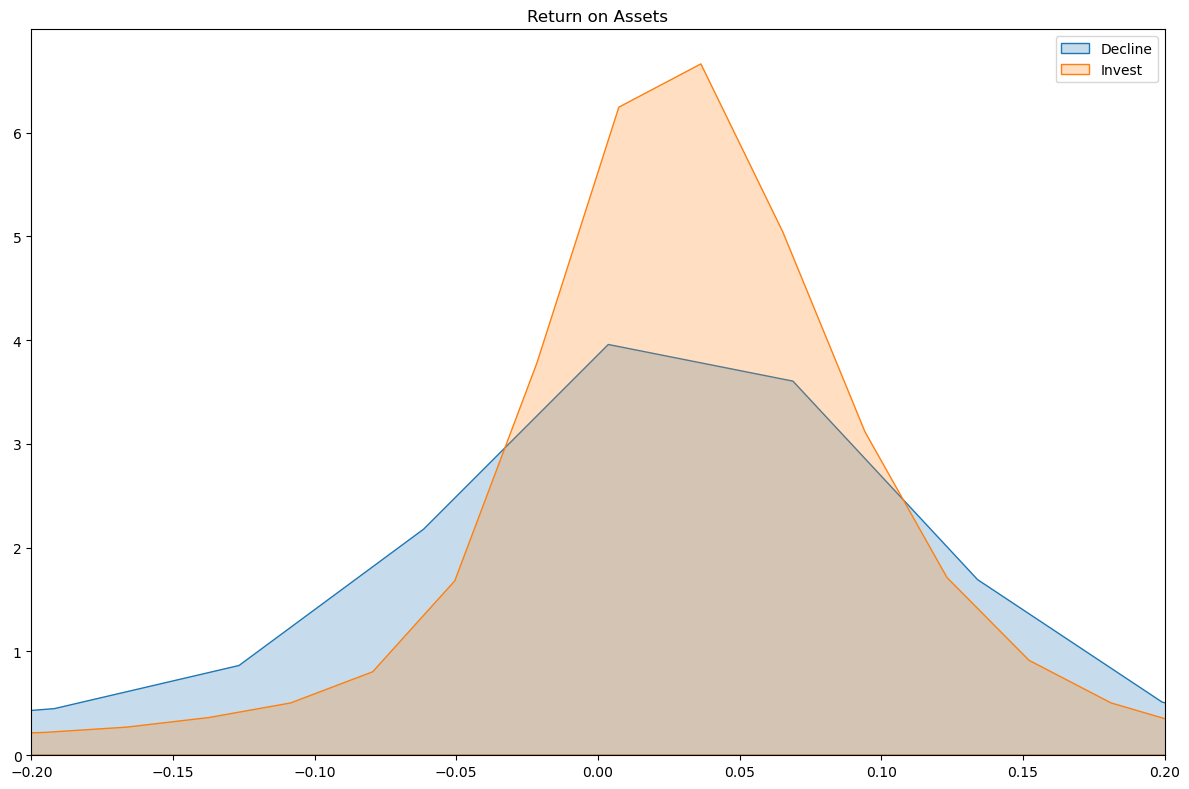

In [137]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Return on Assets'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Return on Assets'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-0.2, 0.2)

plt.legend()

plt.title('Return on Assets')

plt.tight_layout()

## Return on Equity

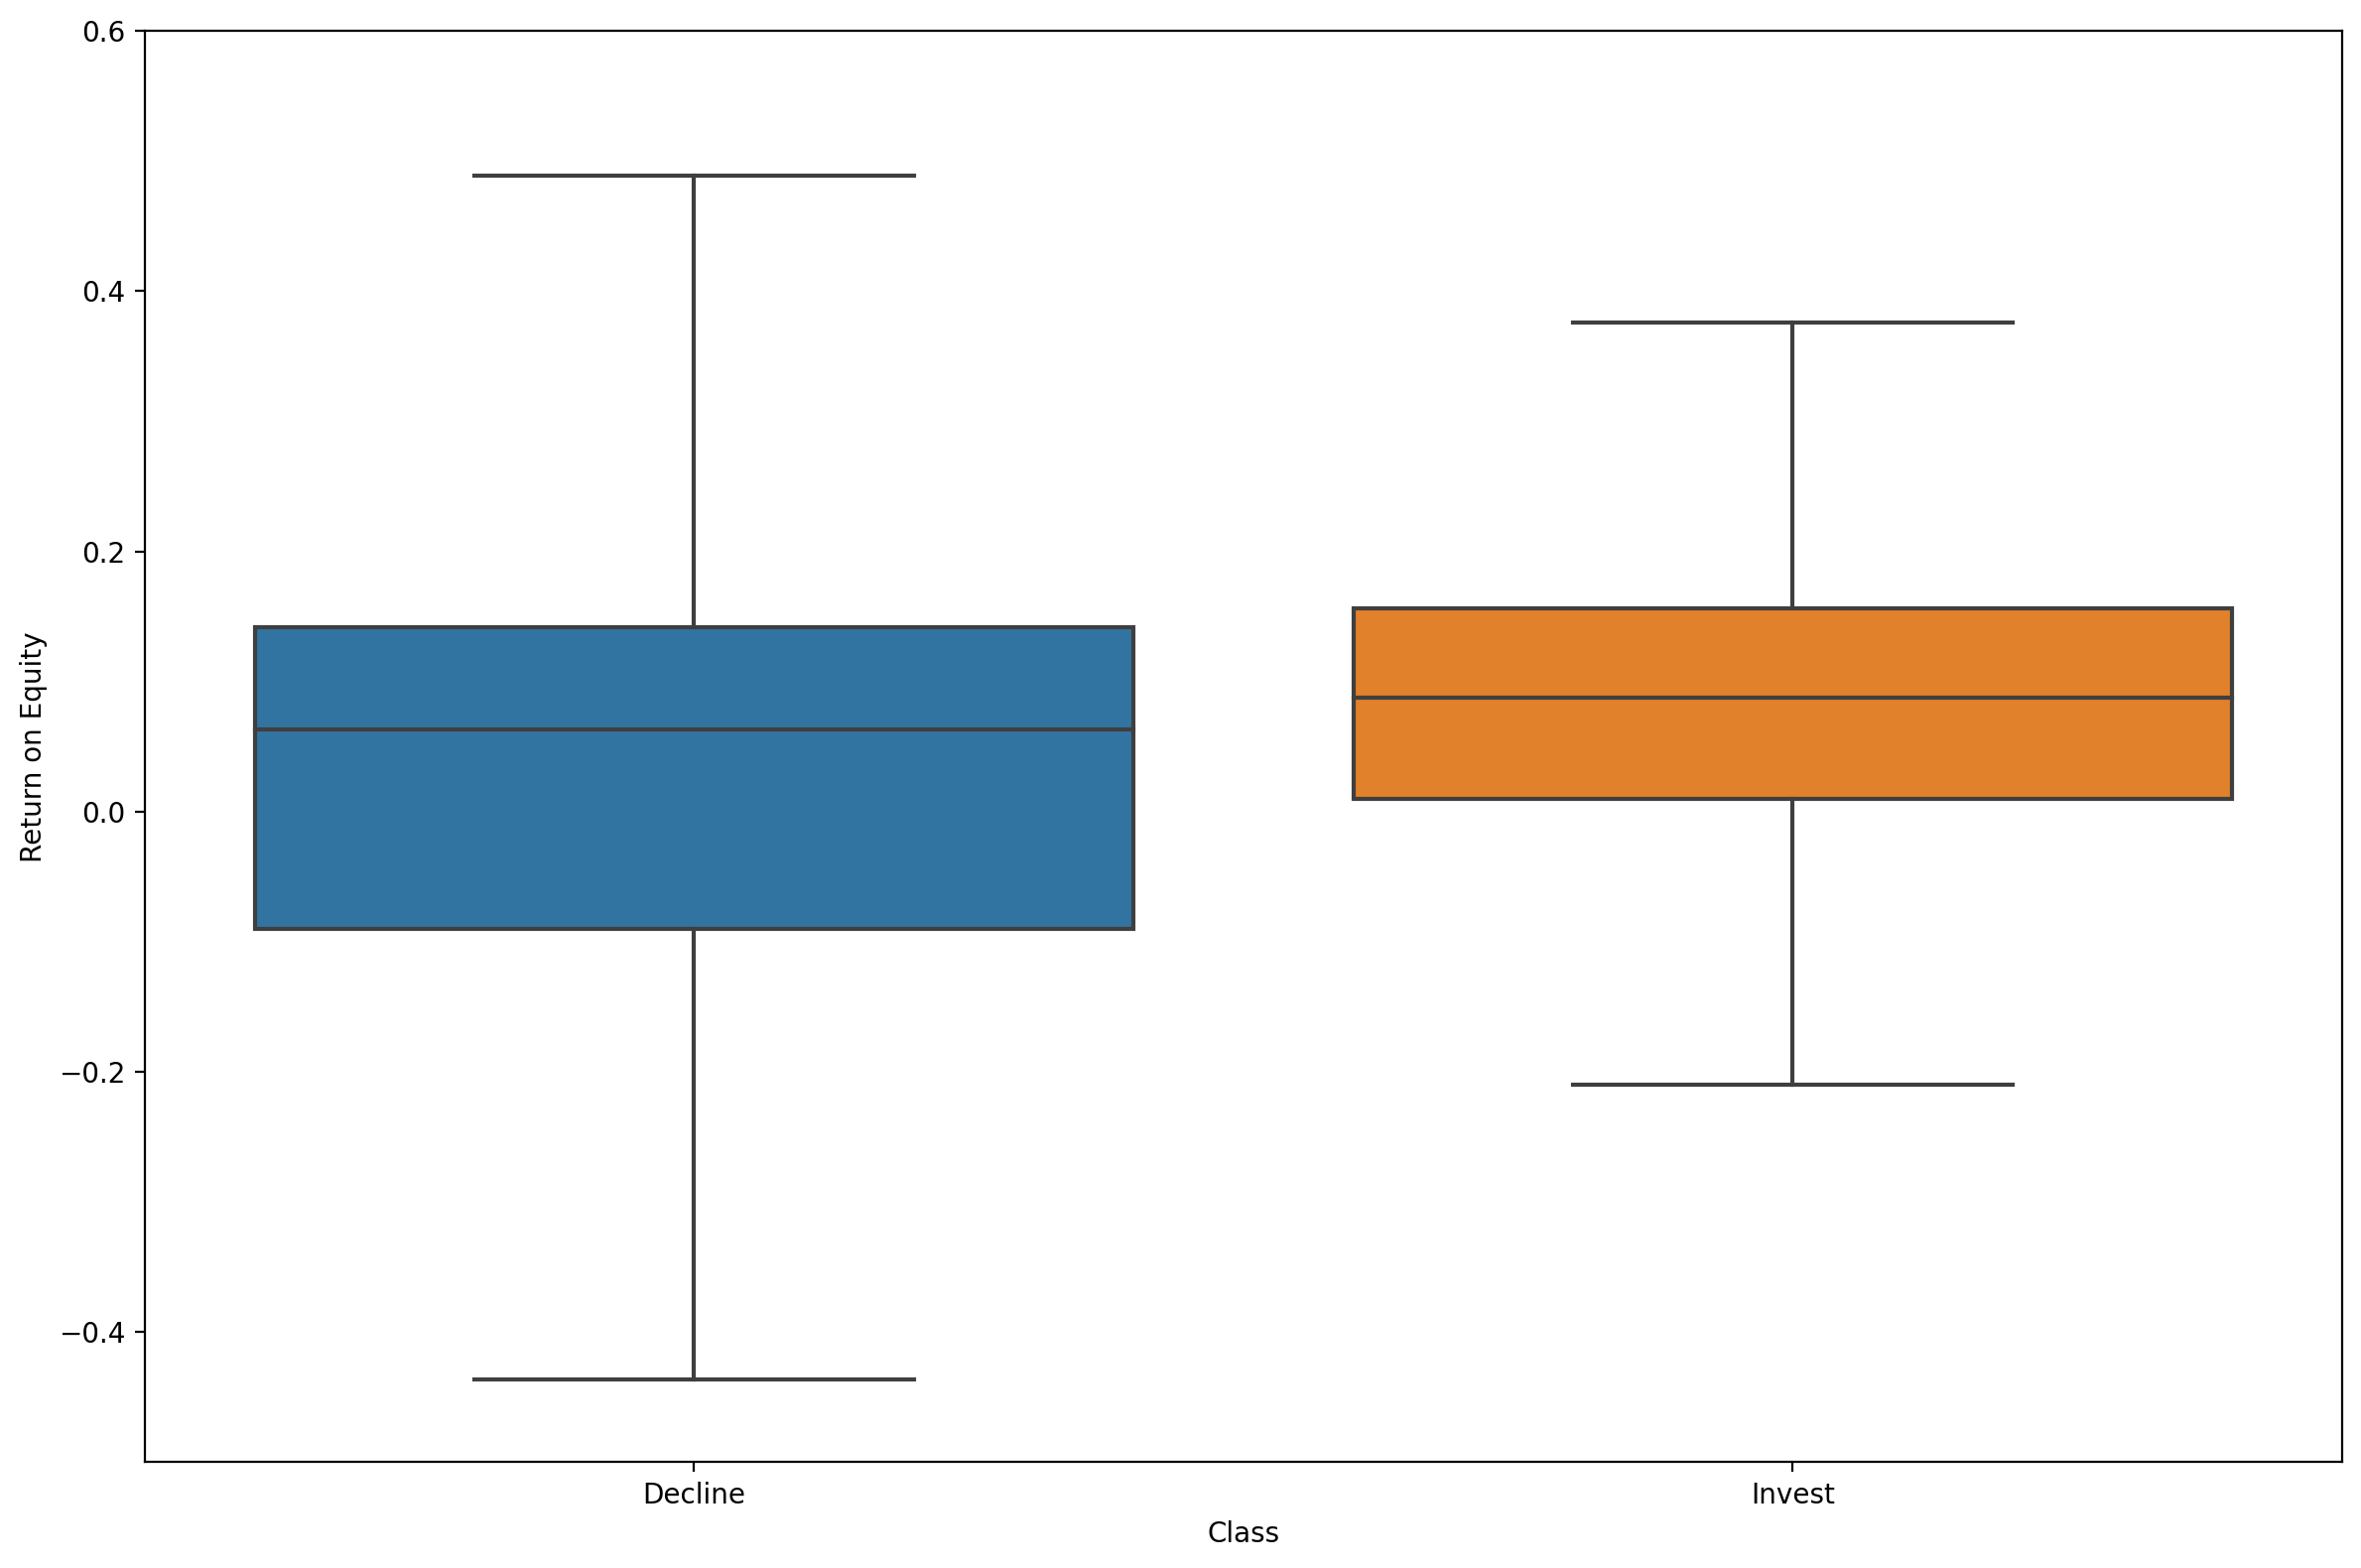

In [138]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Return on Equity', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-0.5, 0.6)

plt.tight_layout()

plt.show()

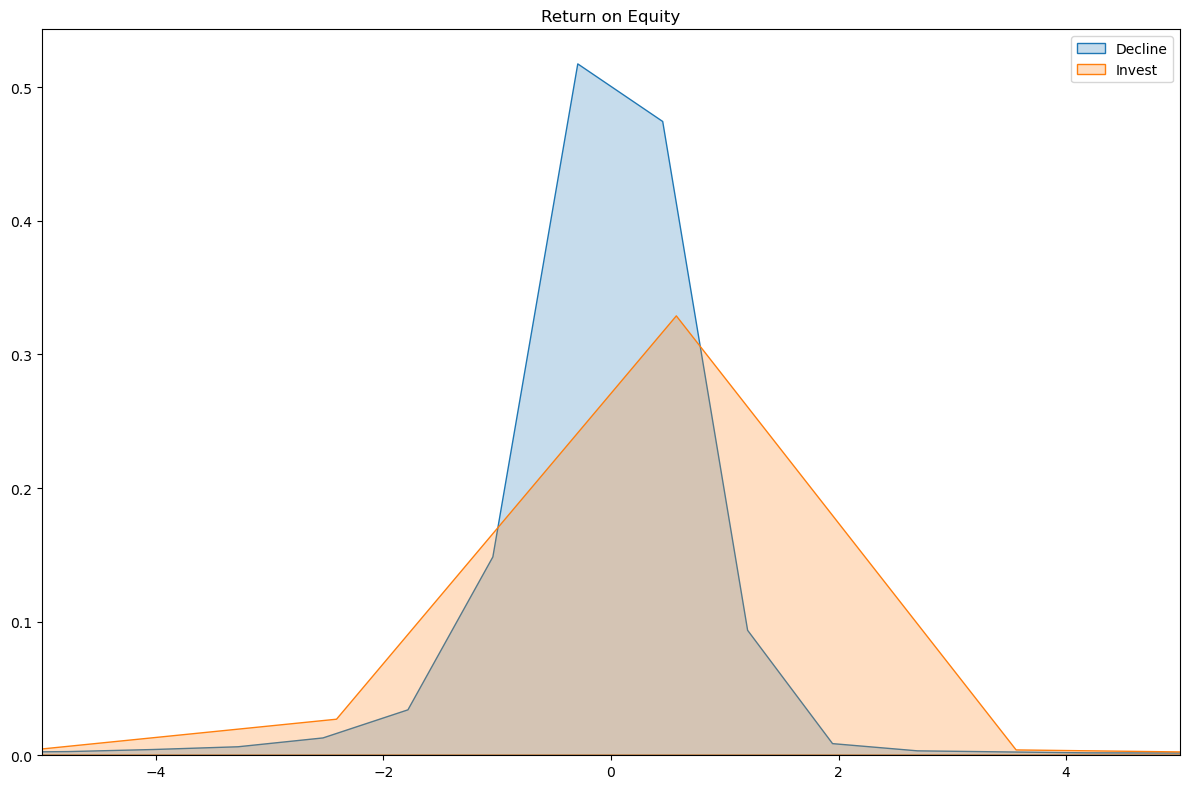

In [139]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Return on Equity'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Return on Equity'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-5, 5)

plt.legend()

plt.title('Return on Equity')

plt.tight_layout()

## Profit Margin

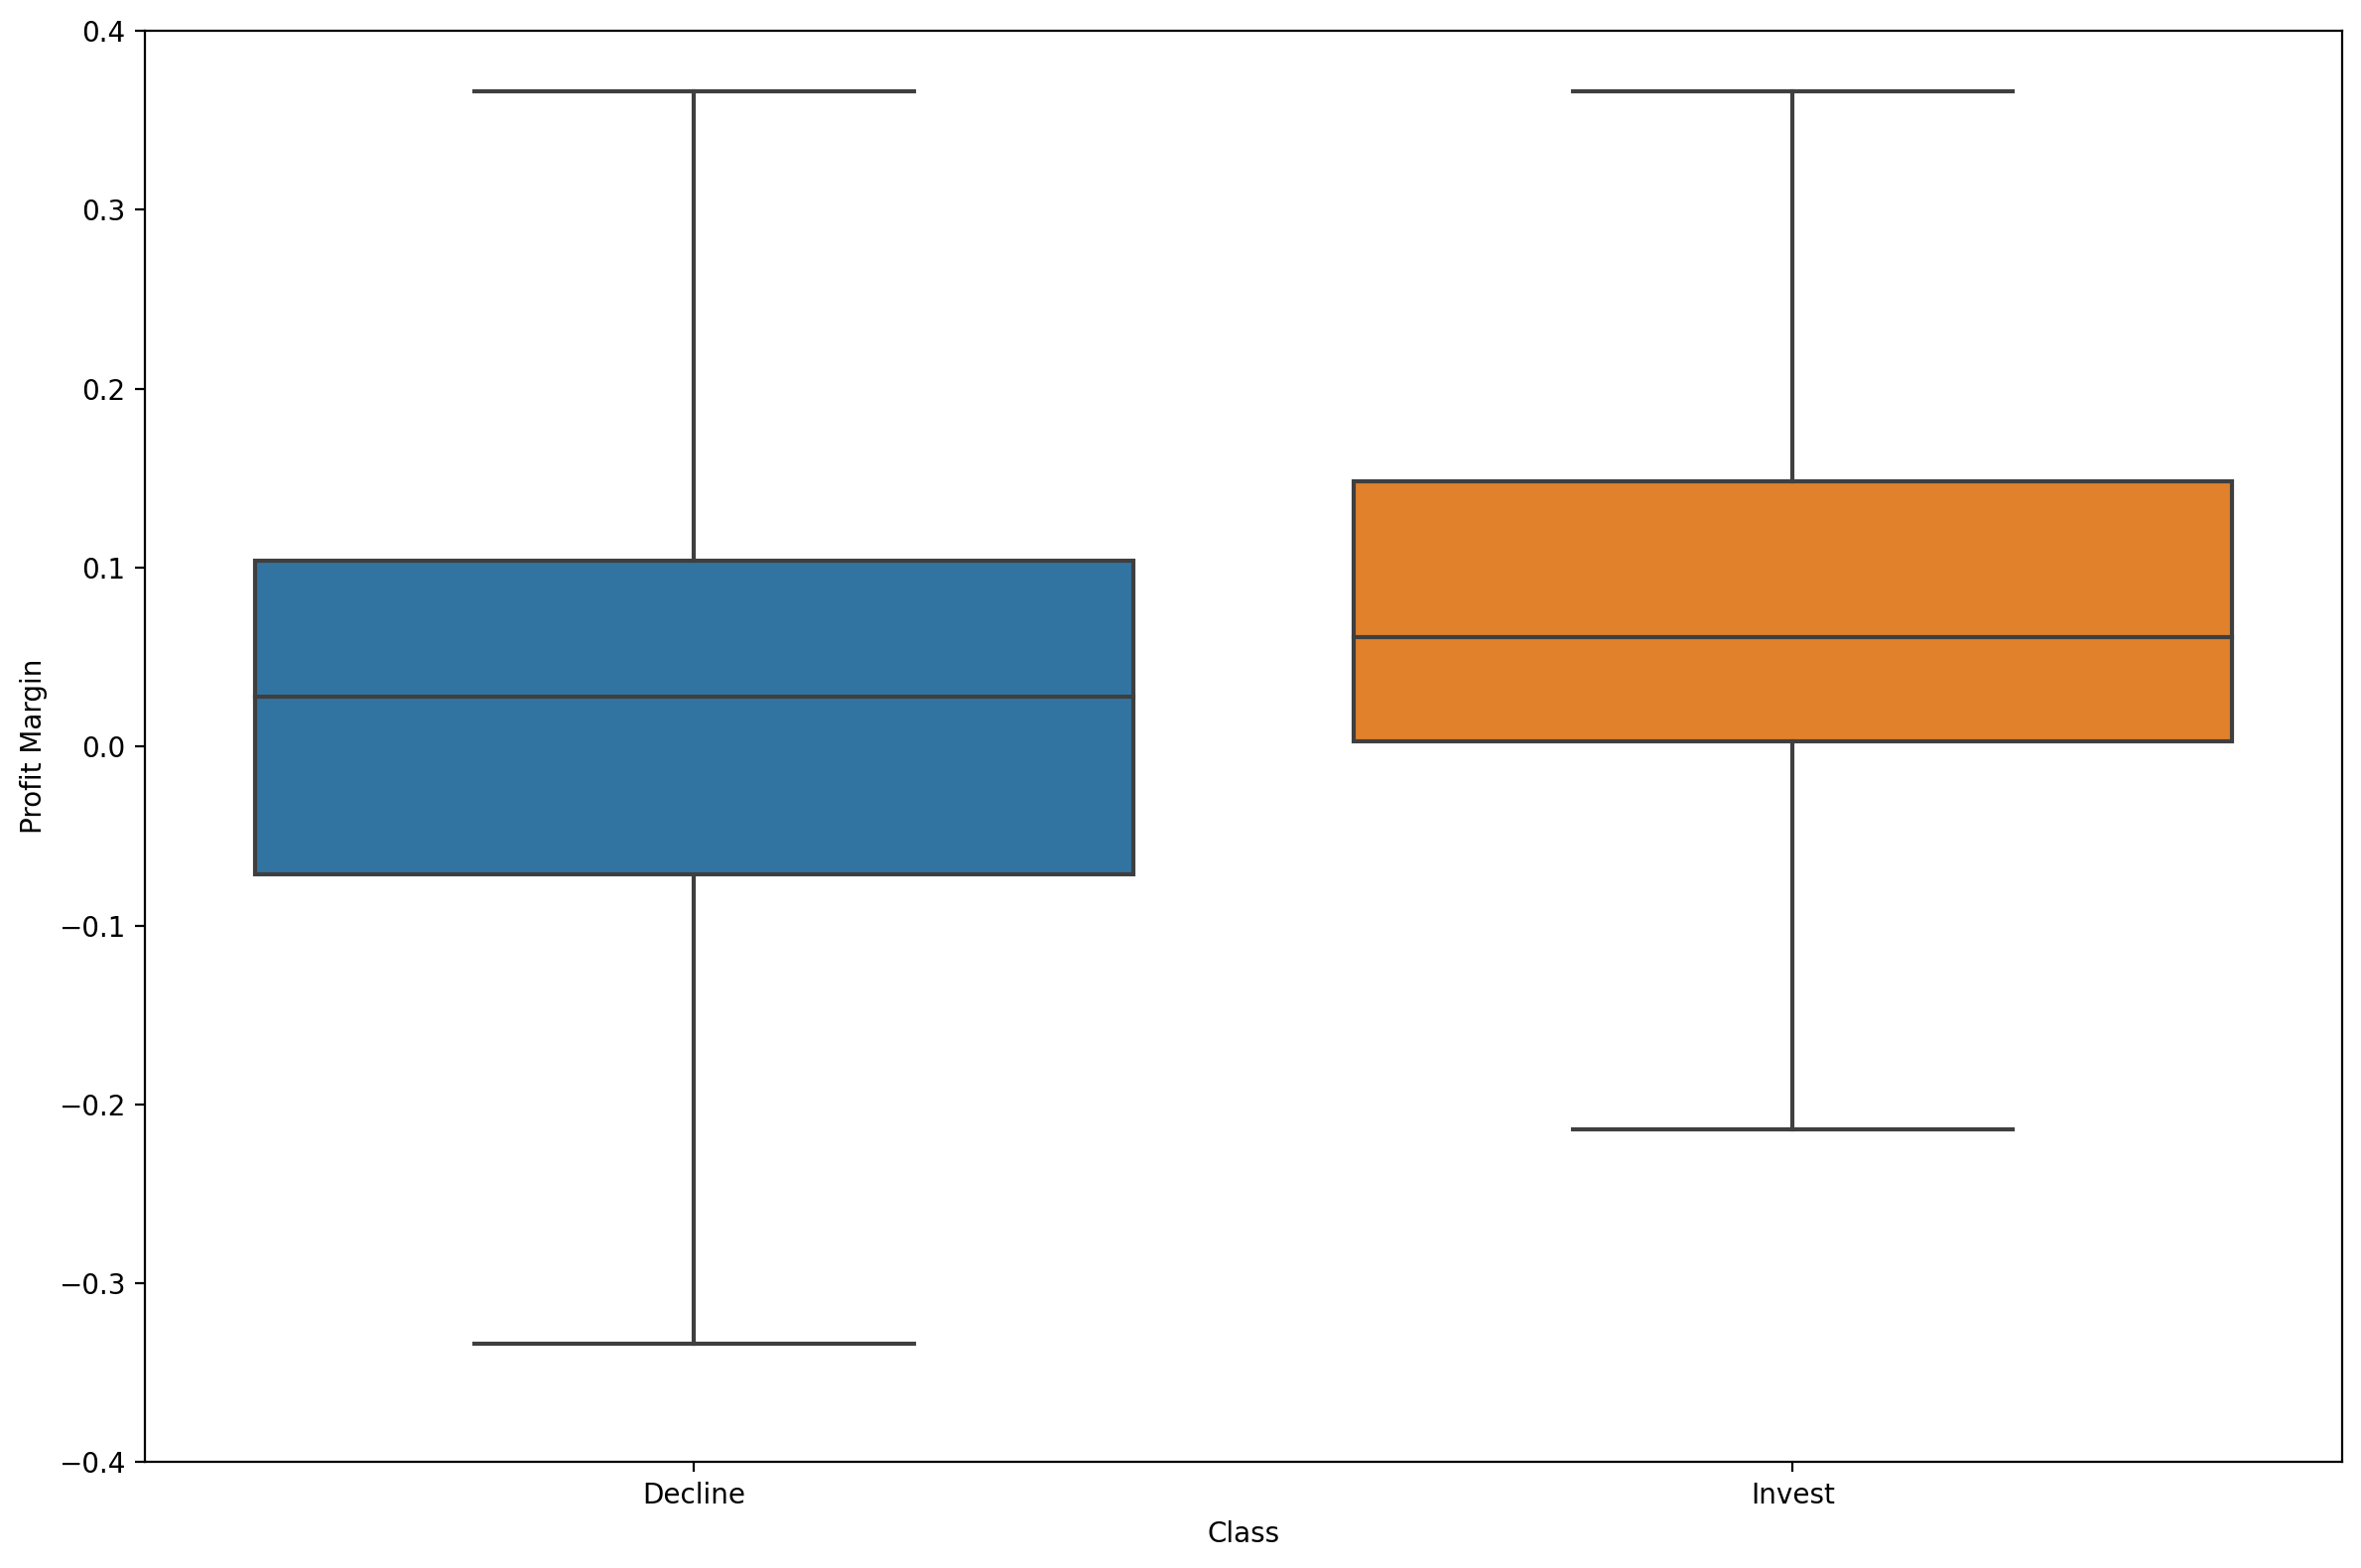

In [140]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Profit Margin', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-0.4, 0.4)

plt.tight_layout()

plt.show()

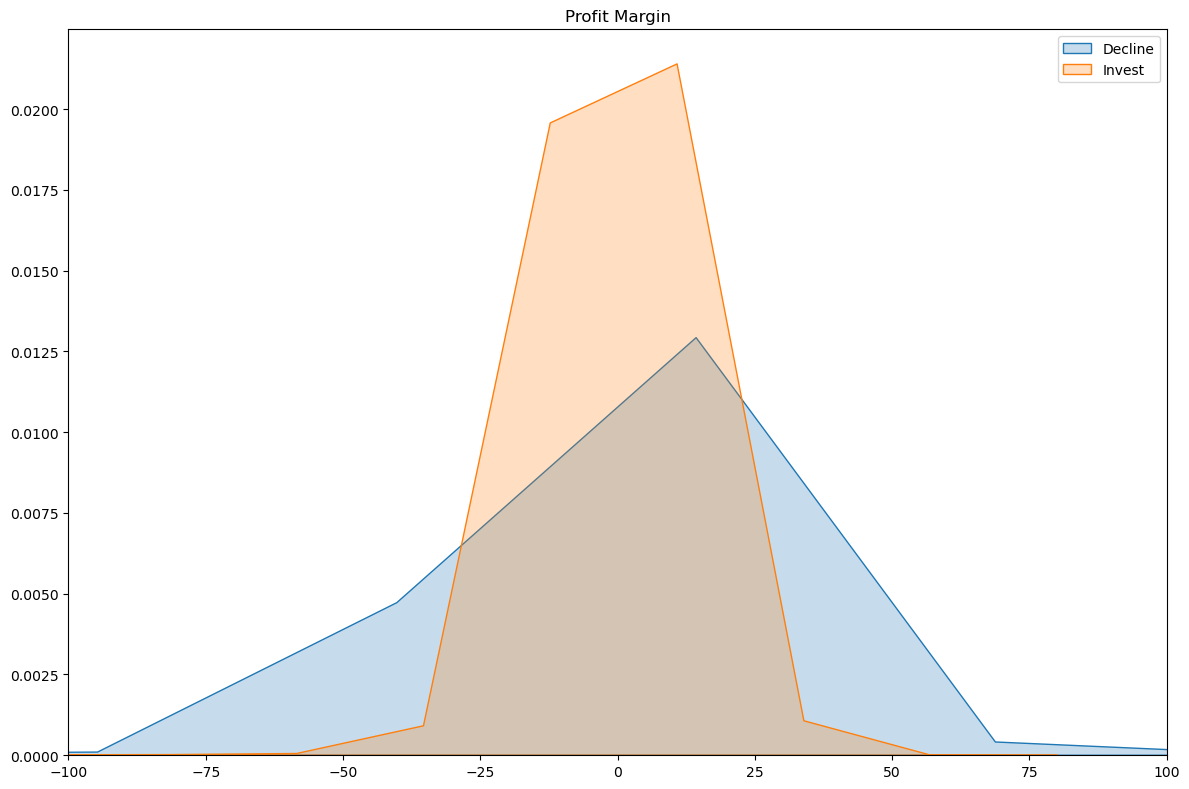

In [141]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Profit Margin'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Profit Margin'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-100, 100)

plt.legend()

plt.title('Profit Margin')

plt.tight_layout()

## Current Ratio

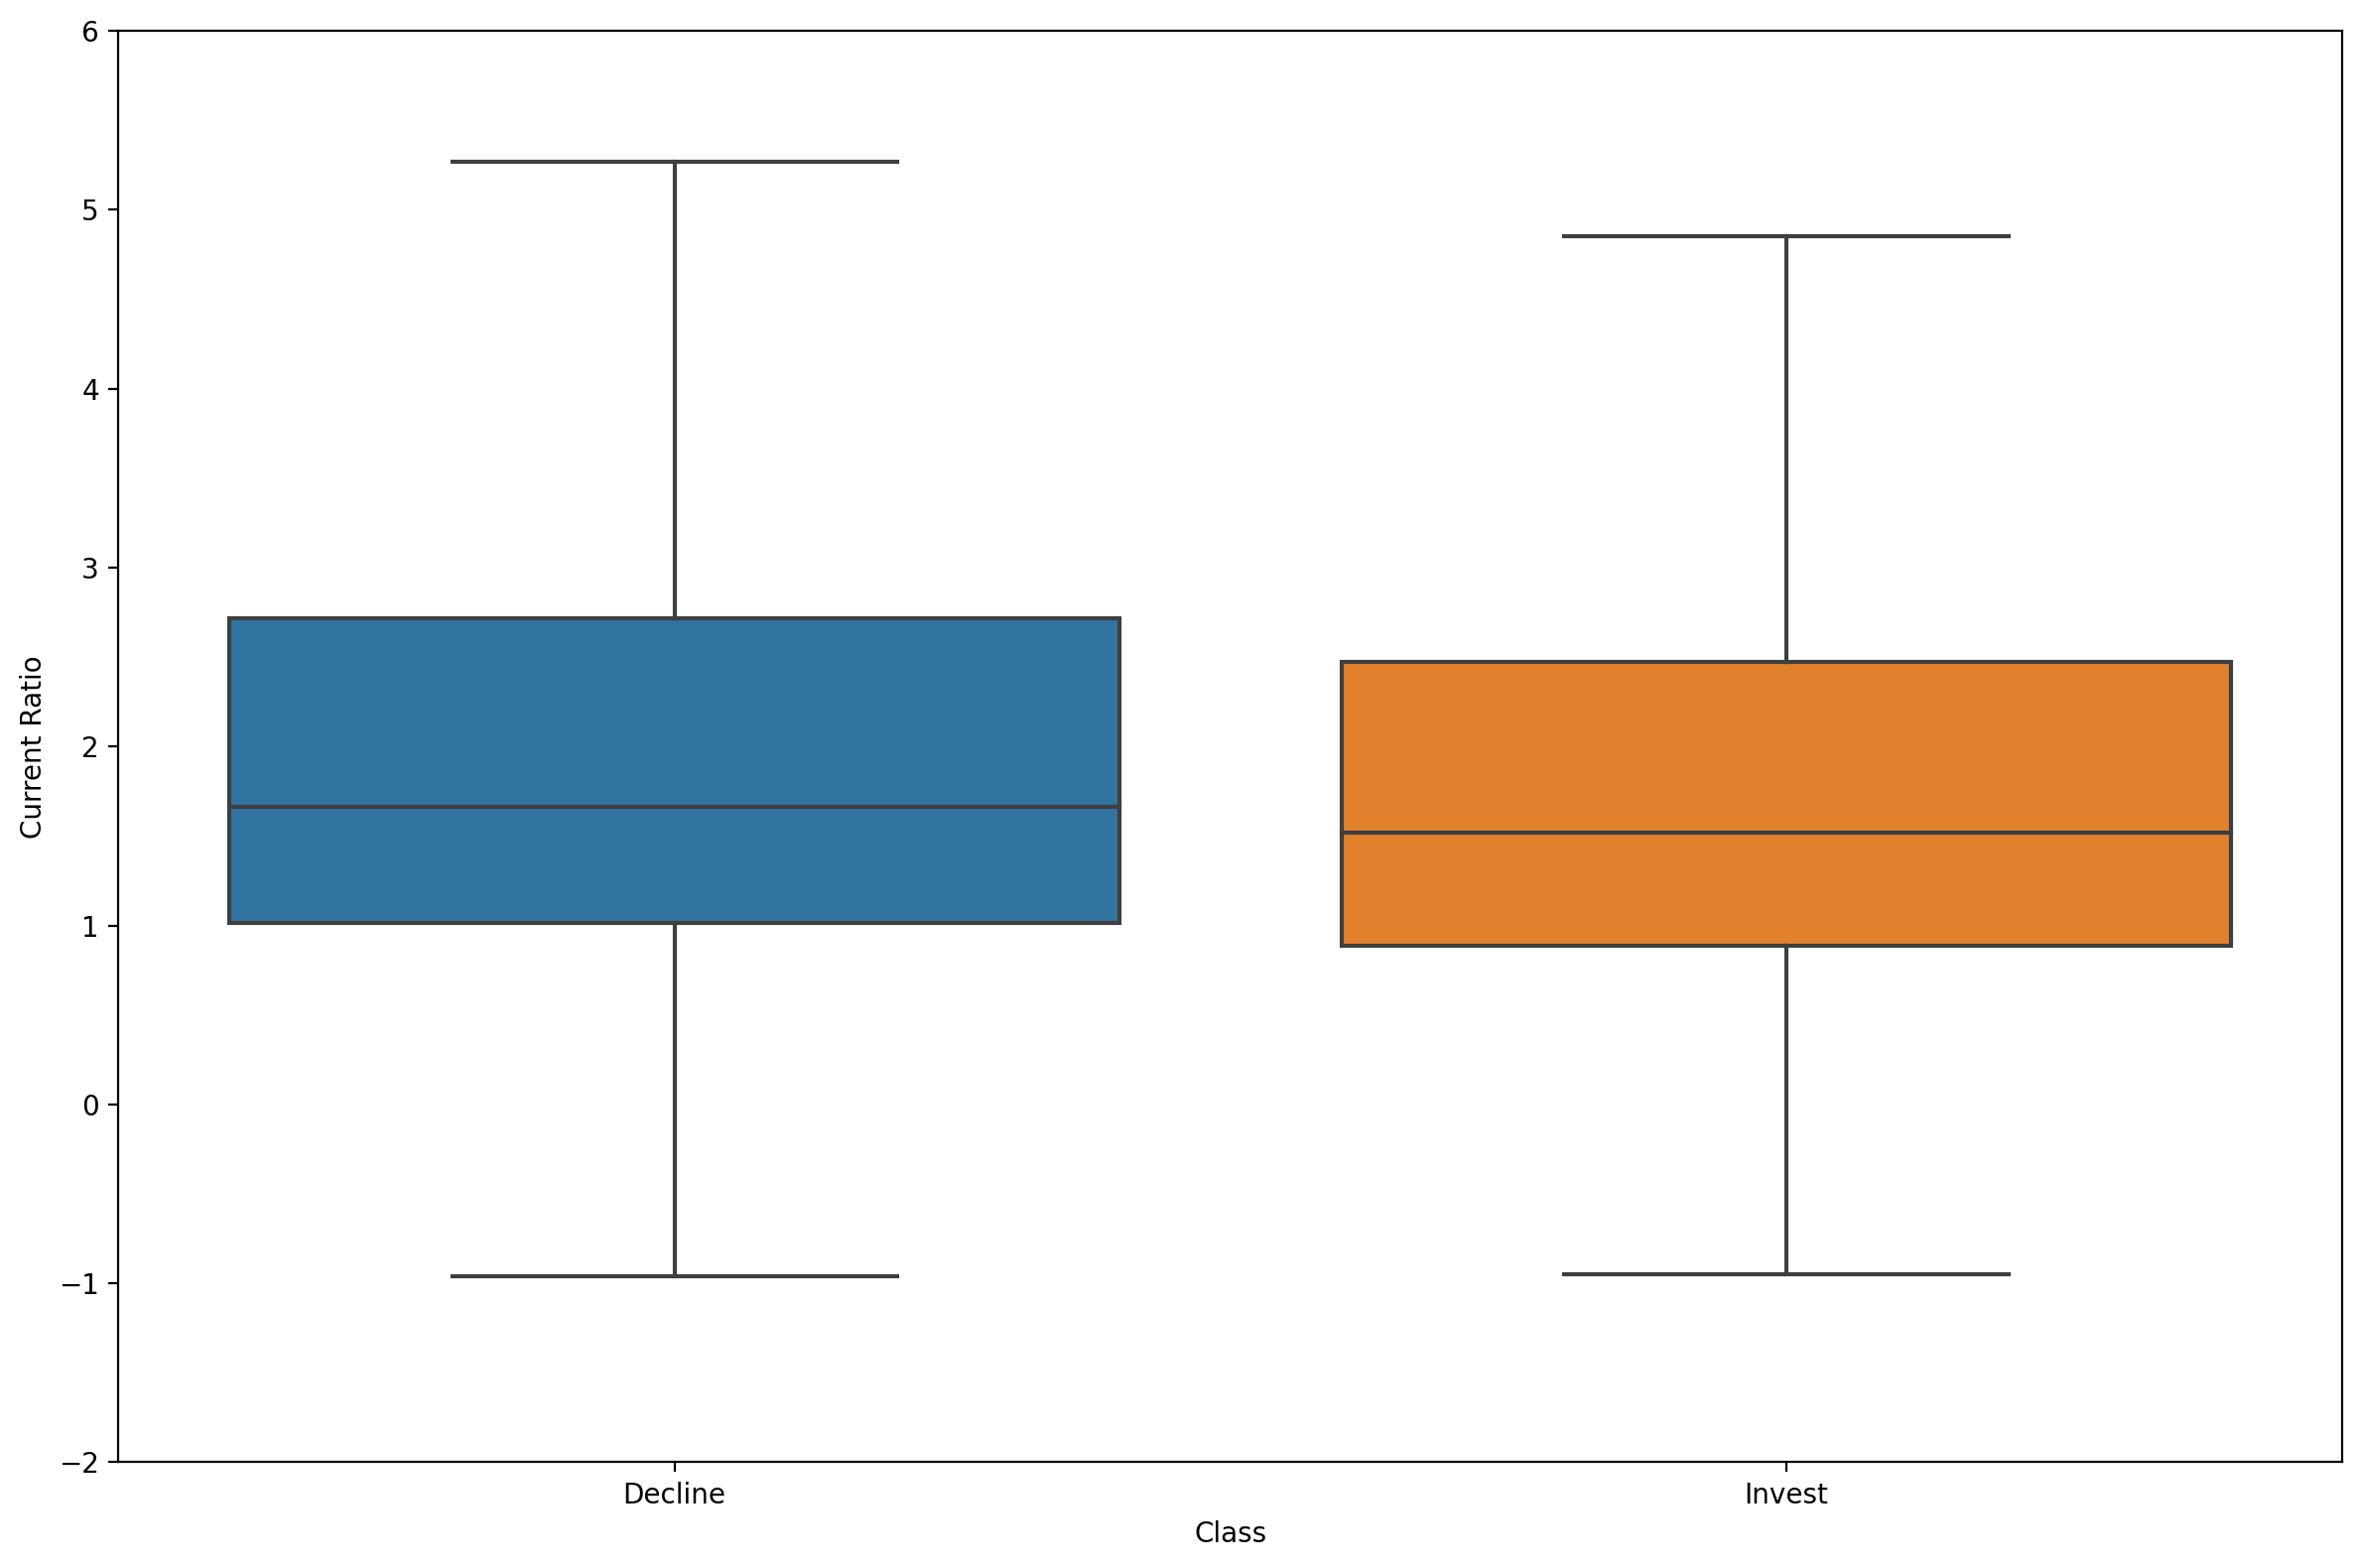

In [142]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Current Ratio', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-2, 6)

plt.tight_layout()

plt.show()

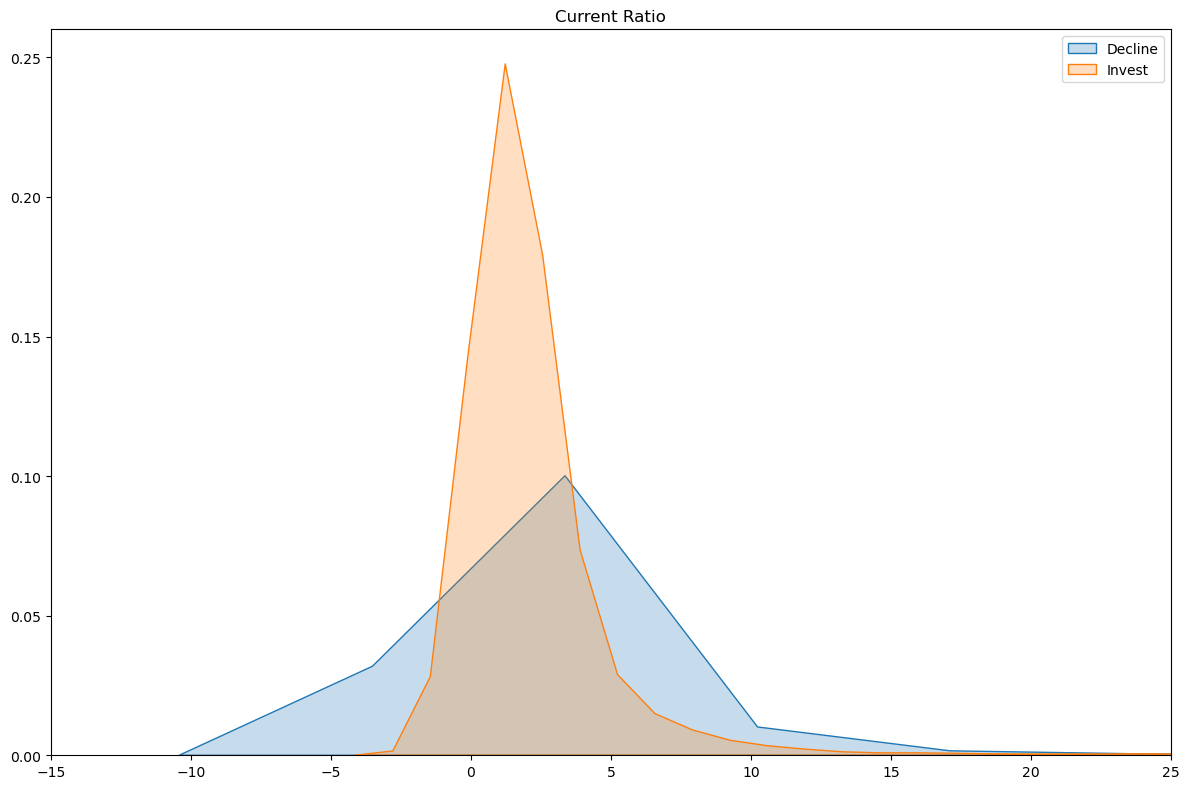

In [143]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Current Ratio'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Current Ratio'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-15, 25)

plt.legend()

plt.title('Current Ratio')

plt.tight_layout()

## Quick Ratio

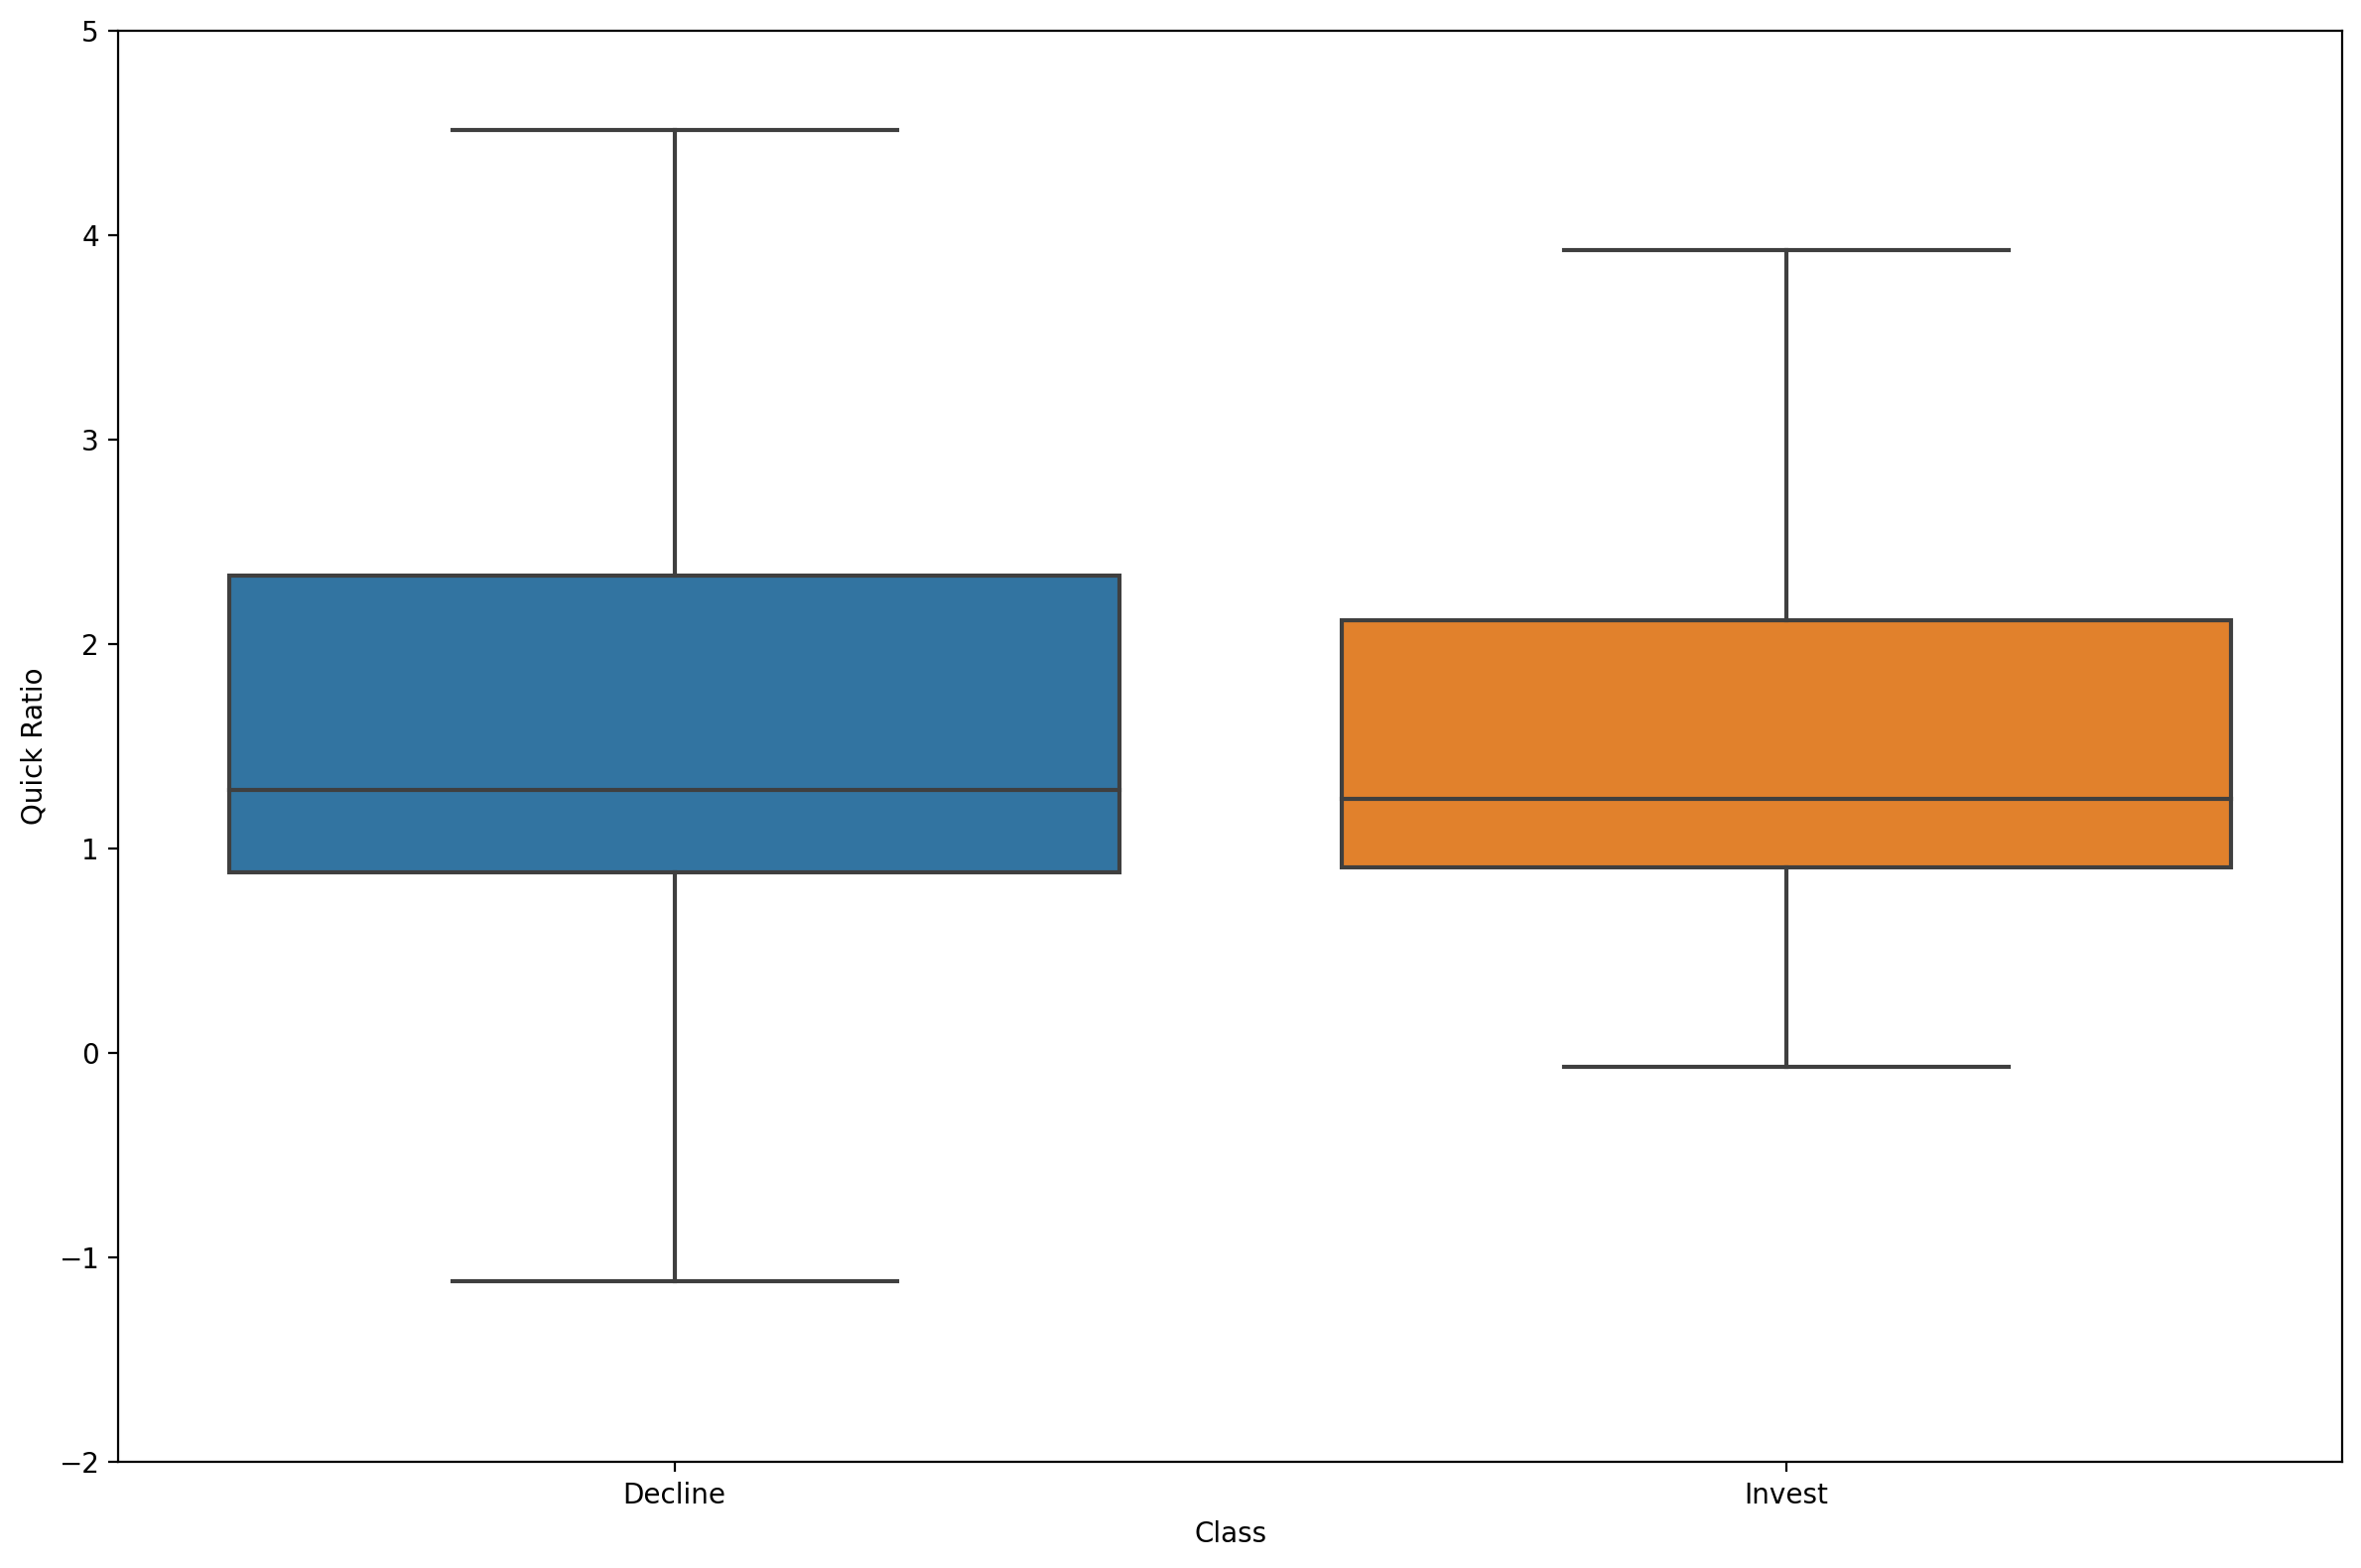

In [144]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Quick Ratio', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-2, 5)

plt.tight_layout()

plt.show()

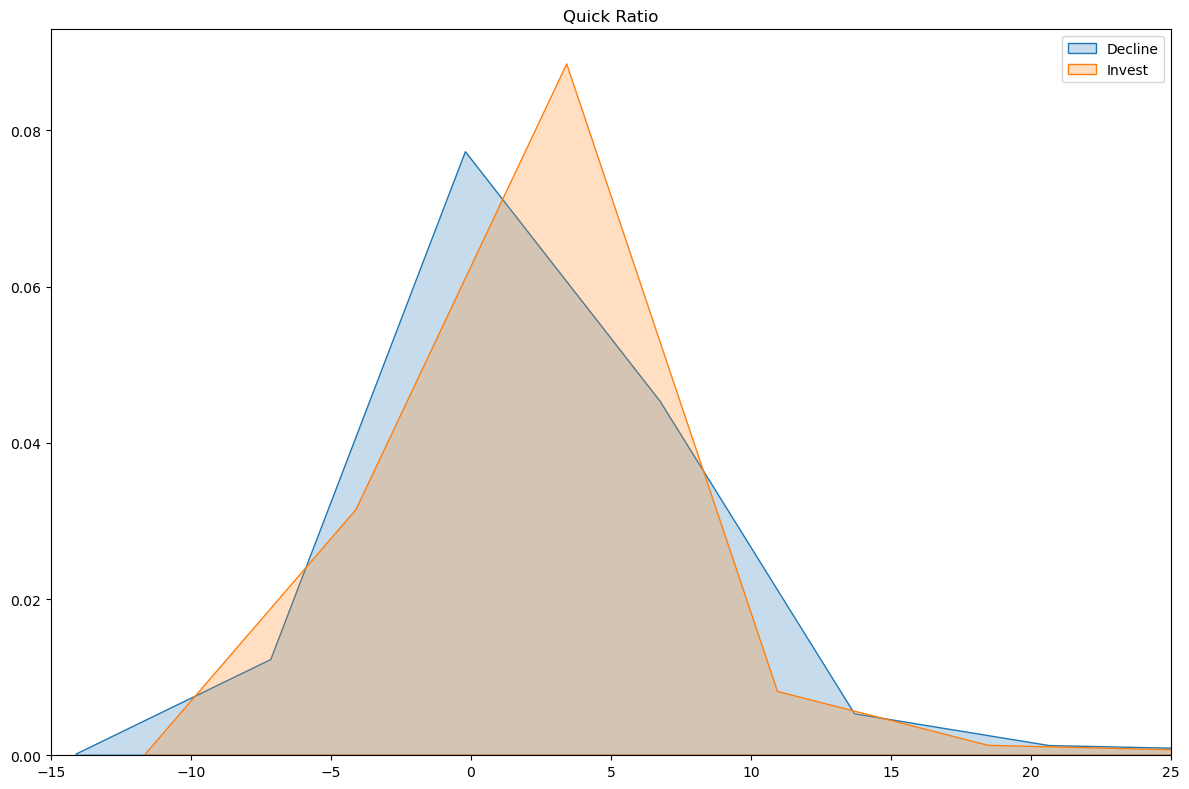

In [145]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Quick Ratio'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Quick Ratio'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-15, 25)

plt.legend()

plt.title('Quick Ratio')

plt.tight_layout()

## Cash Ratio

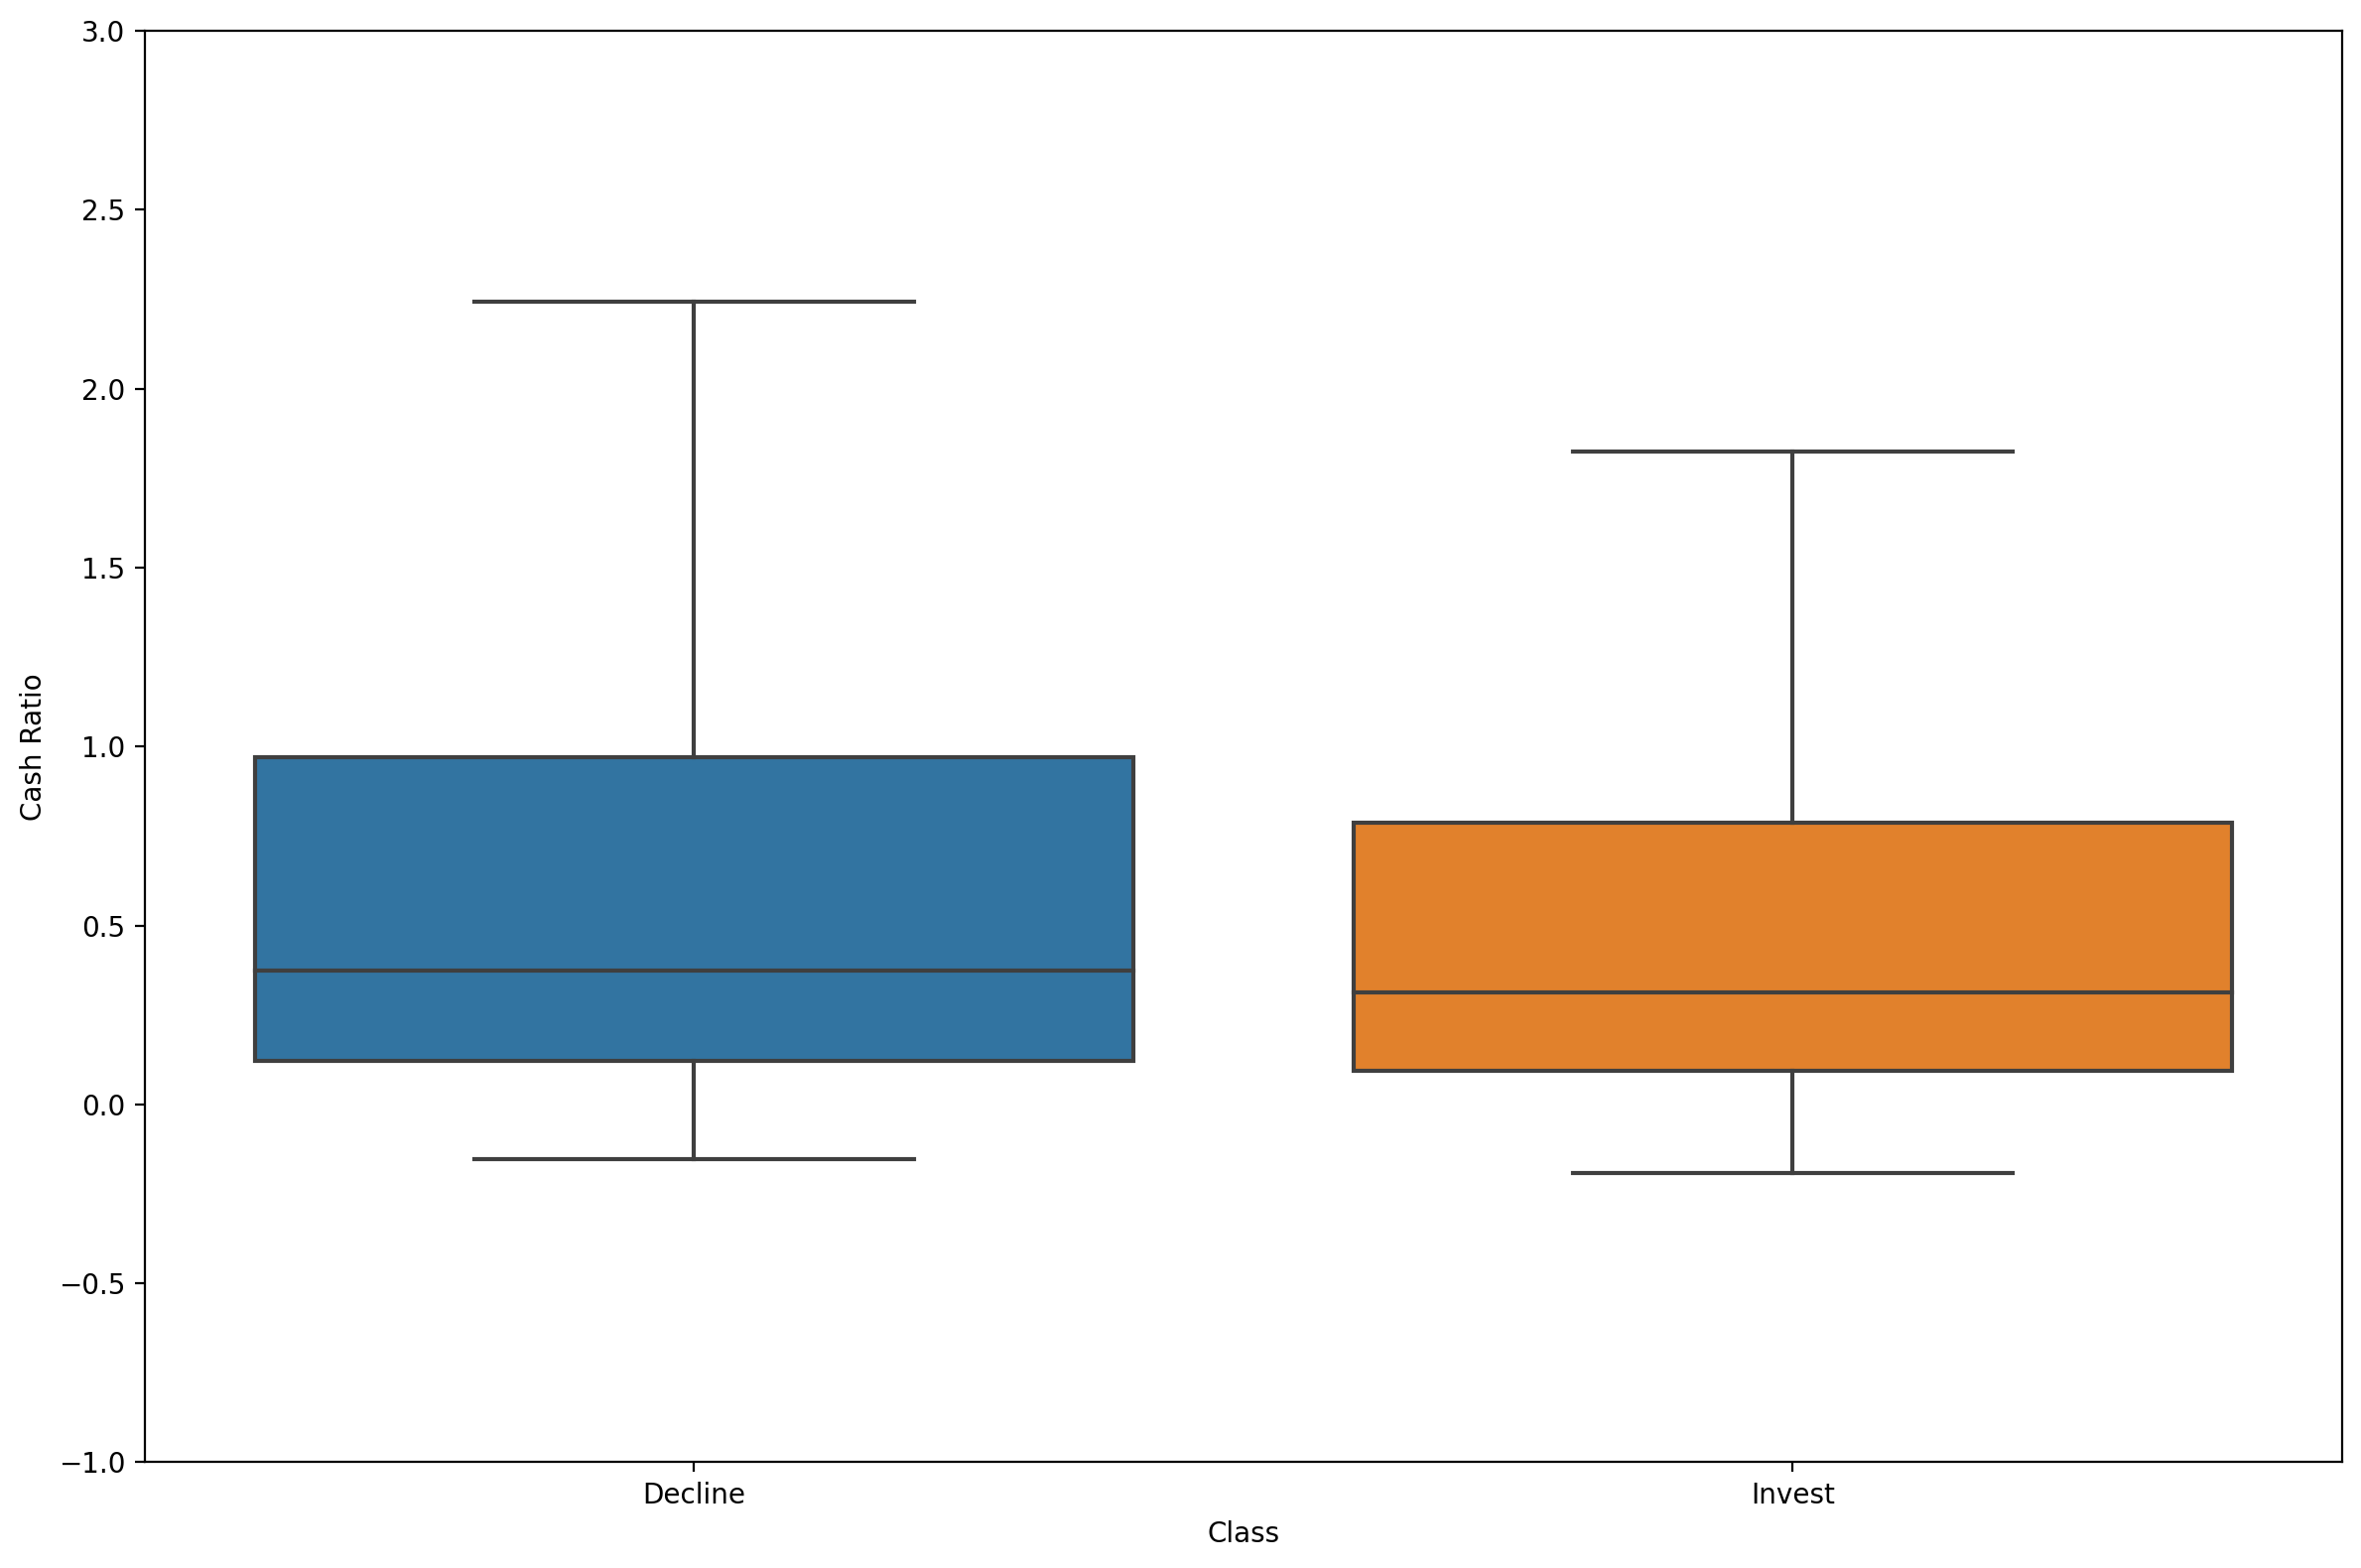

In [146]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Cash Ratio', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-1, 3)

plt.tight_layout()

plt.show()

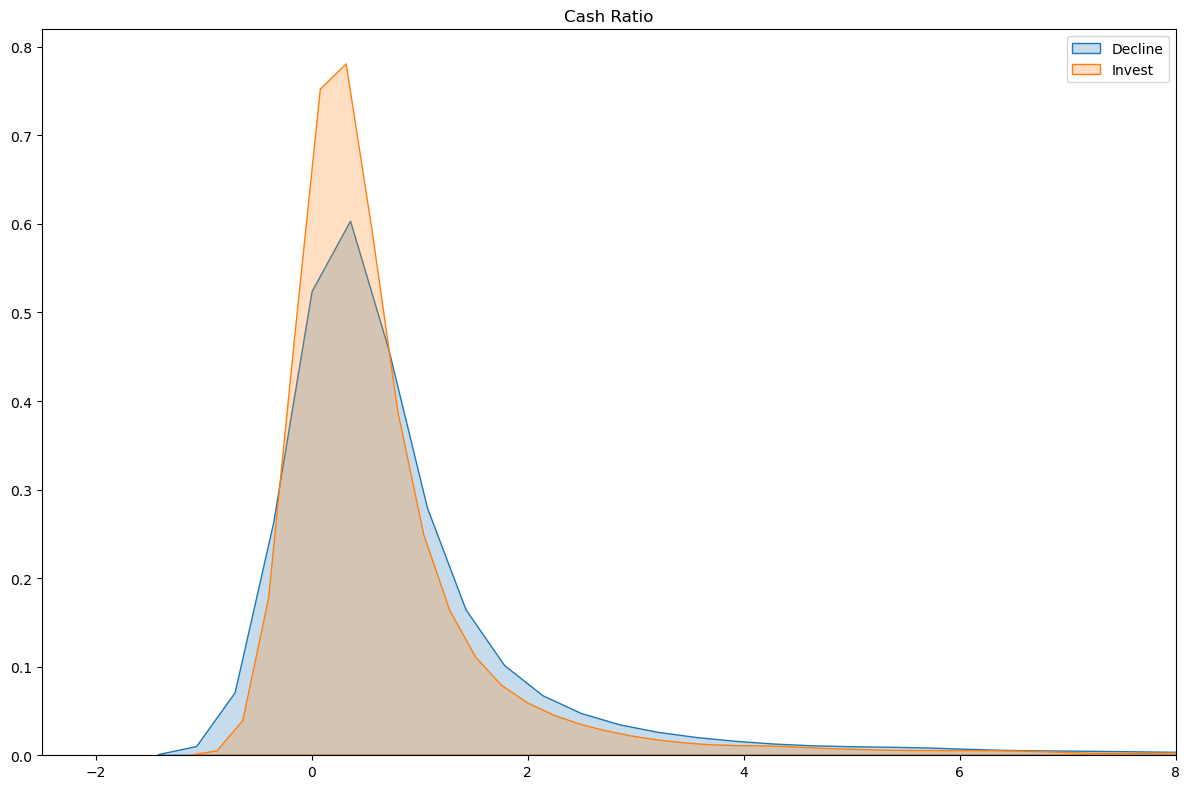

In [147]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Cash Ratio'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Cash Ratio'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-2.5, 8)

plt.legend()

plt.title('Cash Ratio')

plt.tight_layout()

## Debt Ratio

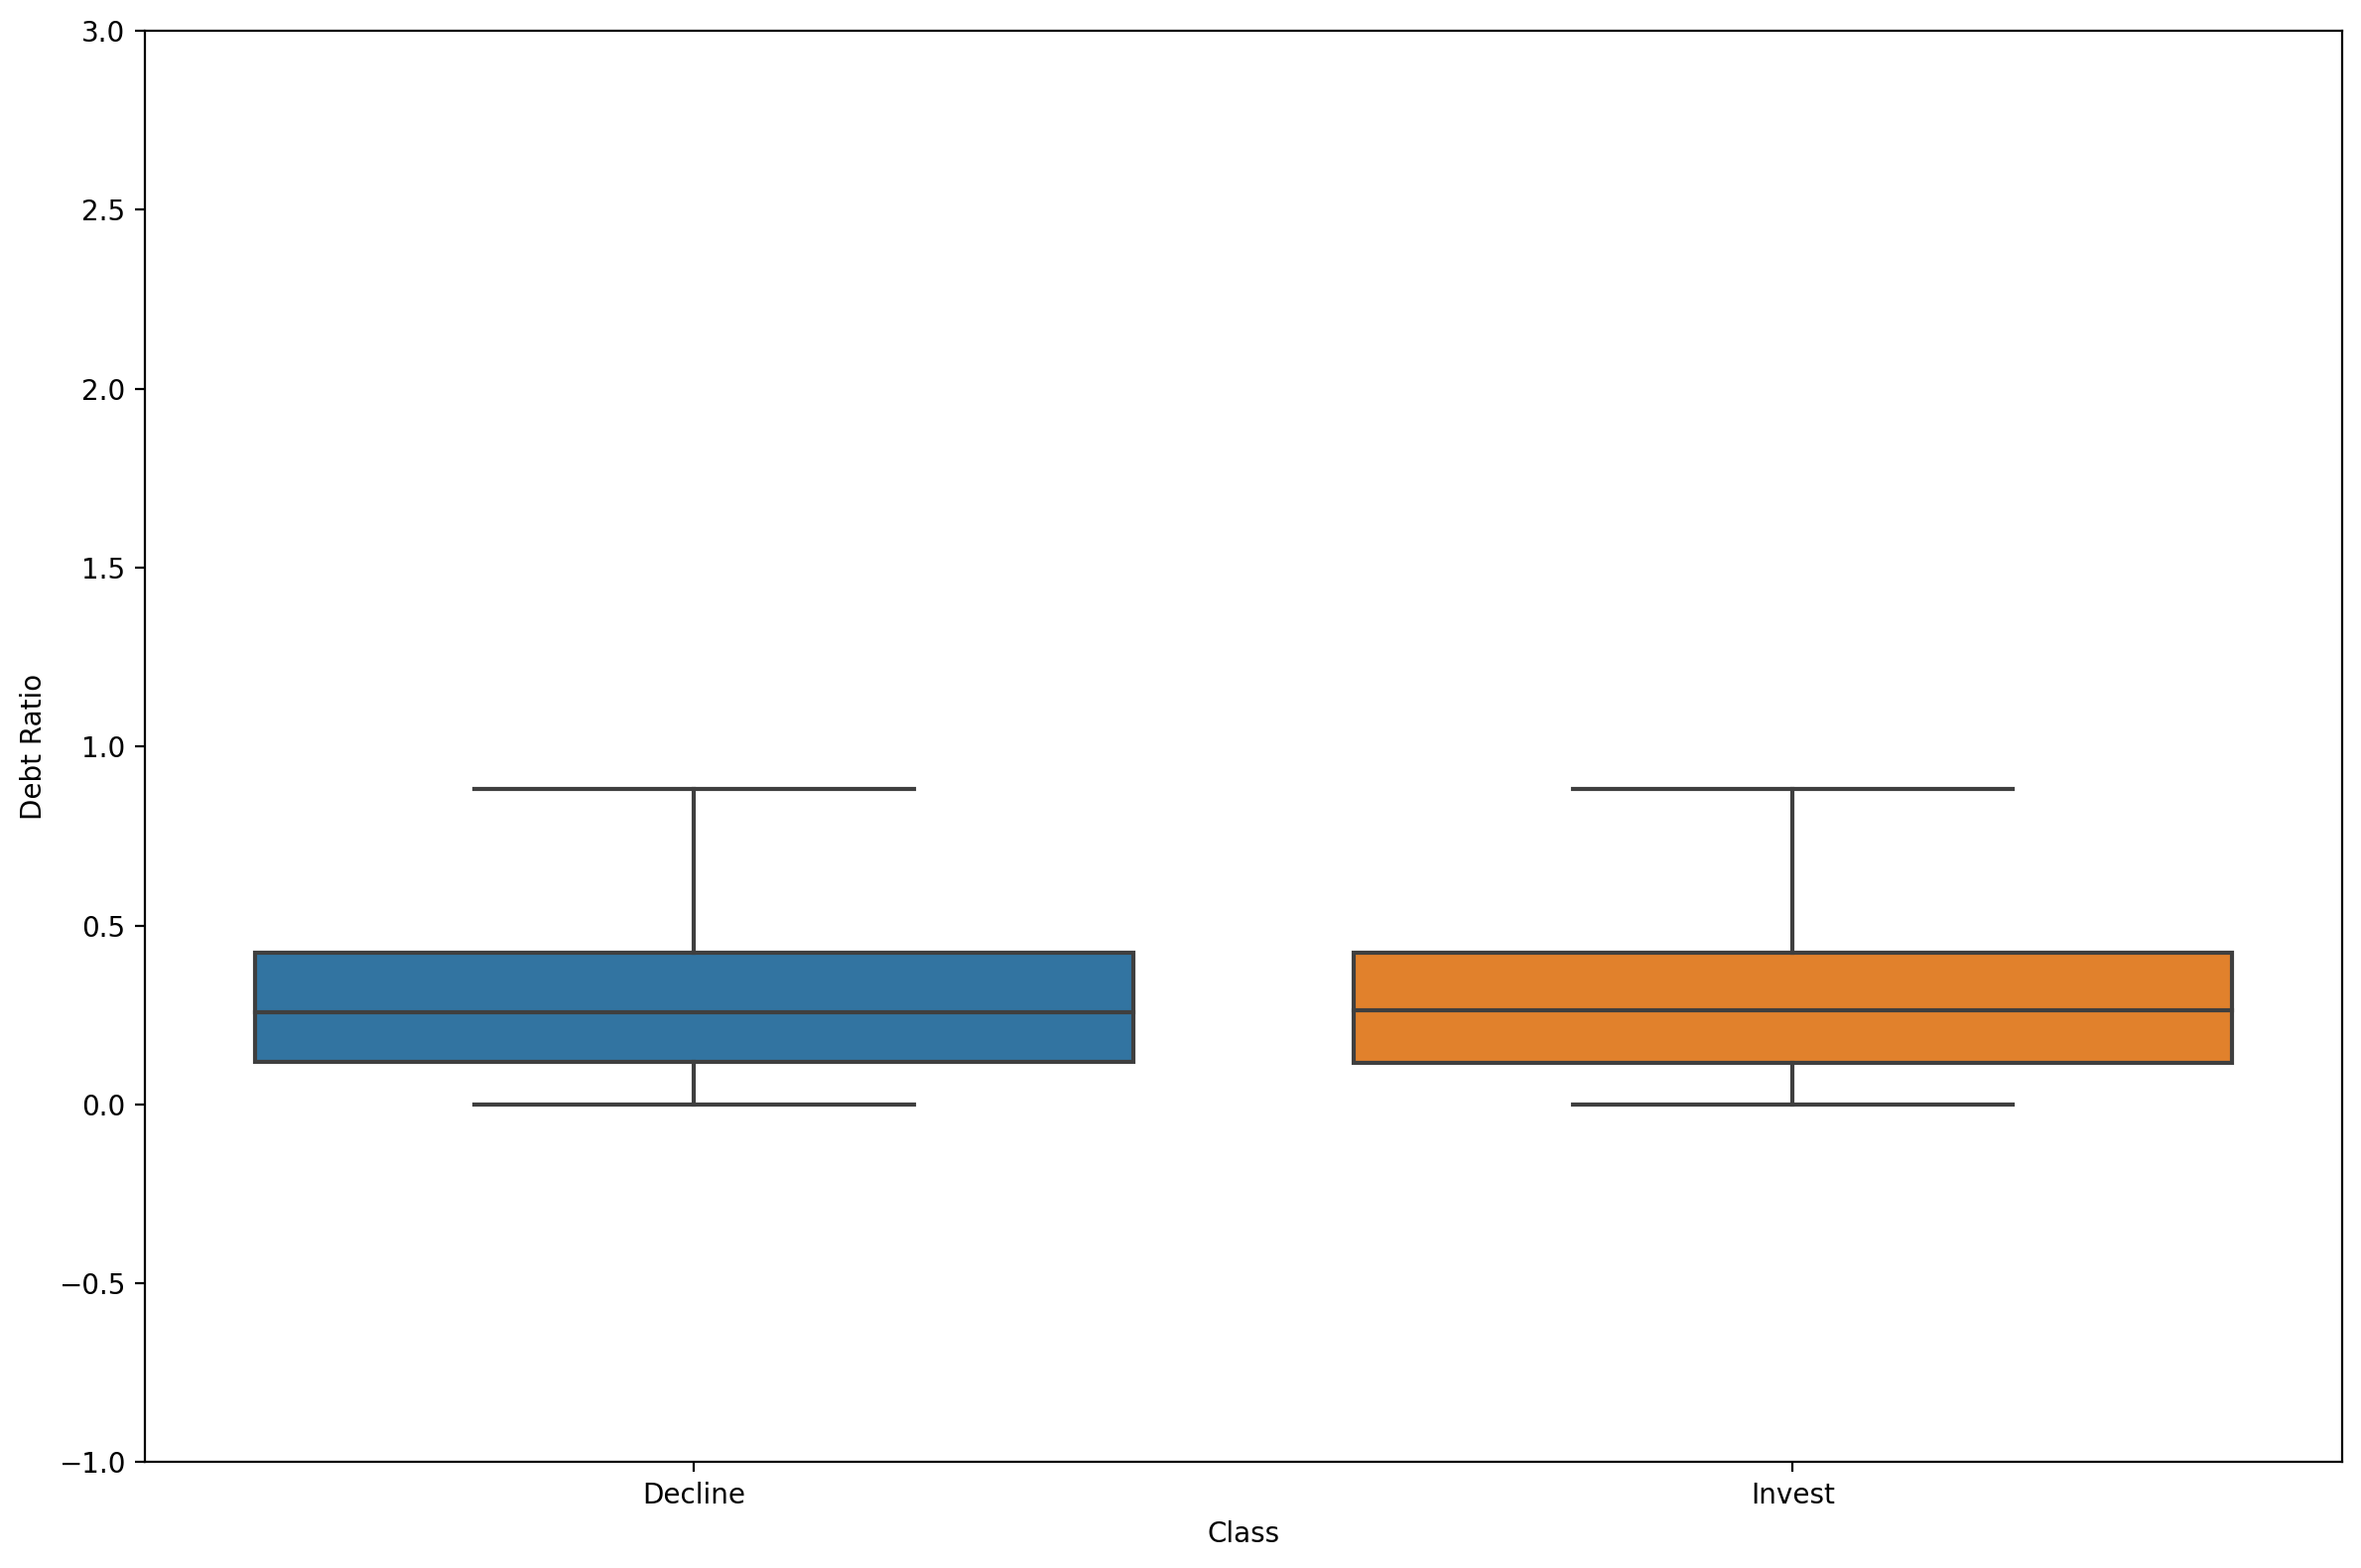

In [148]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Debt Ratio', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-1, 3)

plt.tight_layout()

plt.show()

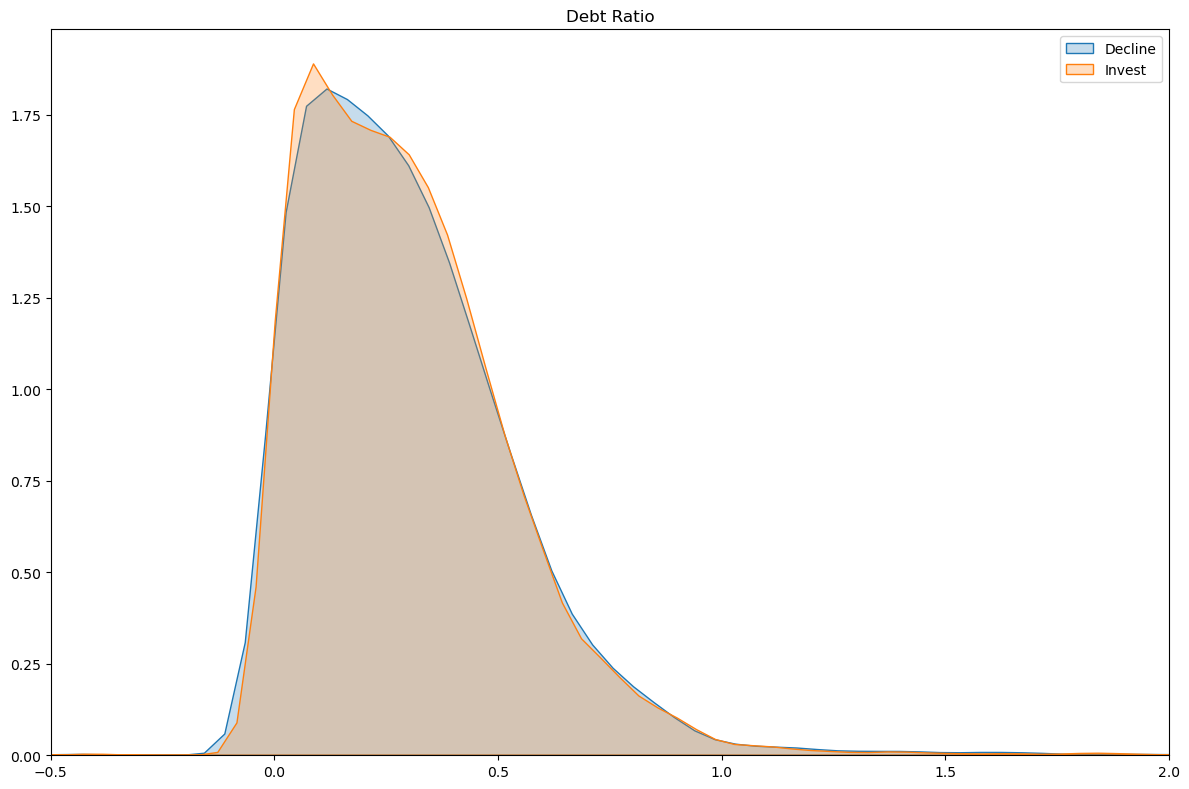

In [149]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Debt Ratio'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Debt Ratio'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-0.5, 2)

plt.legend()

plt.title('Debt Ratio')

plt.tight_layout()

## Debt to Equity Ratio

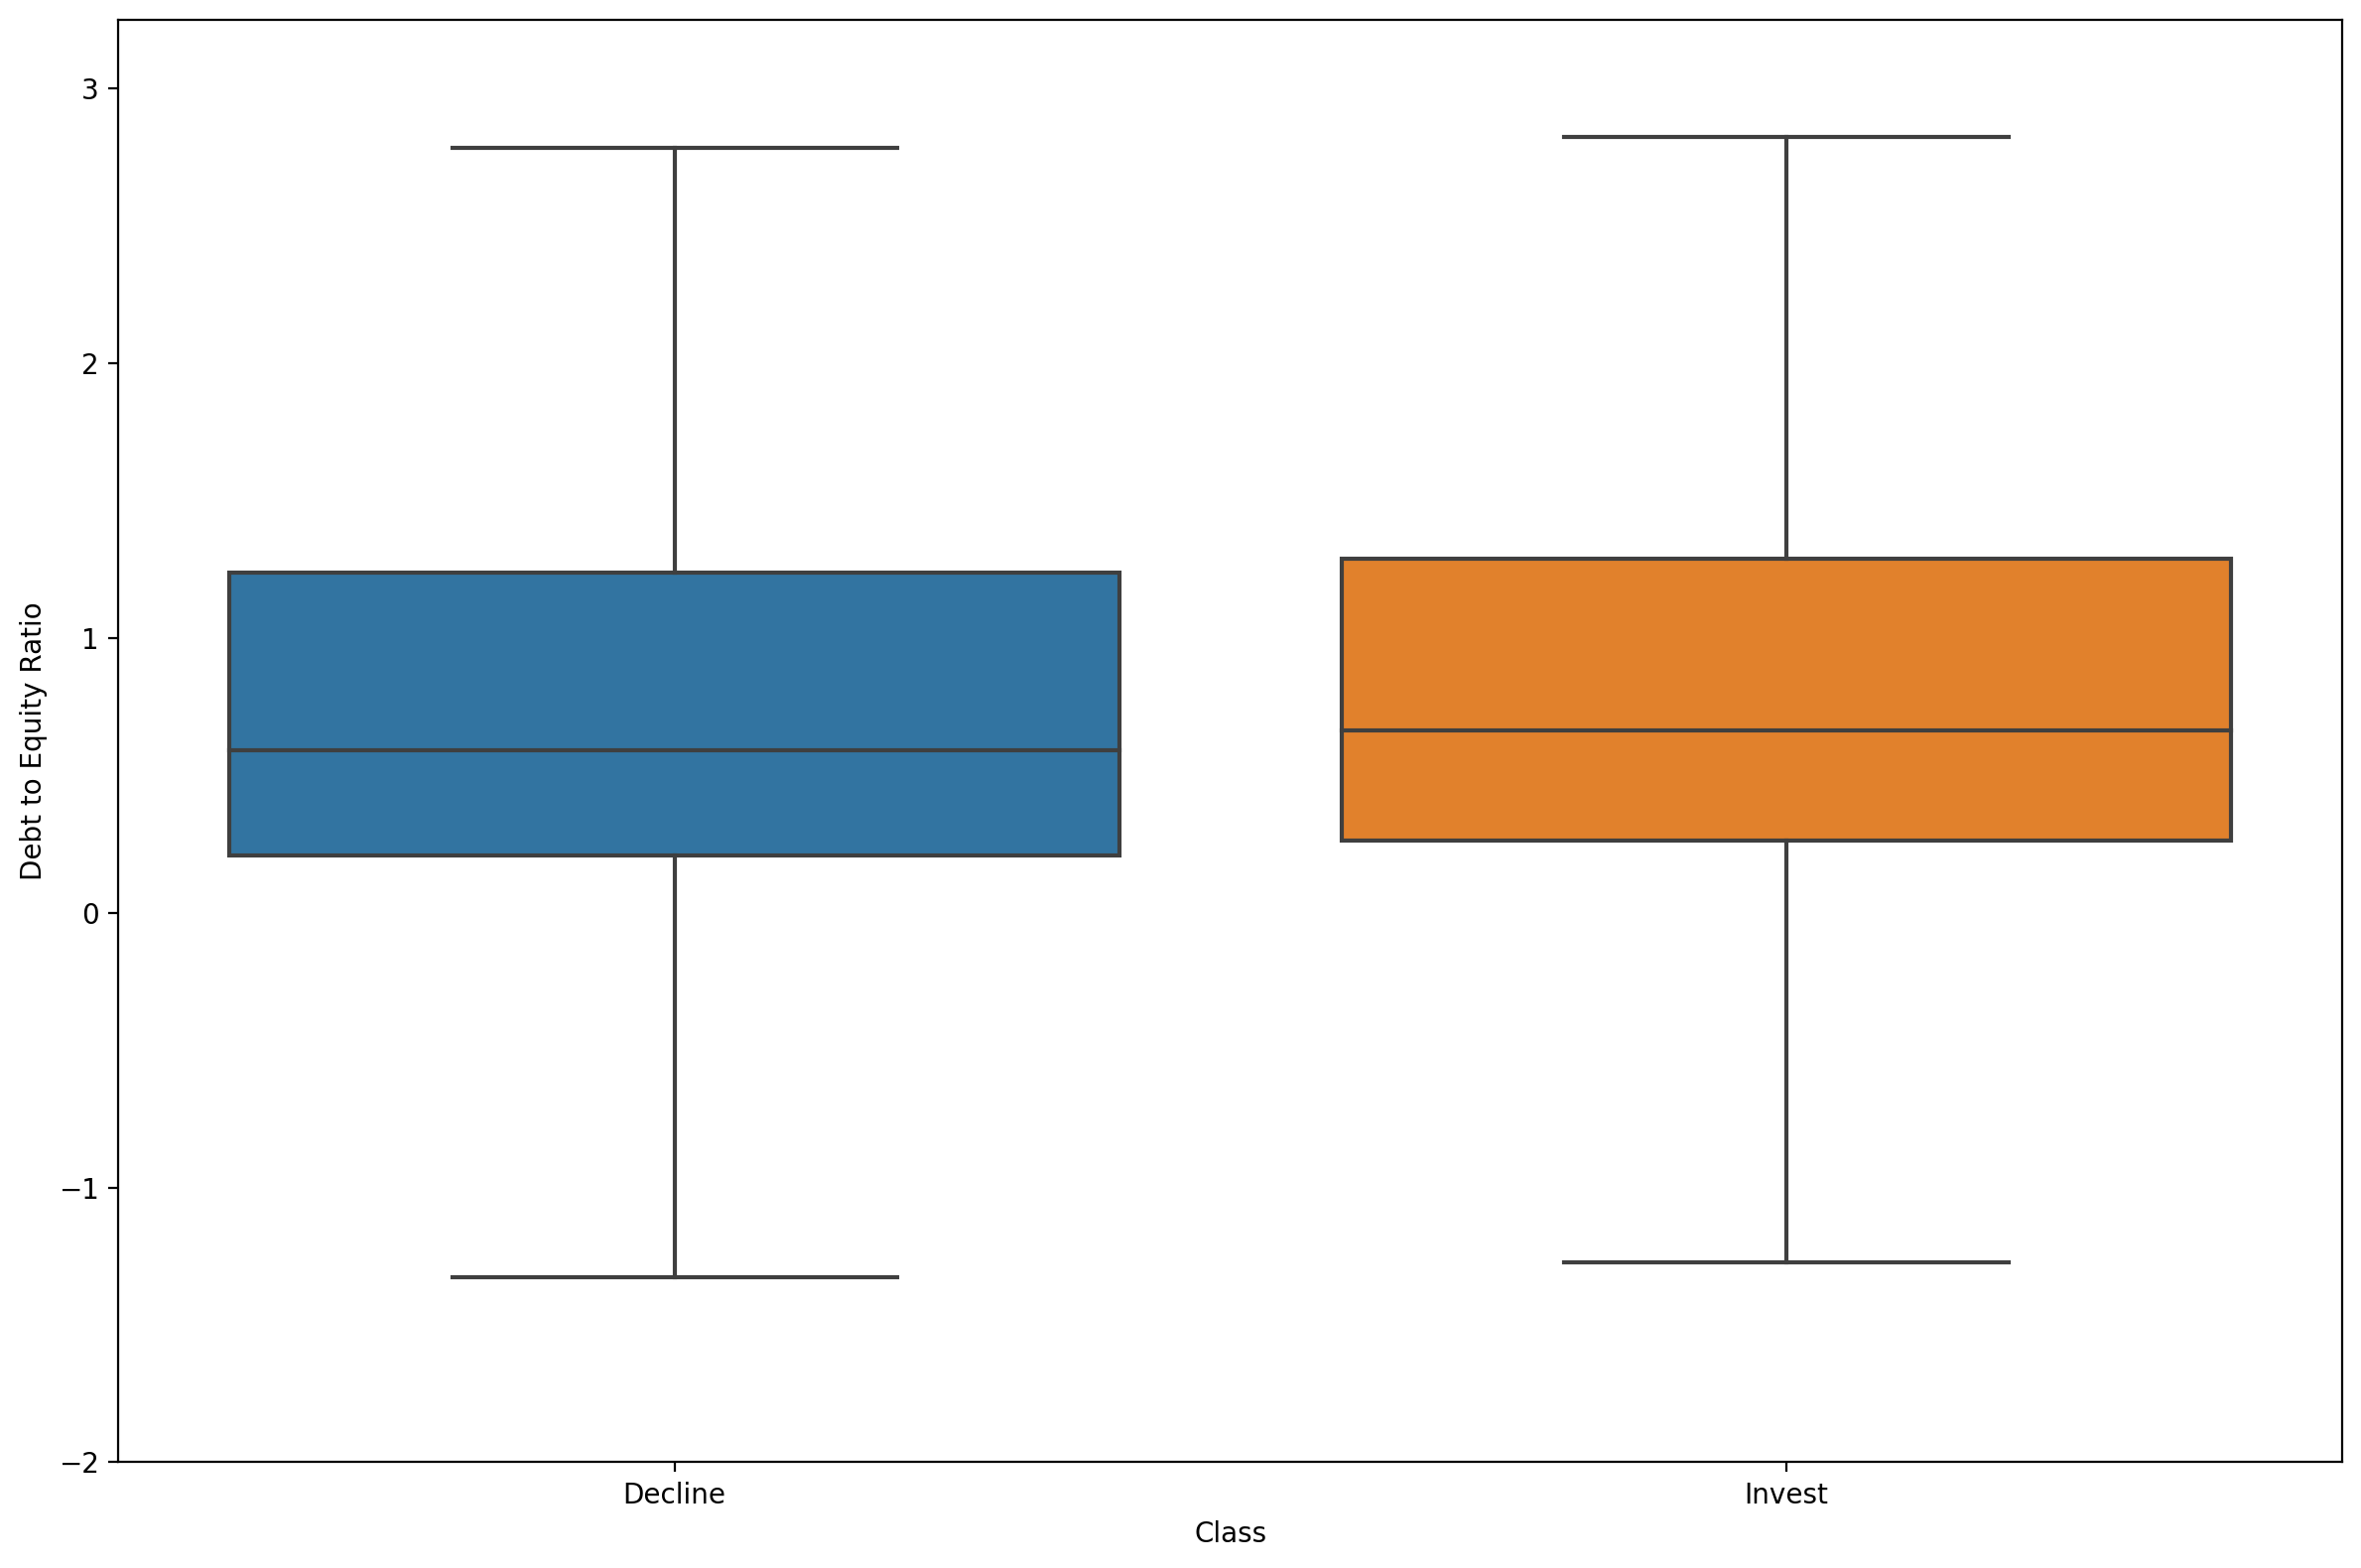

In [150]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Debt to Equity Ratio', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-2, 3.25)

plt.tight_layout()

plt.show()

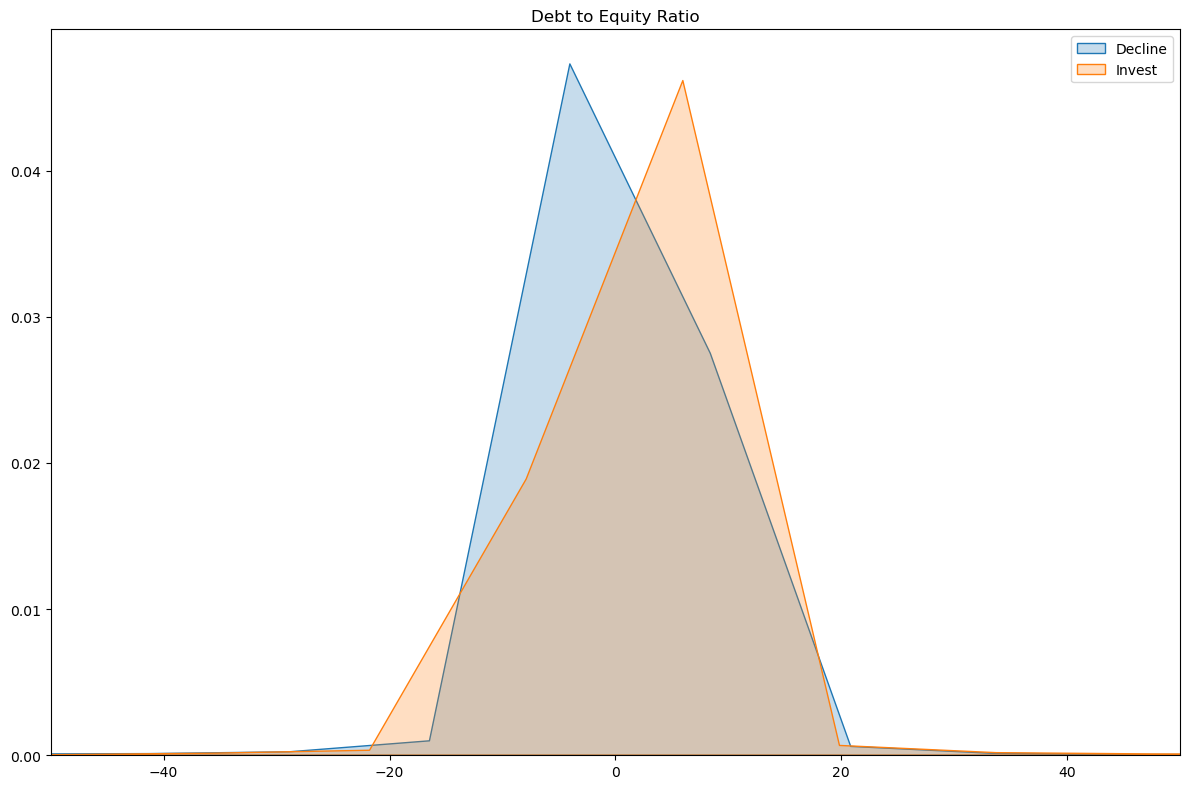

In [151]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Debt to Equity Ratio'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Debt to Equity Ratio'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-50, 50)

plt.legend()

plt.title('Debt to Equity Ratio')

plt.tight_layout()

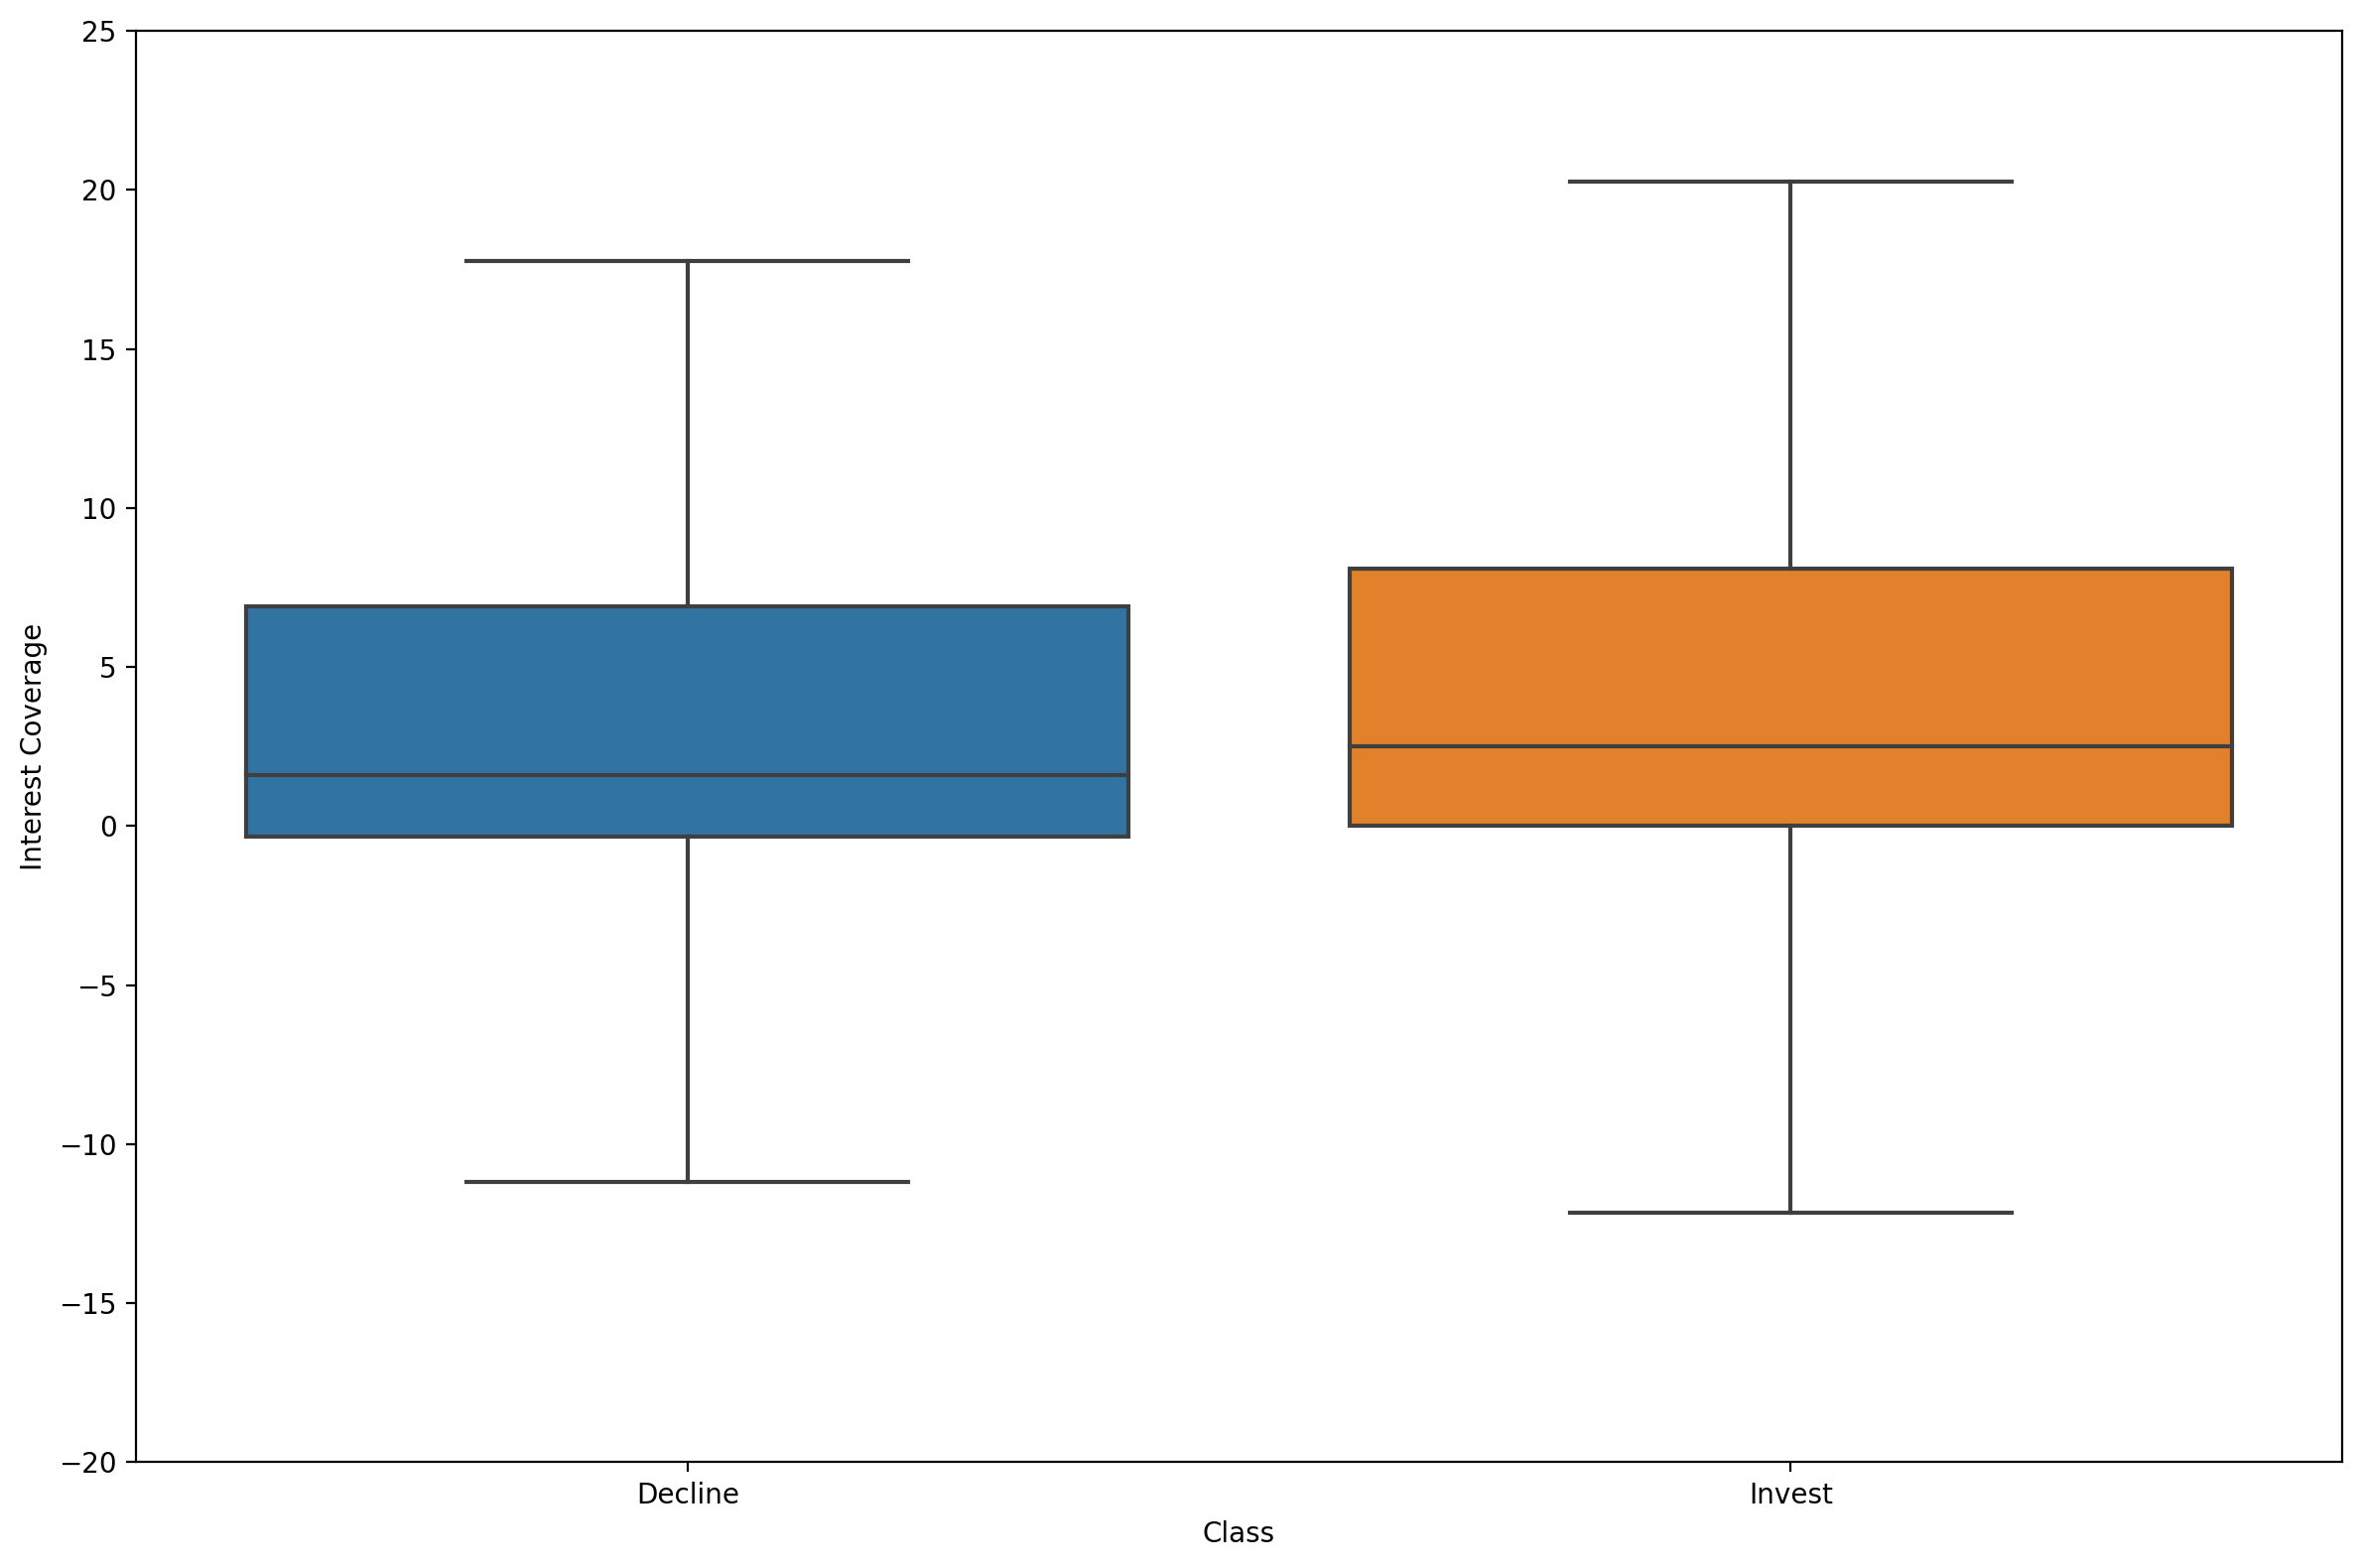

In [152]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Interest Coverage', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-20, 25)

plt.tight_layout()

plt.show()

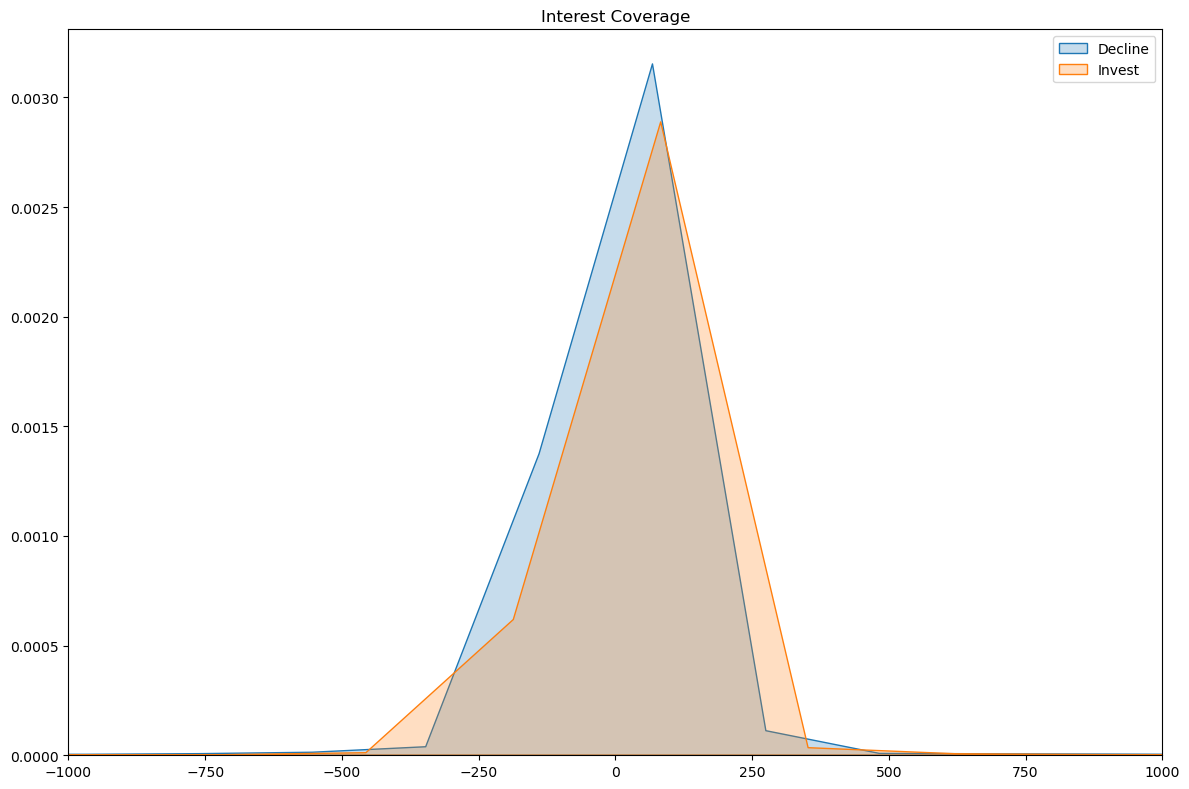

In [153]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Interest Coverage'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Interest Coverage'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-1000, 1000)

plt.legend()

plt.title('Interest Coverage')

plt.tight_layout()

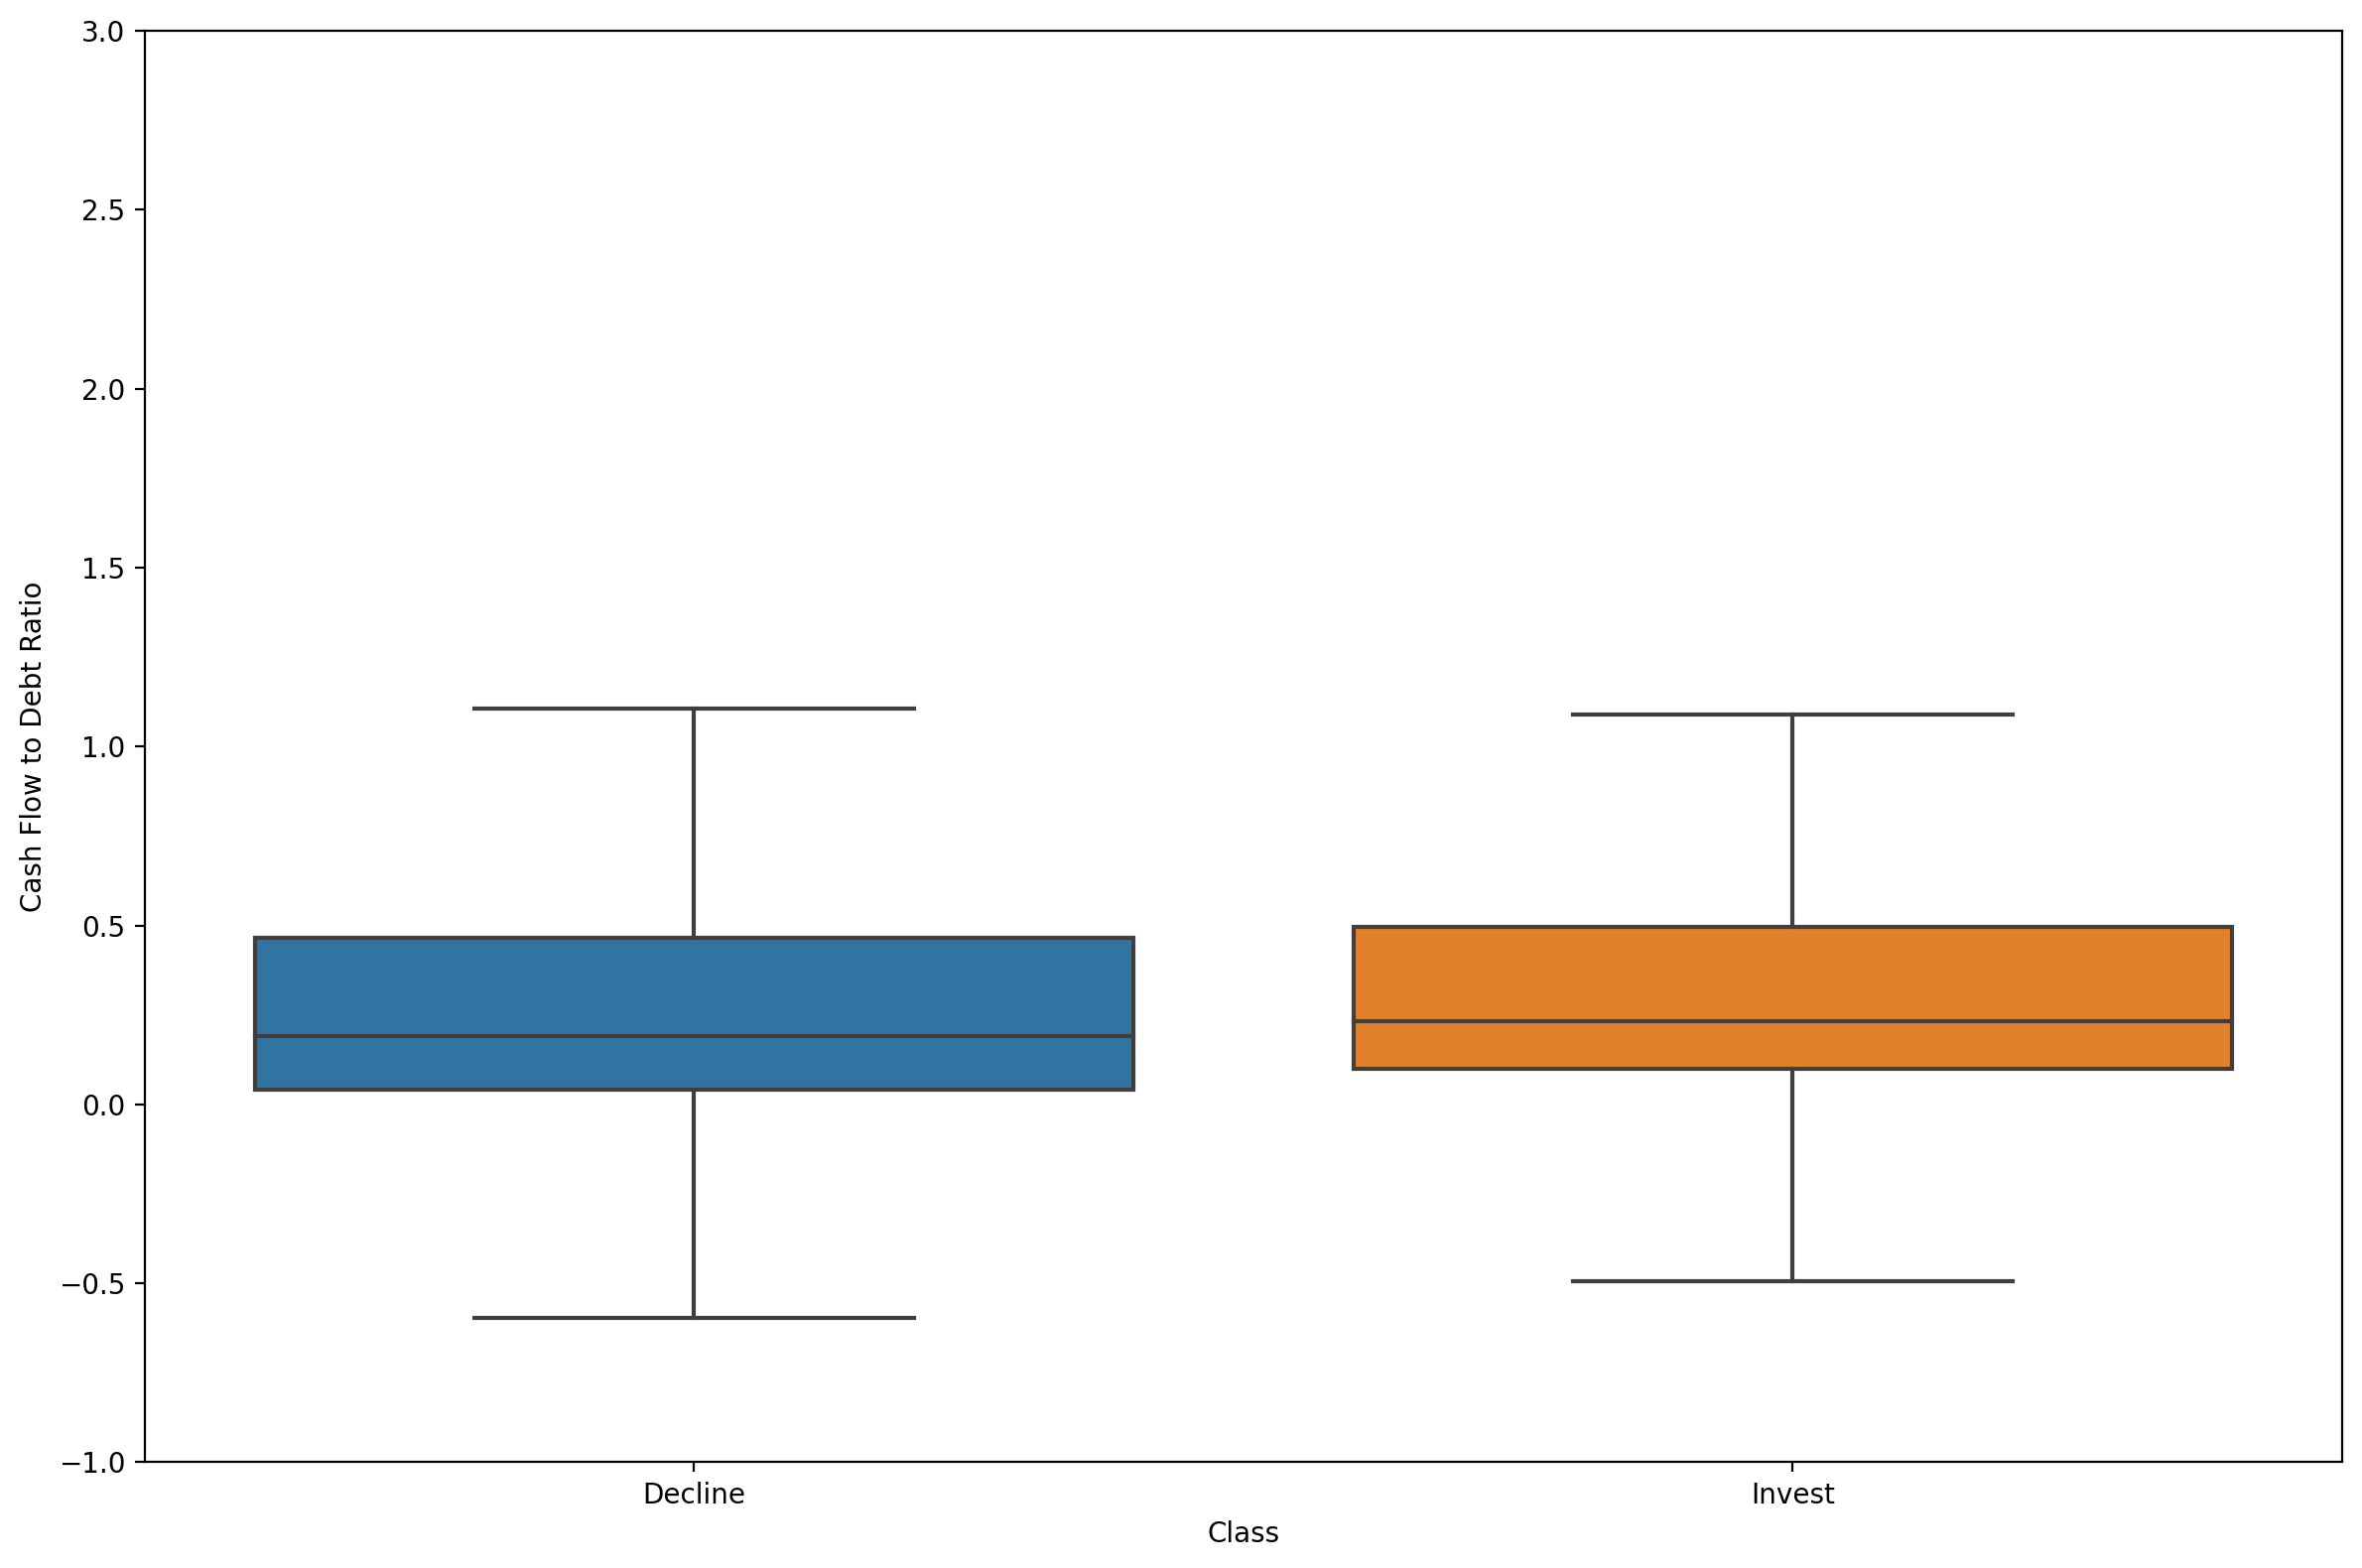

In [154]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Cash Flow to Debt Ratio', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-1, 3)

plt.tight_layout()

plt.show()

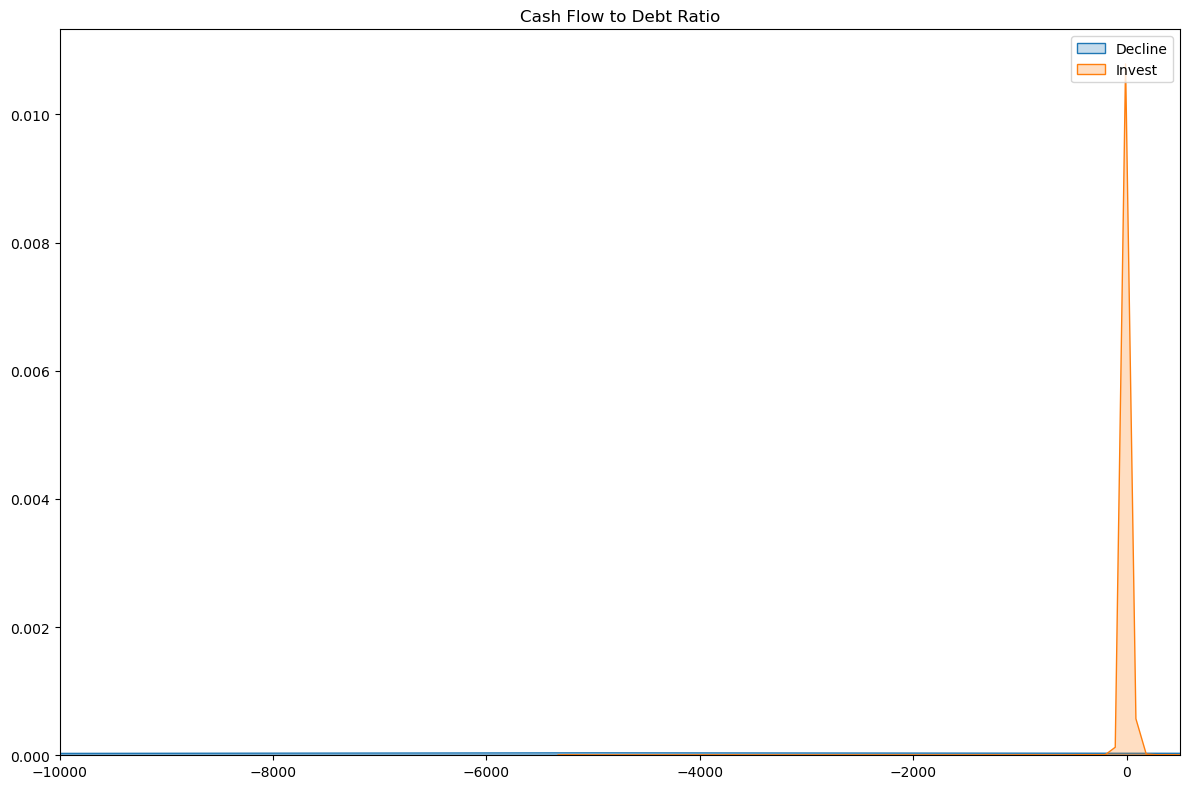

In [155]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Cash Flow to Debt Ratio'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Cash Flow to Debt Ratio'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-10000, 500)

plt.legend()

plt.title('Cash Flow to Debt Ratio')

plt.tight_layout()

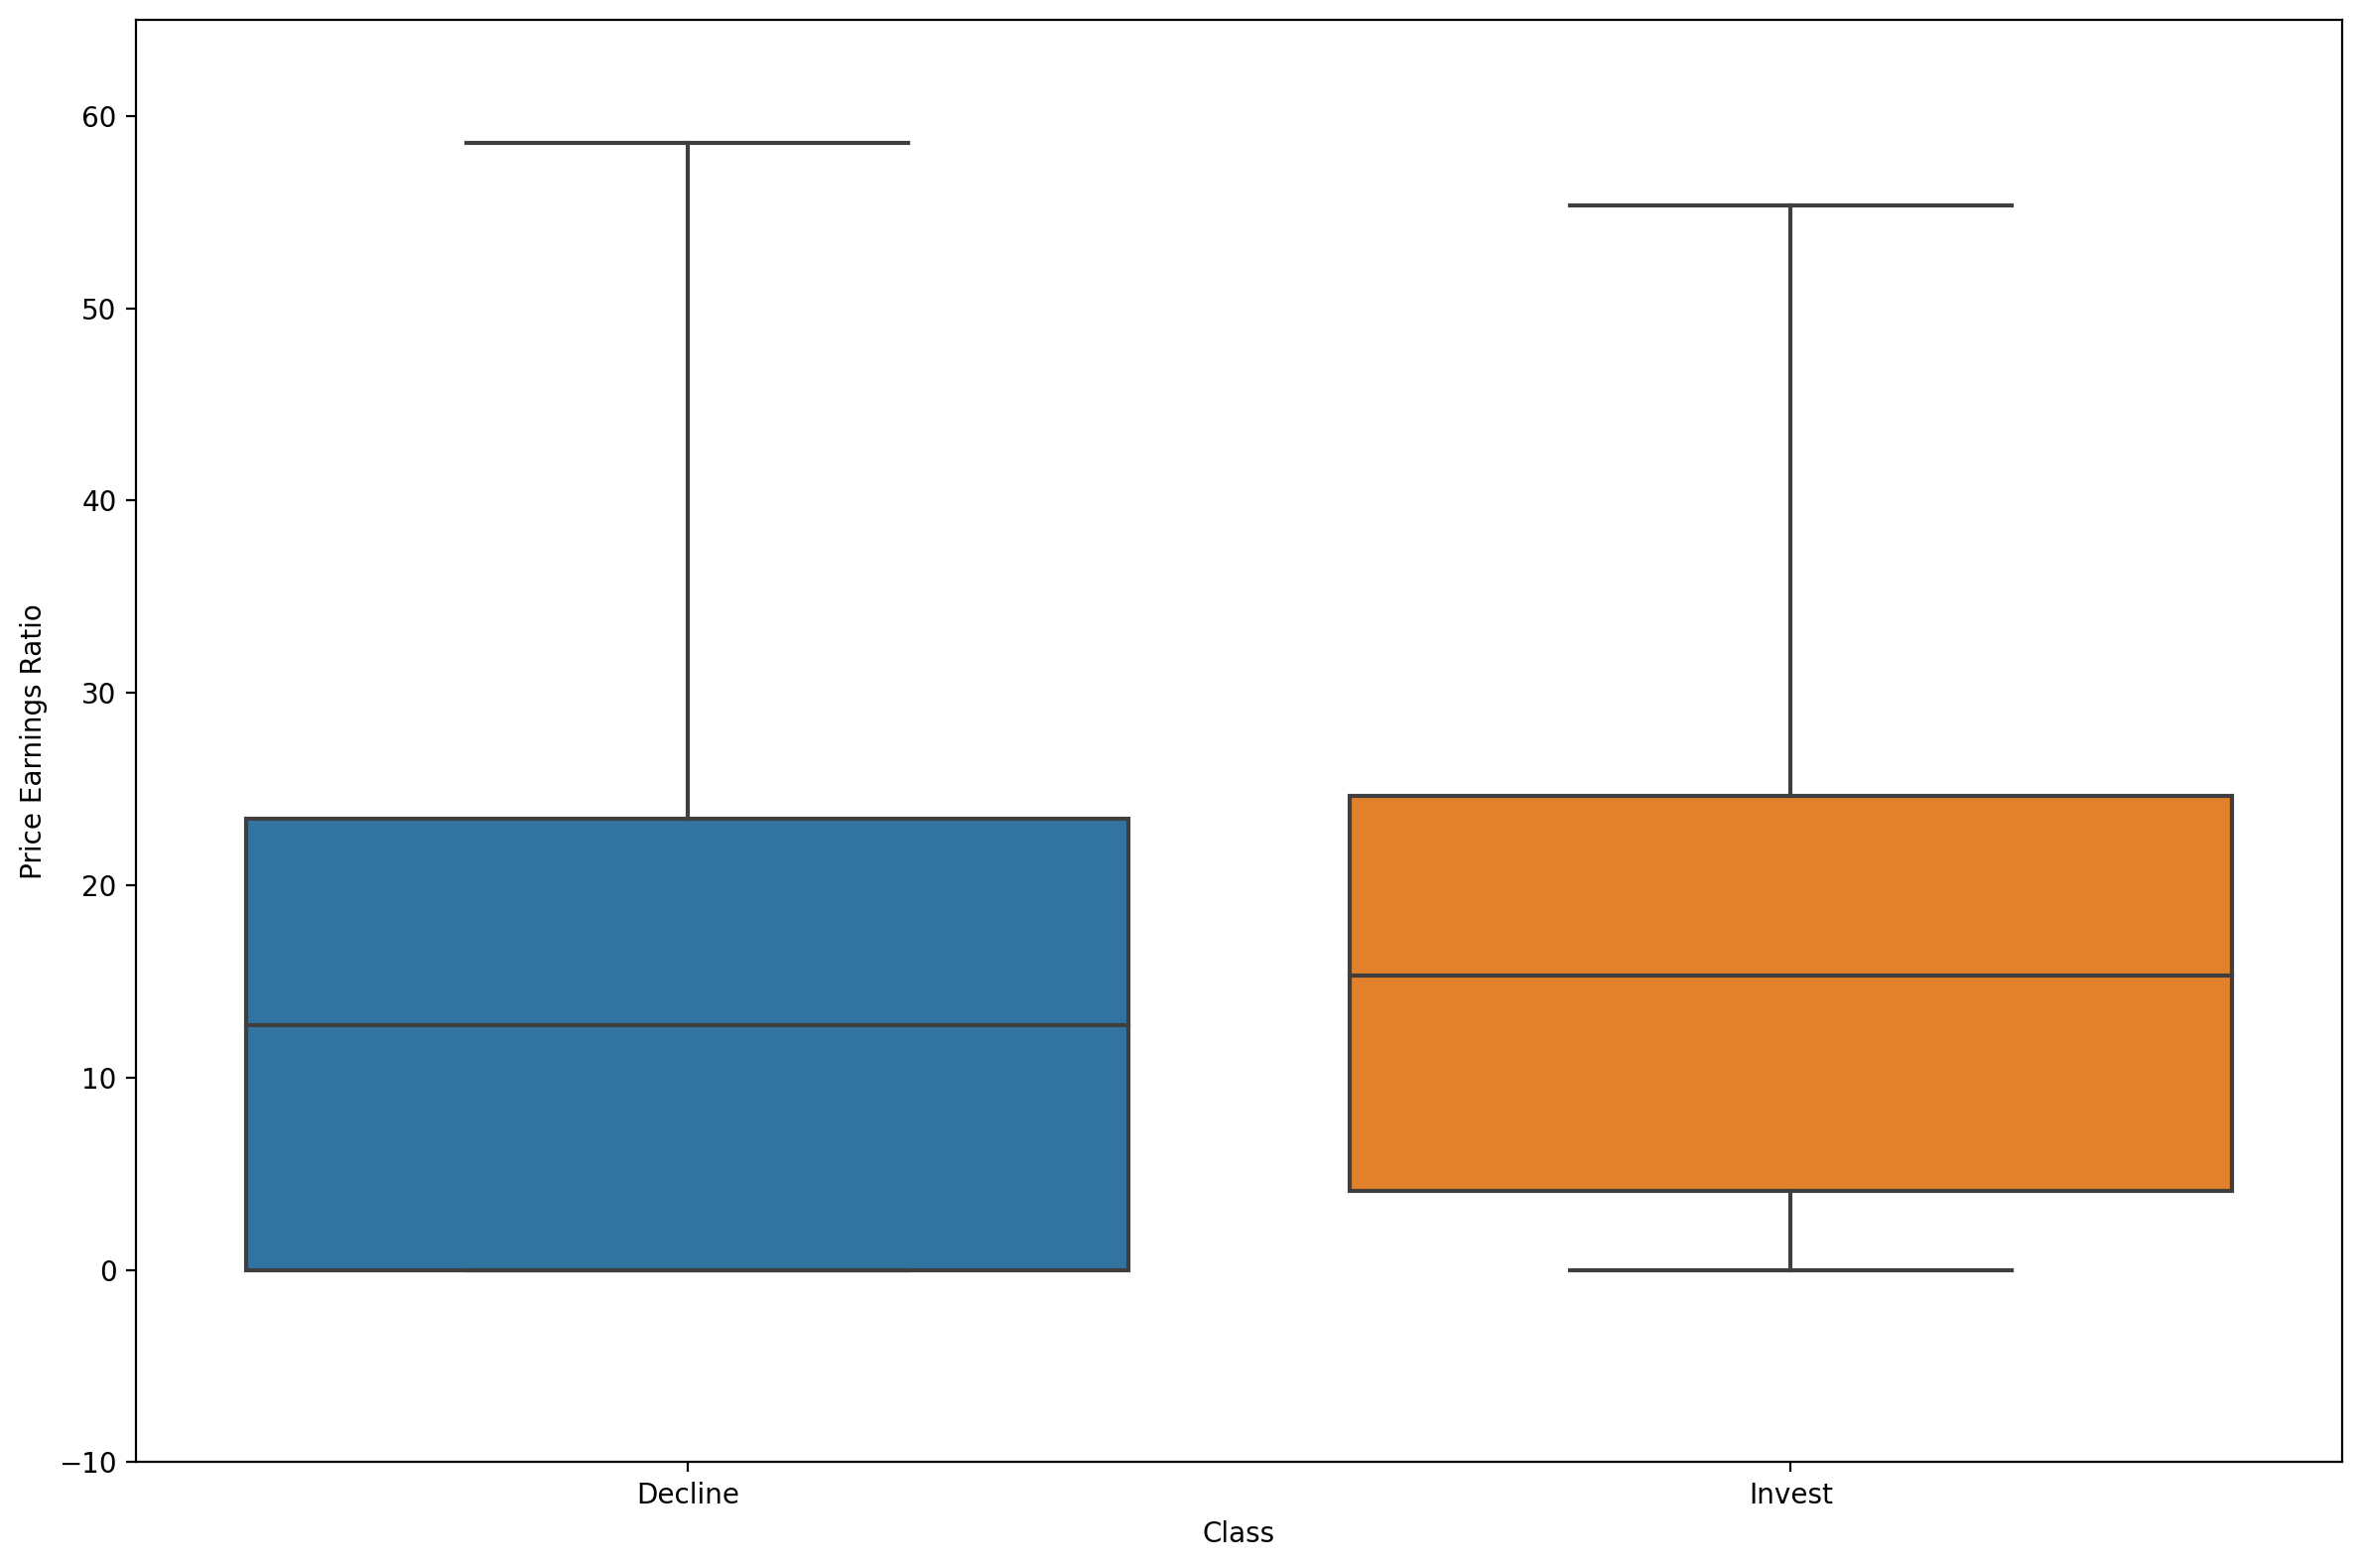

In [156]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Price Earnings Ratio', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-10, 65)

plt.tight_layout()

plt.show()

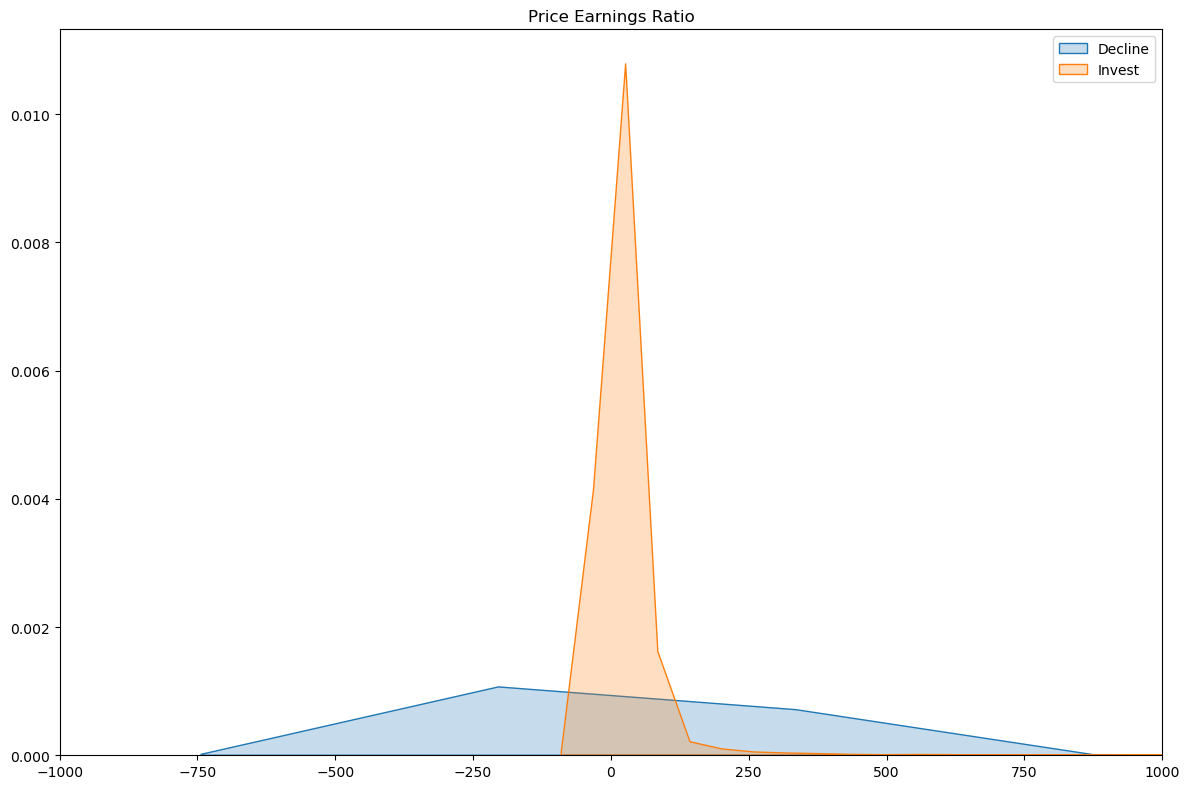

In [157]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Price Earnings Ratio'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Price Earnings Ratio'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-1000, 1000)

plt.legend()

plt.title('Price Earnings Ratio')

plt.tight_layout()

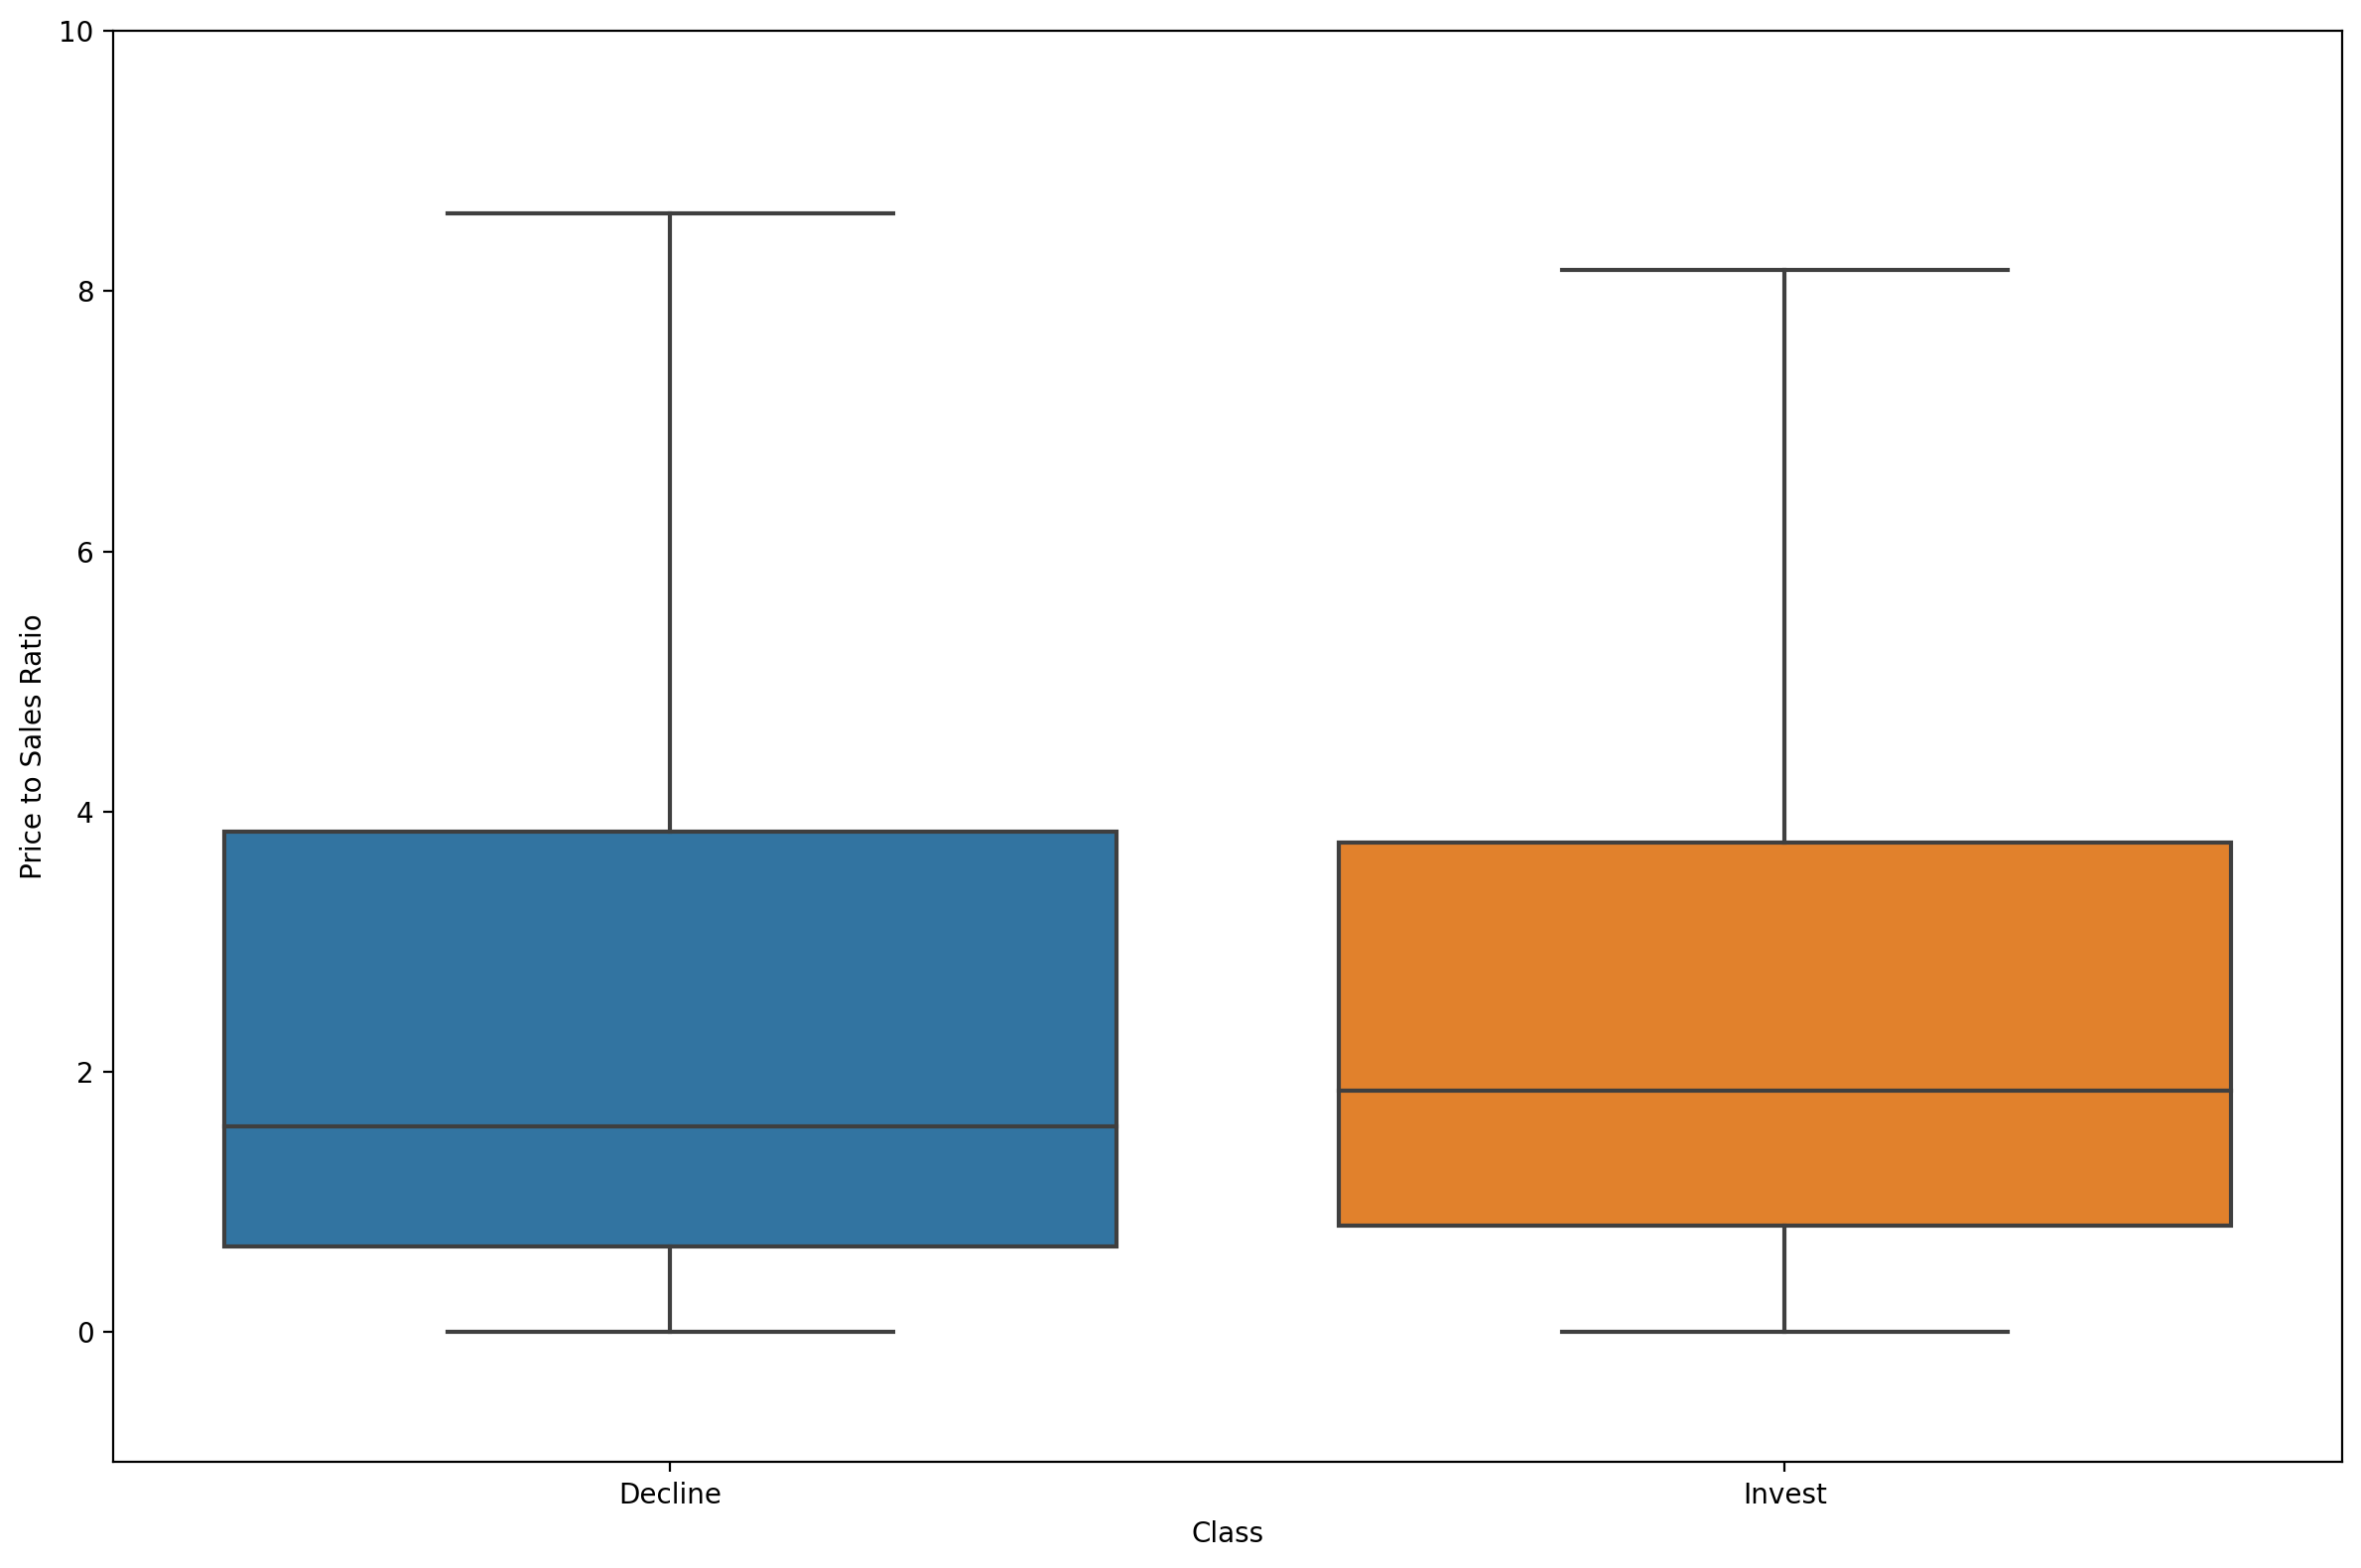

In [158]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Price to Sales Ratio', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-1, 10)

plt.tight_layout()

plt.show()

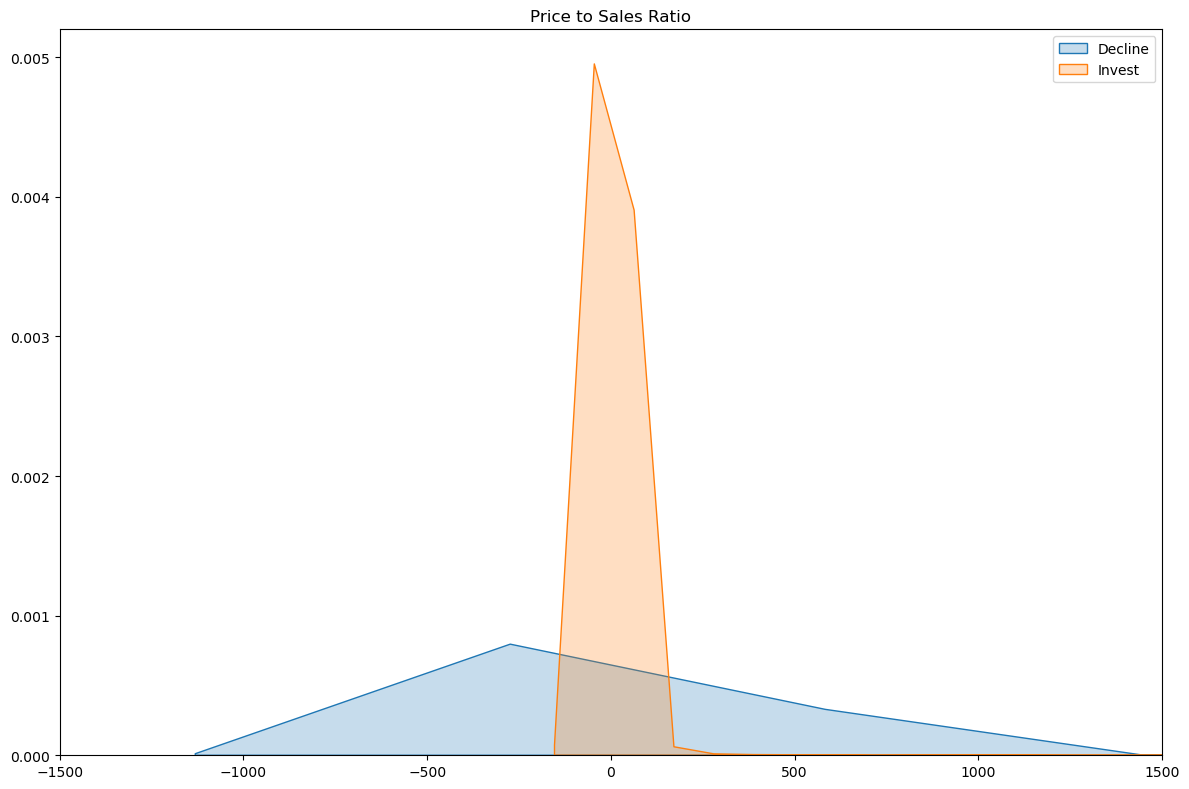

In [159]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Price to Sales Ratio'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Price to Sales Ratio'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-1500, 1500)

plt.legend()

plt.title('Price to Sales Ratio')

plt.tight_layout()

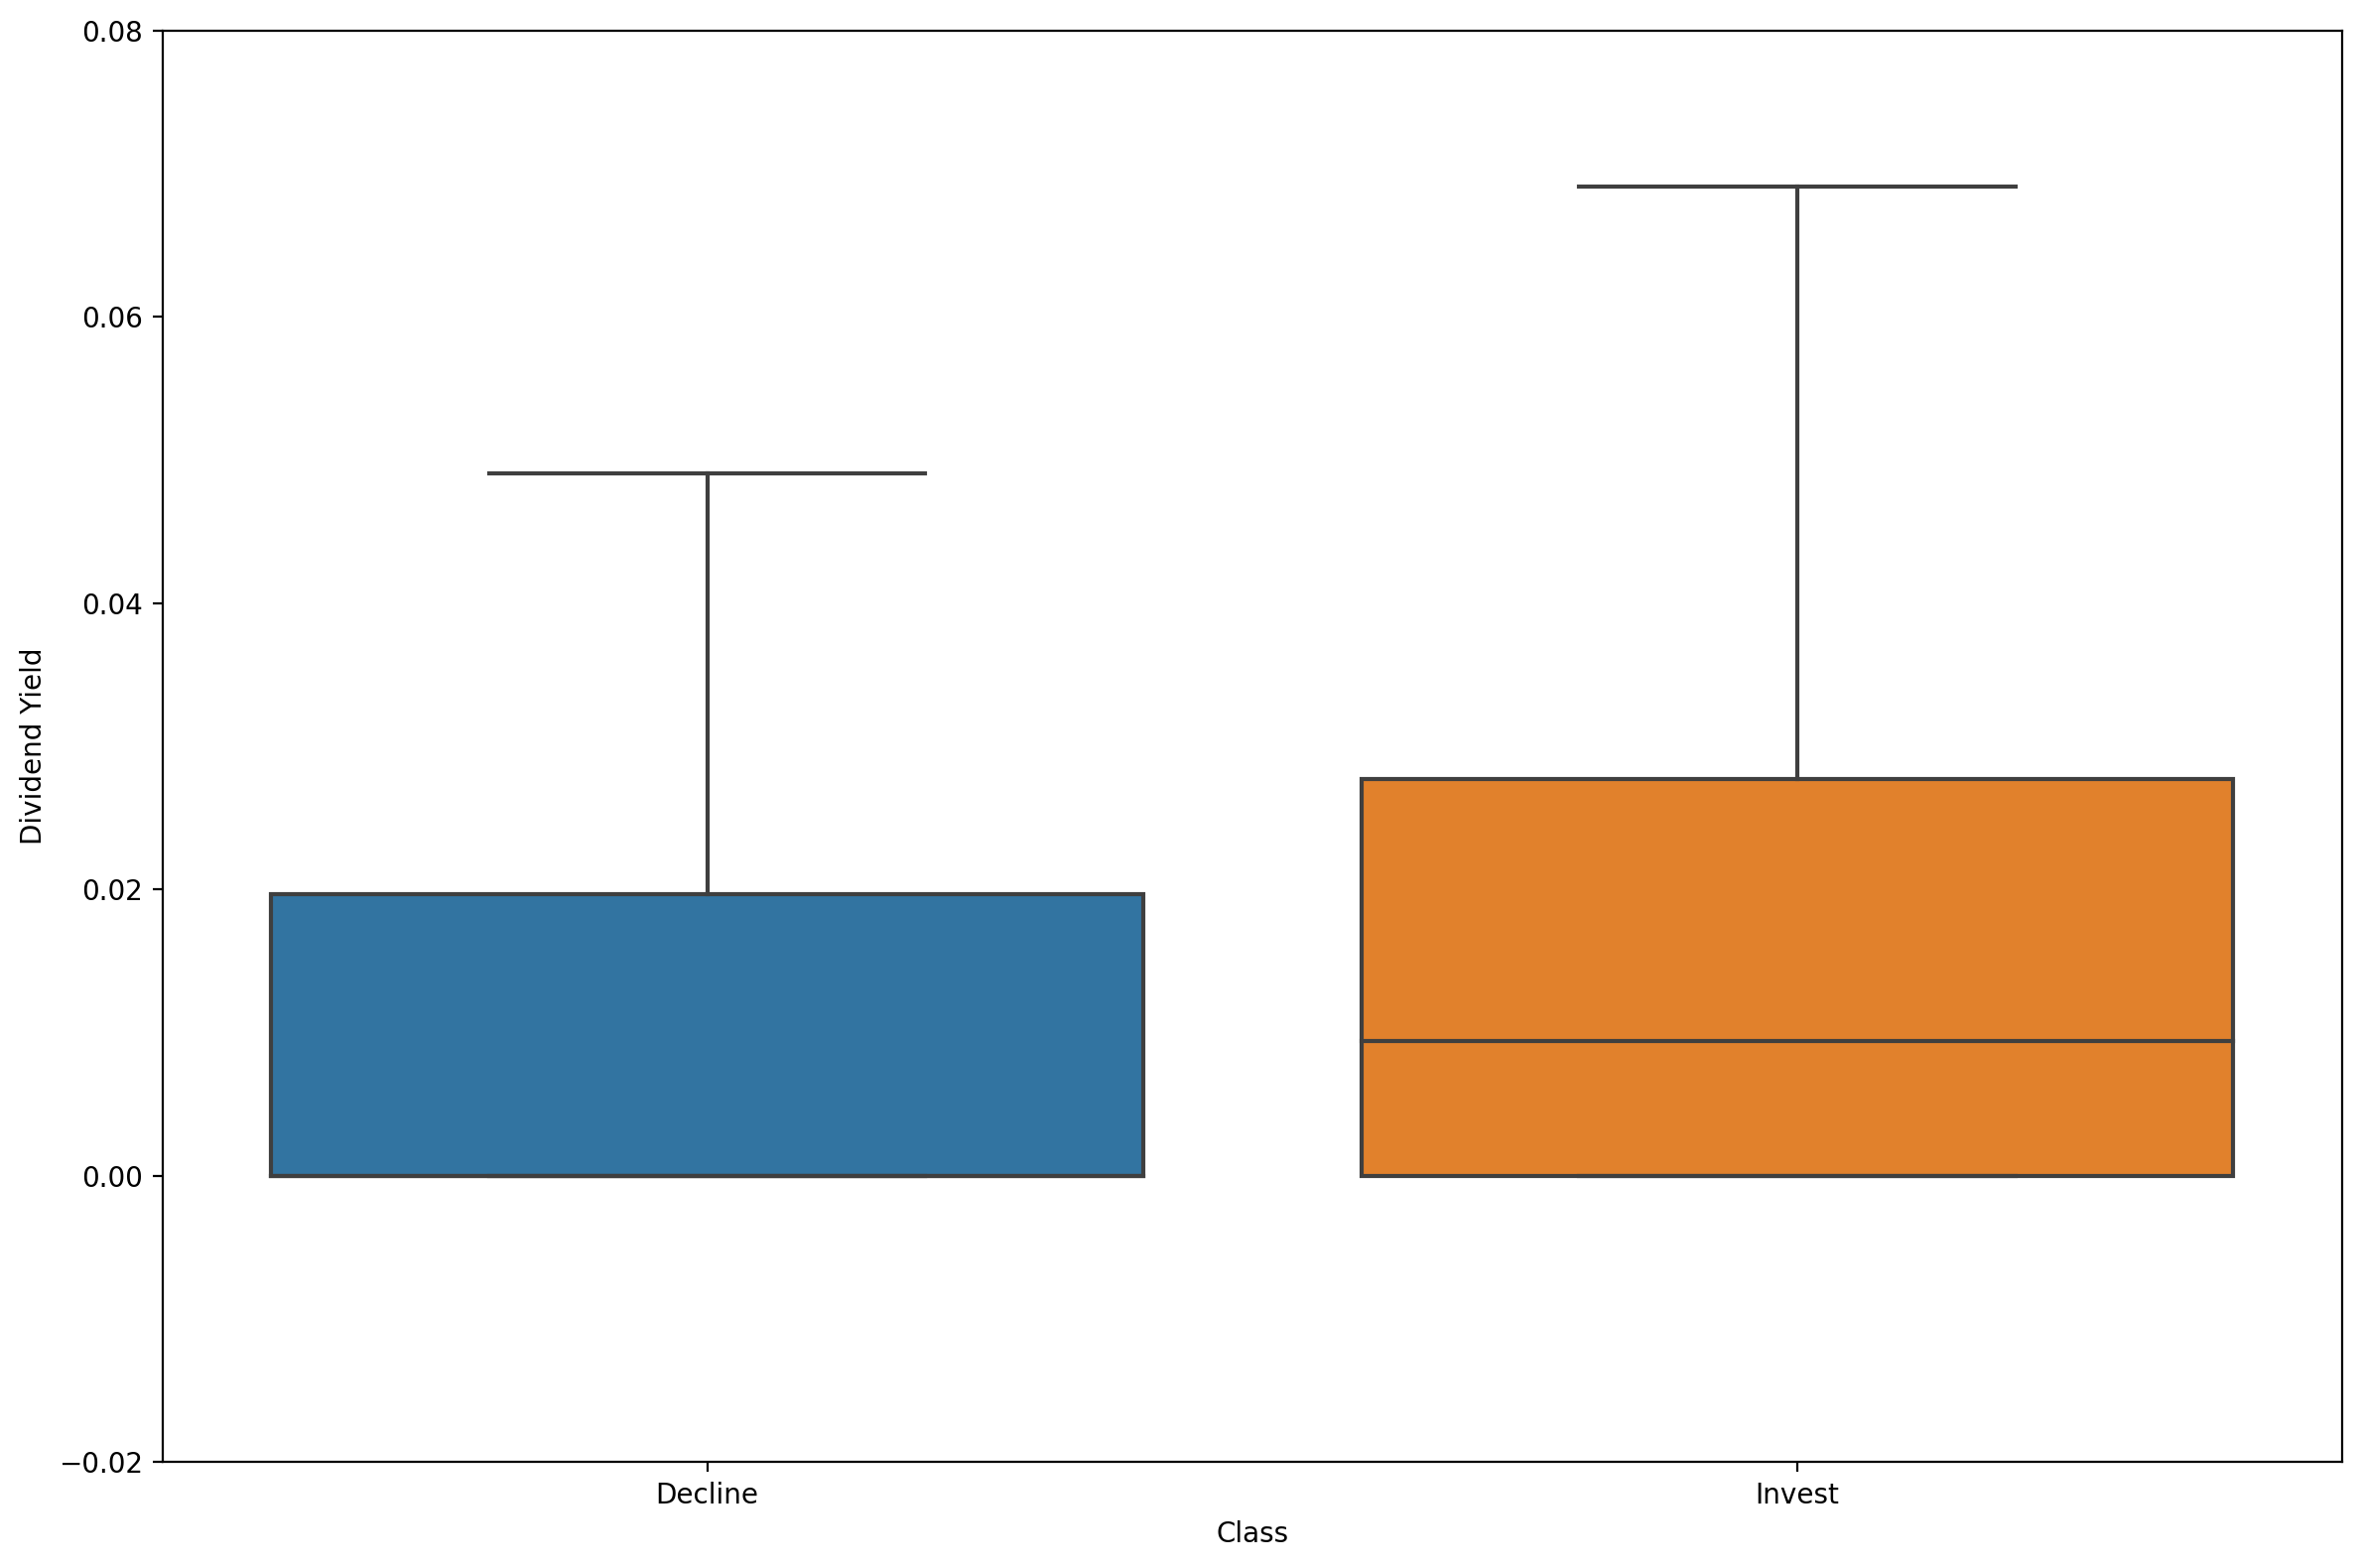

In [160]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Dividend Yield', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-0.02, 0.08)

plt.tight_layout()

plt.show()

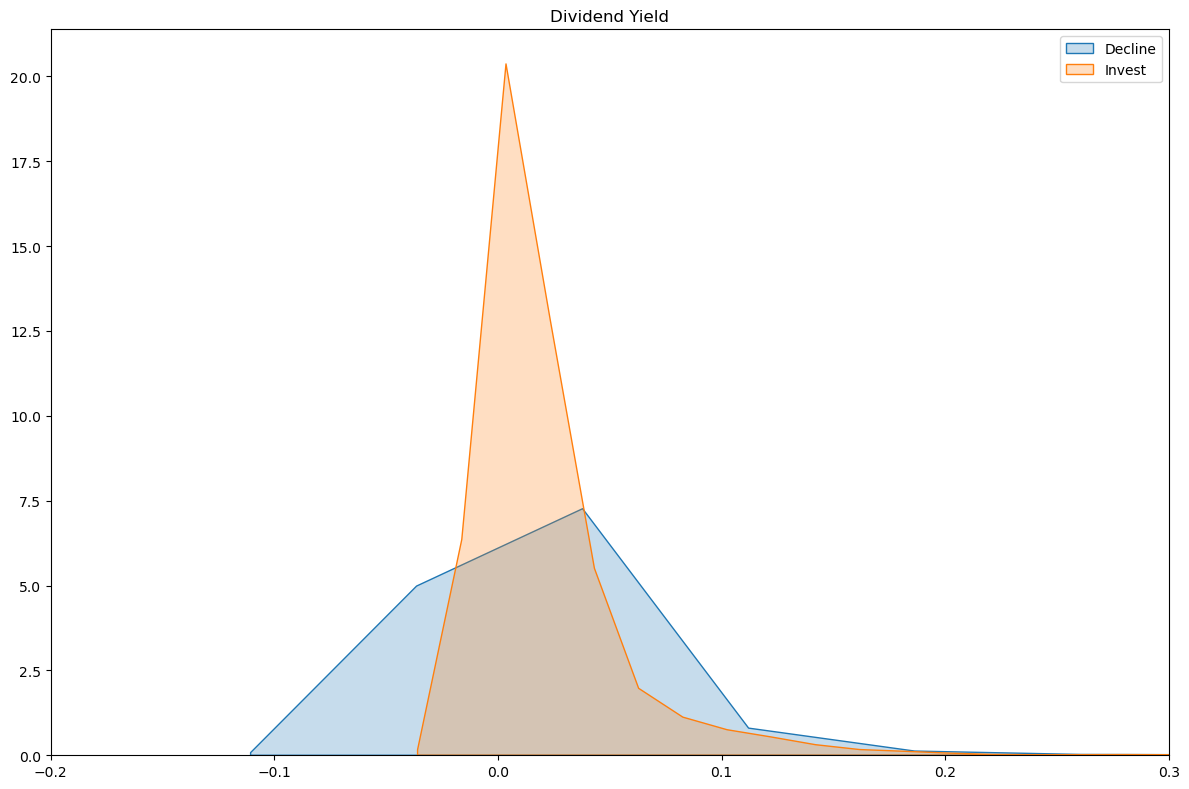

In [161]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Dividend Yield'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Dividend Yield'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-0.2, 0.3)

plt.legend()

plt.title('Dividend Yield')

plt.tight_layout()

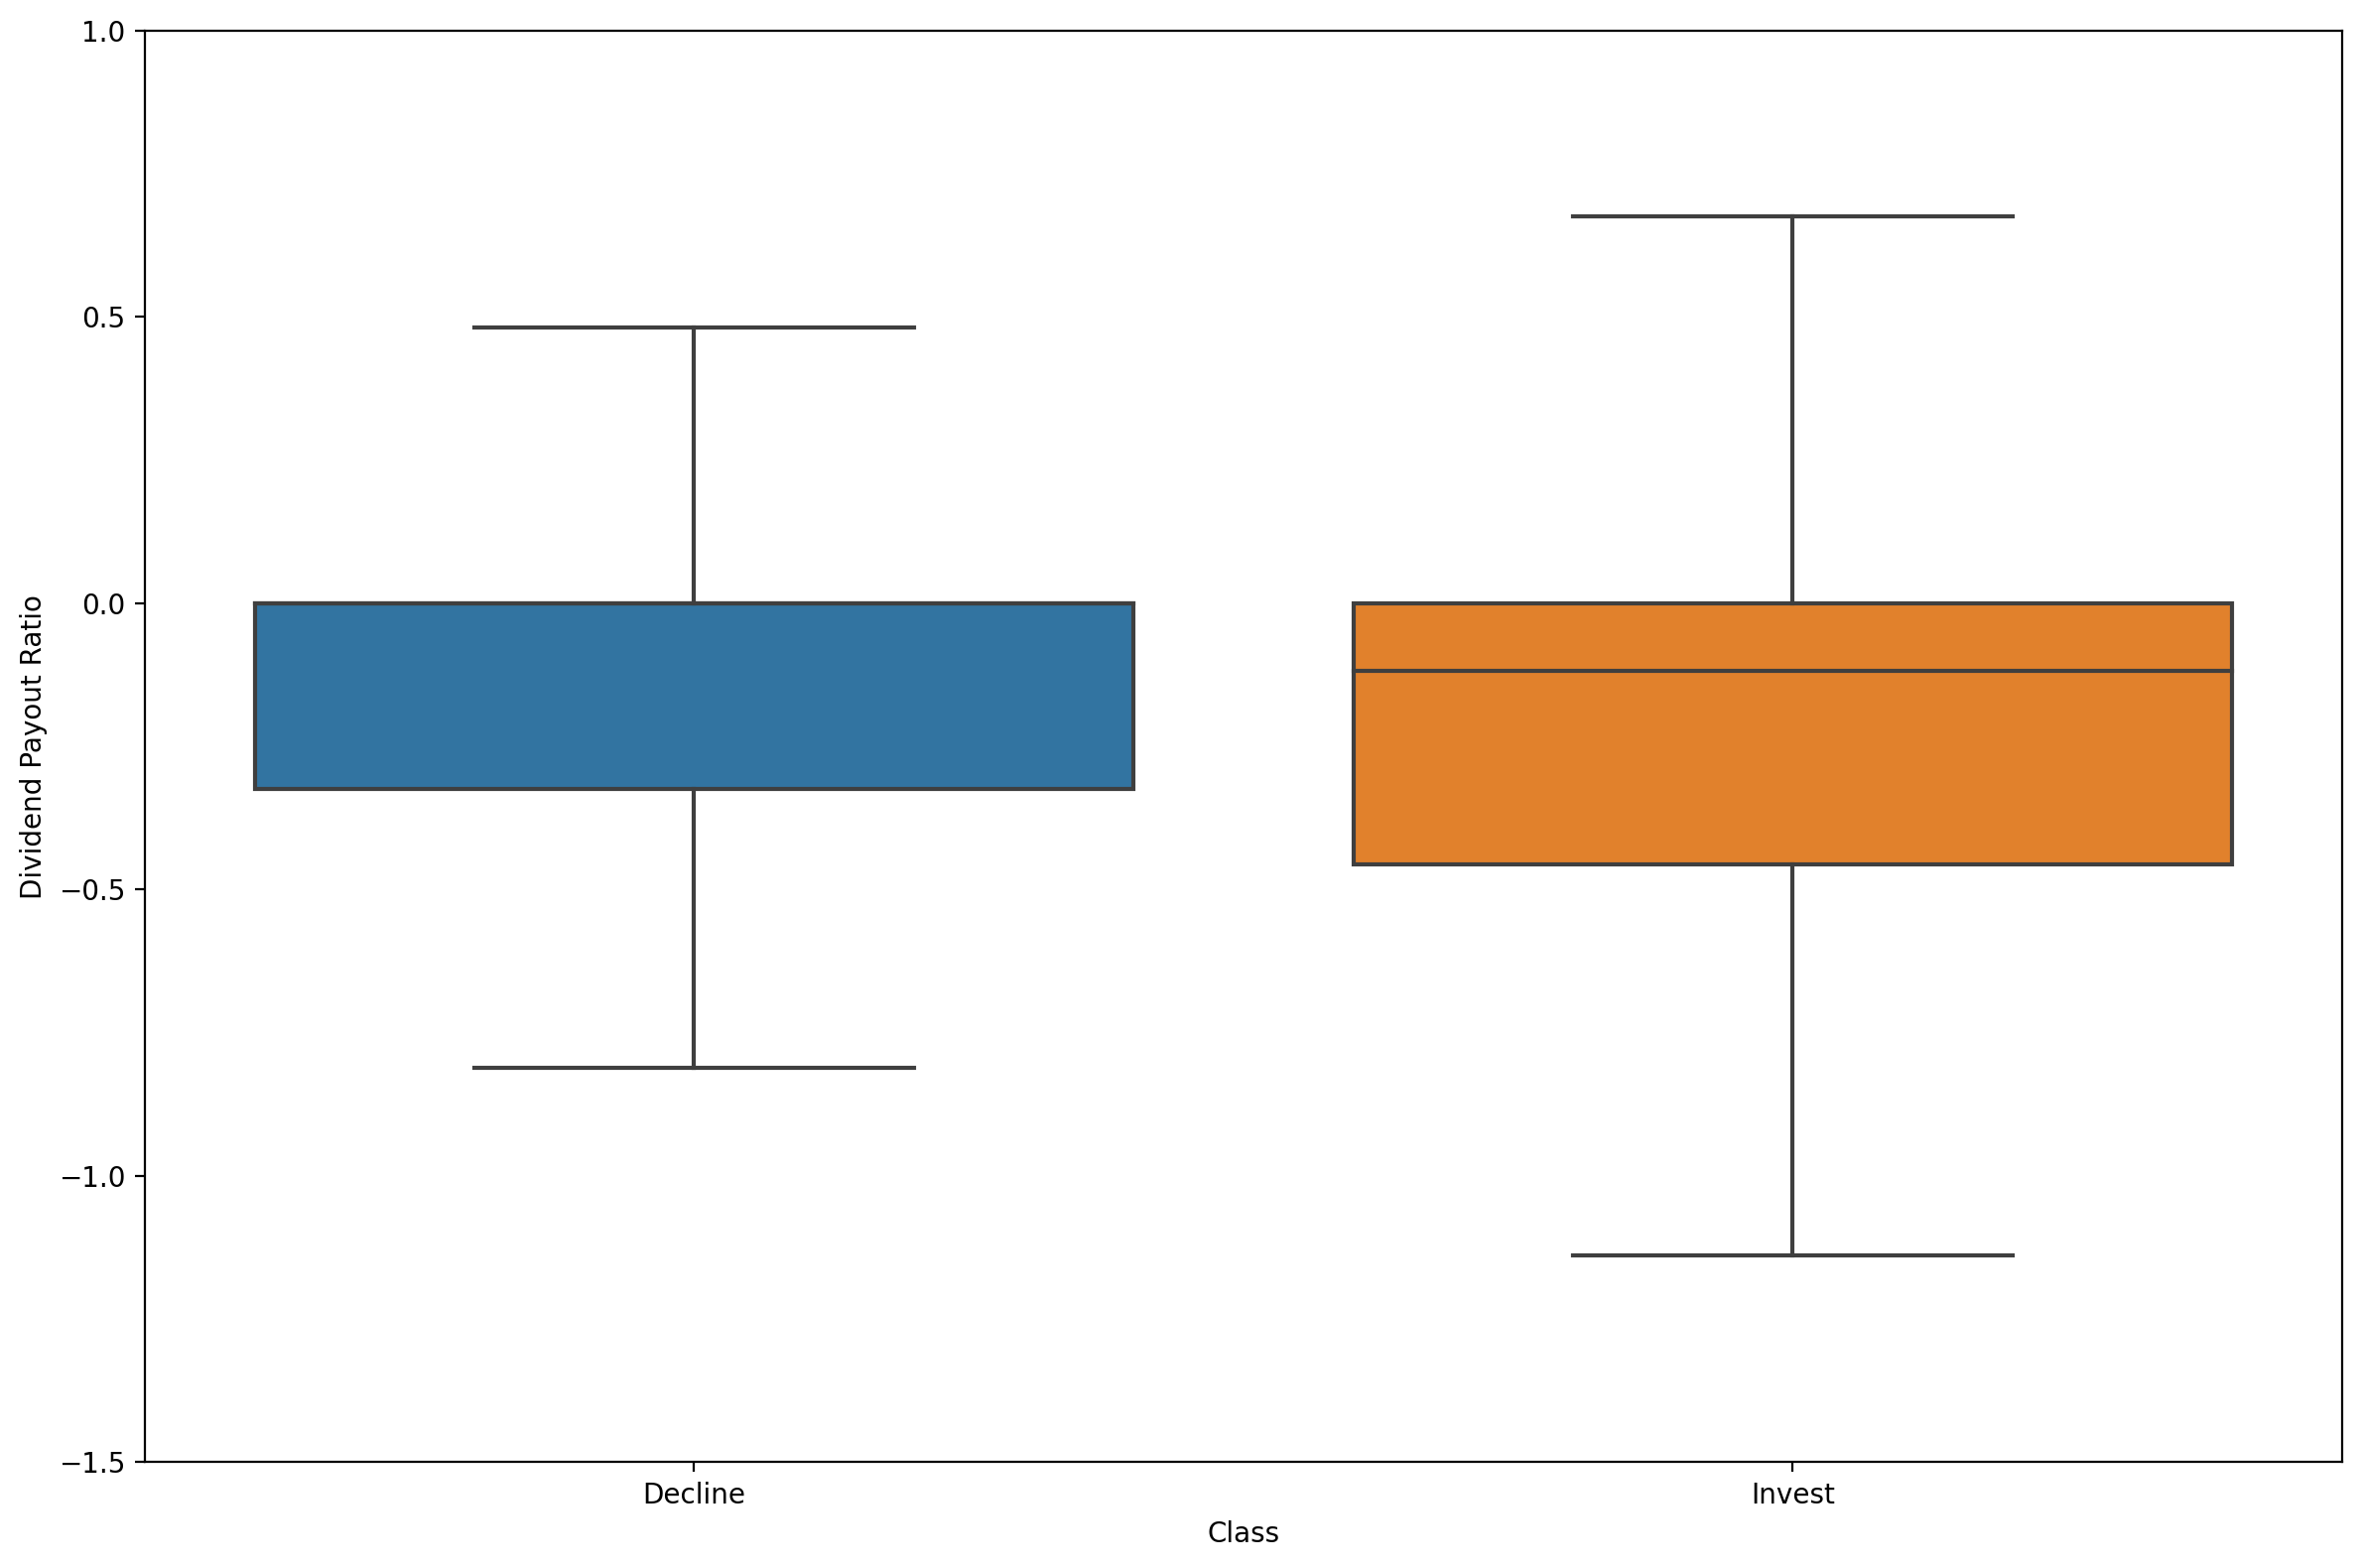

In [162]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Dividend Payout Ratio', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-1.5, 1)

plt.tight_layout()

plt.show()

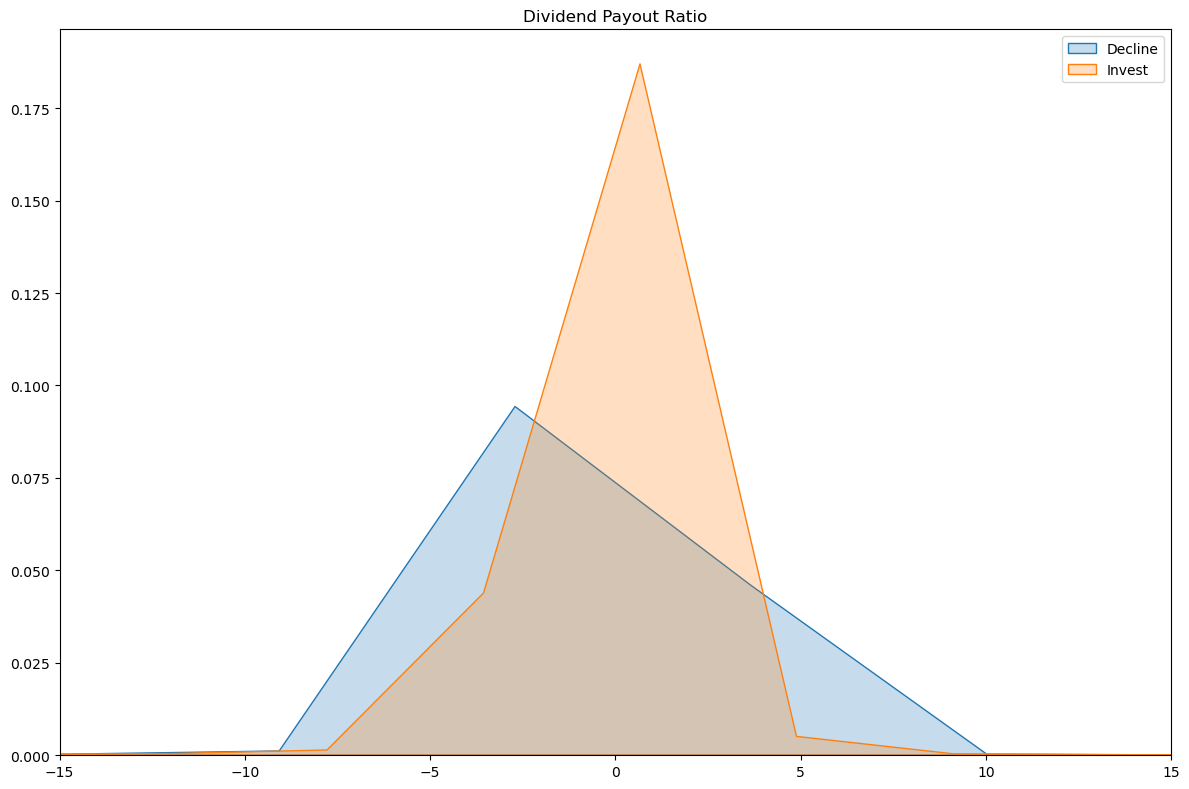

In [163]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Dividend Payout Ratio'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Dividend Payout Ratio'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-15, 15)

plt.legend()

plt.title('Dividend Payout Ratio')

plt.tight_layout()

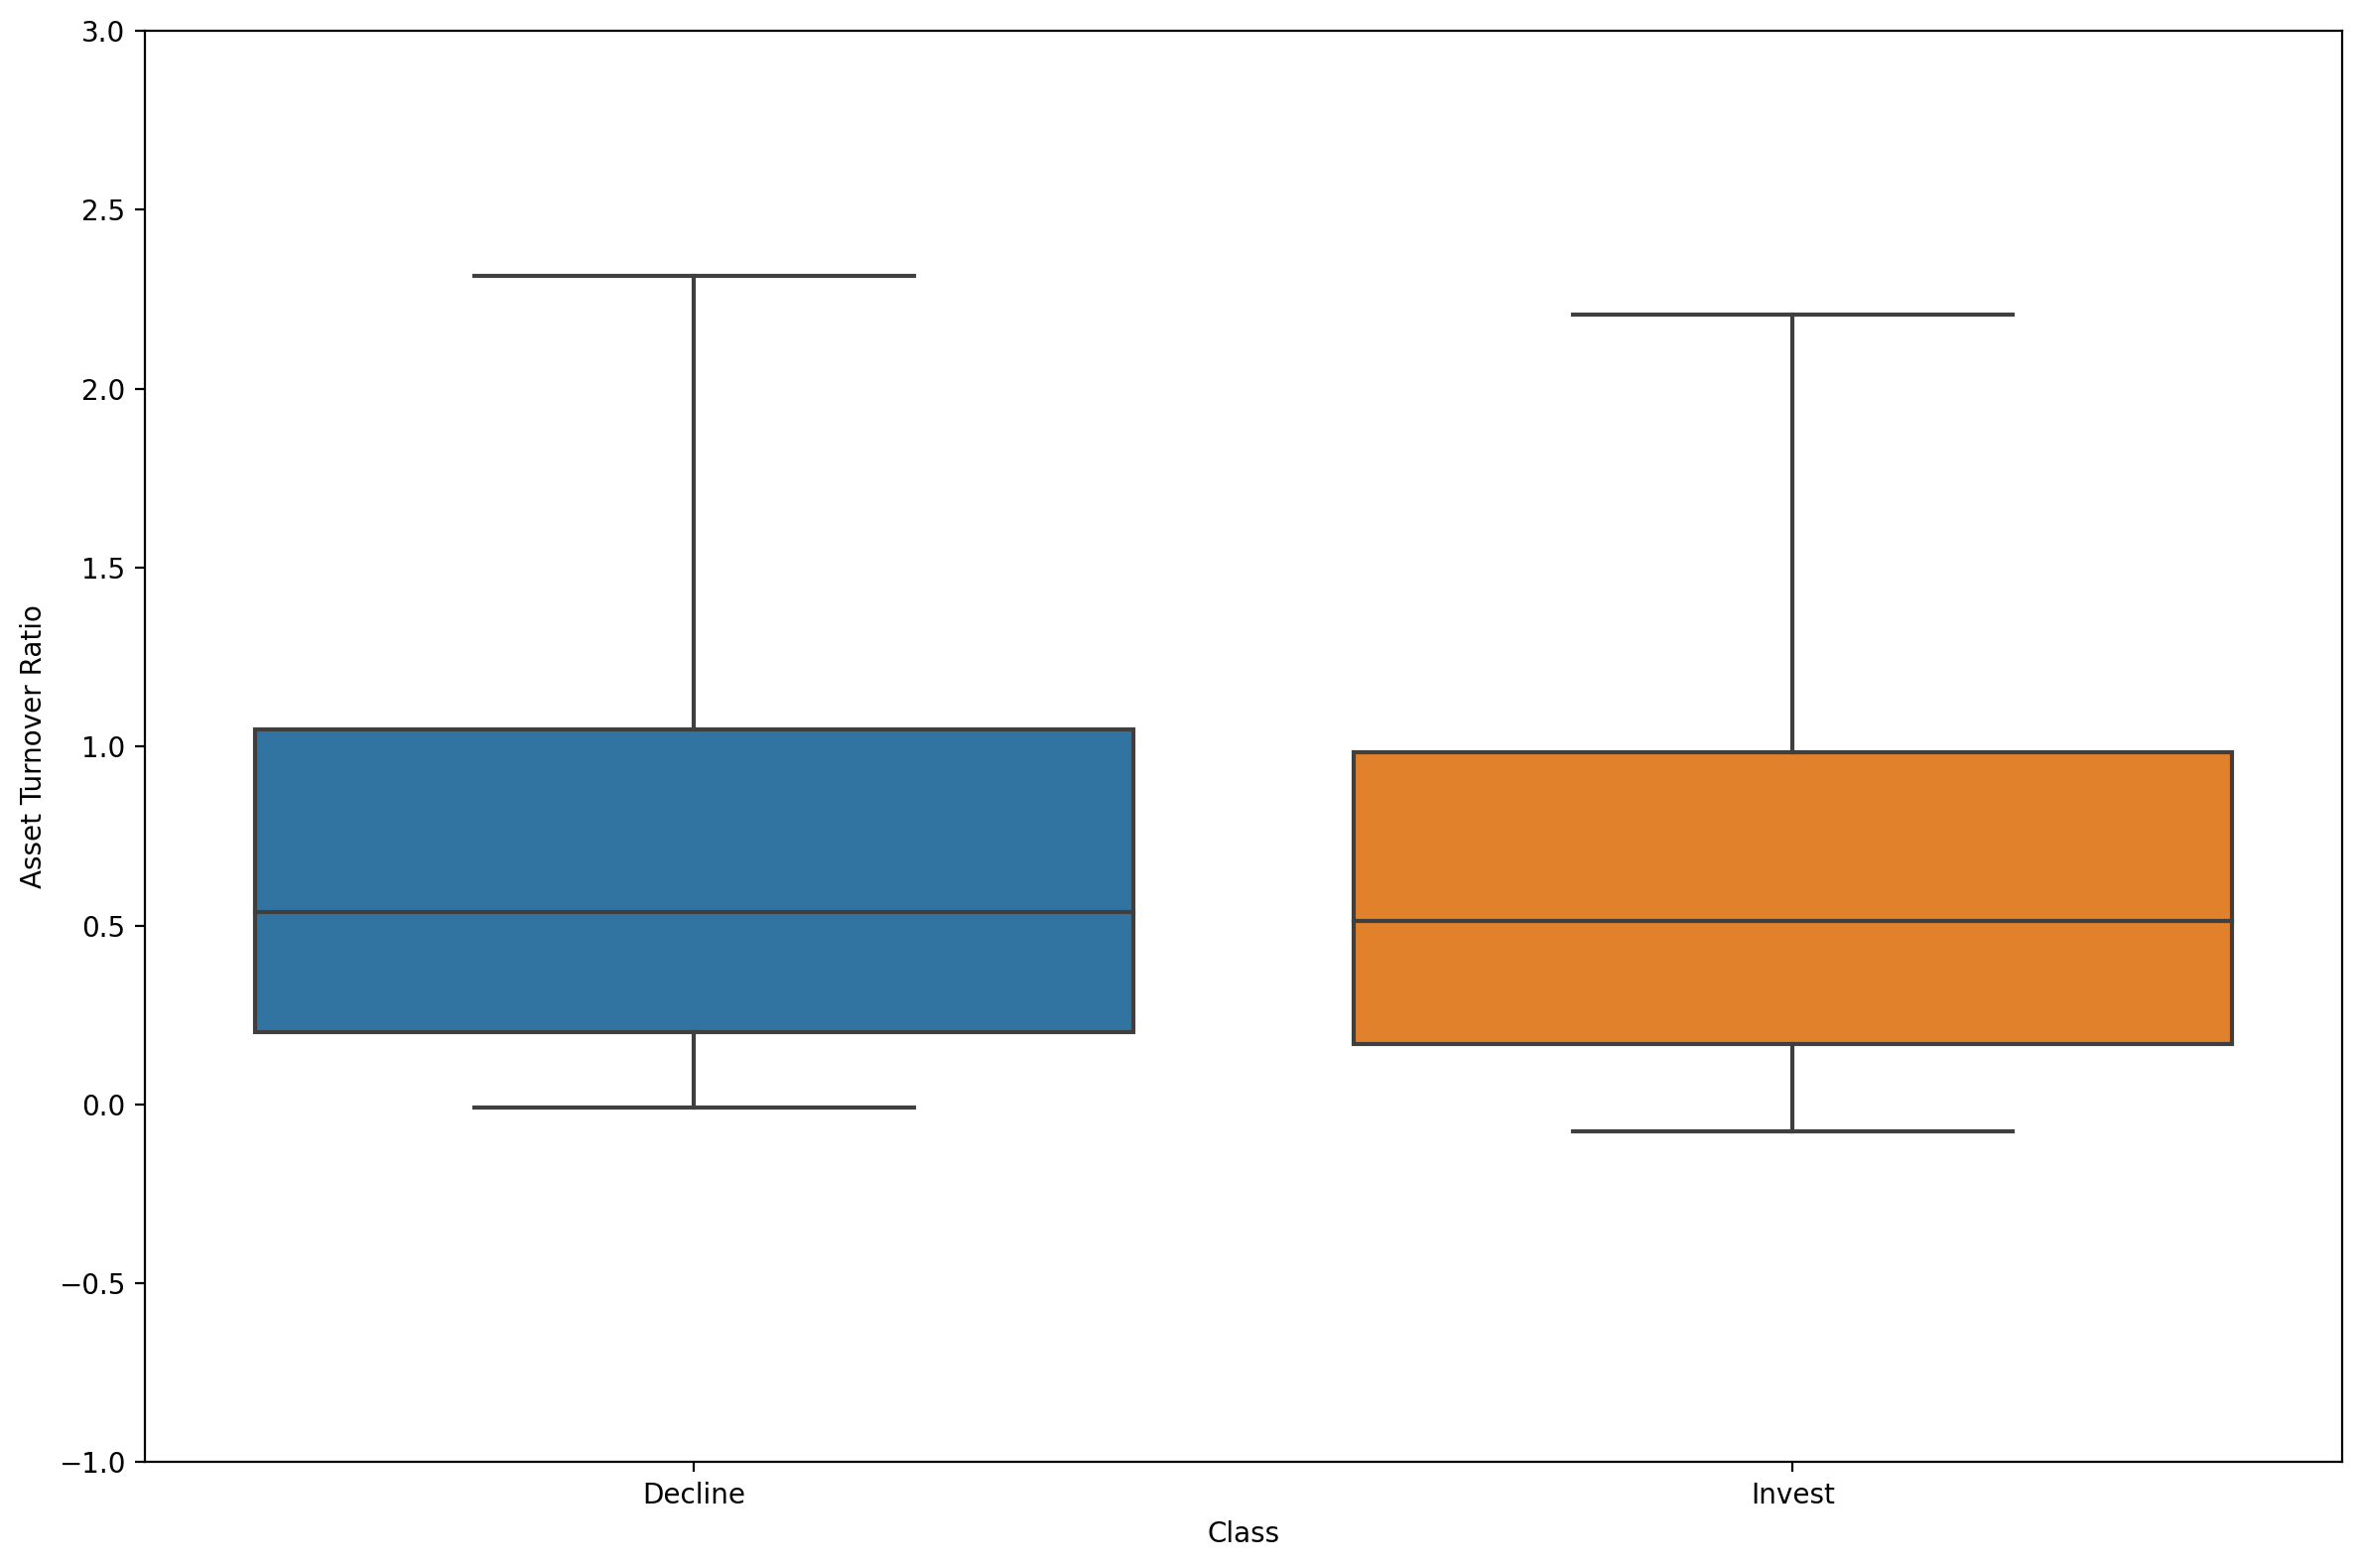

In [164]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Asset Turnover Ratio', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-1, 3)

plt.tight_layout()

plt.show()

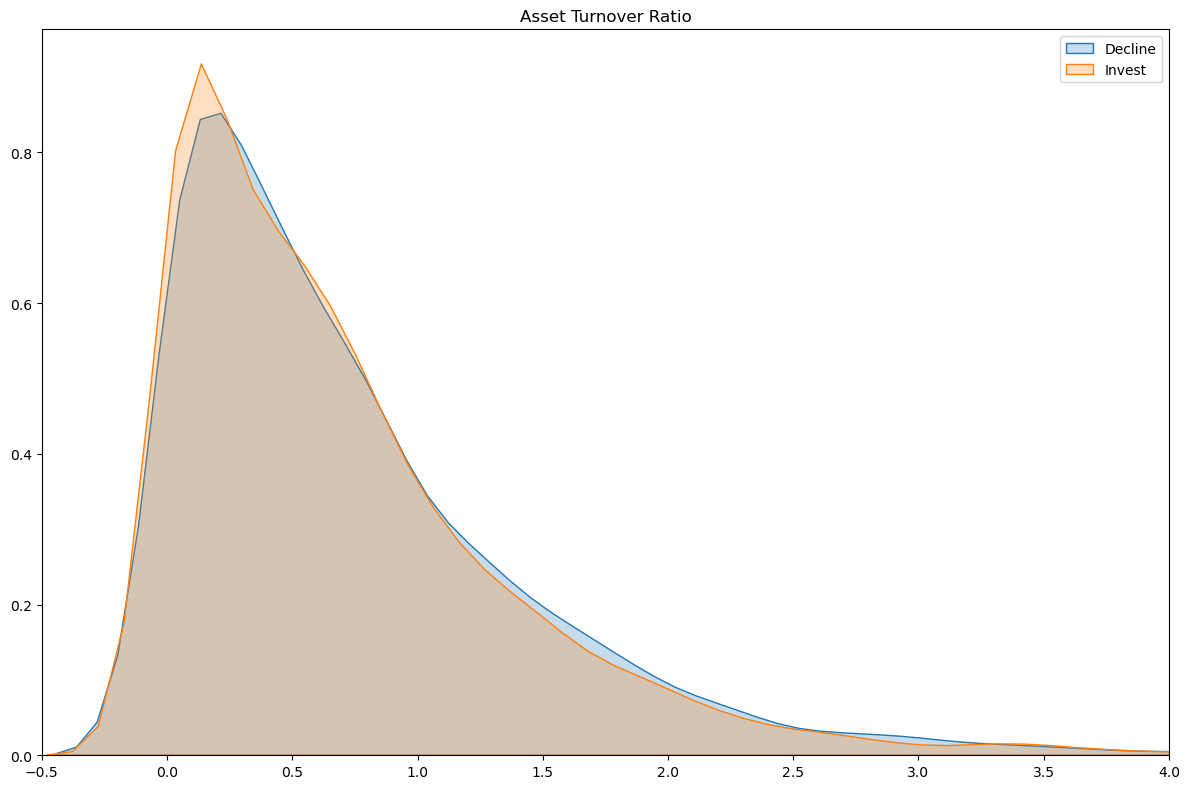

In [165]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Asset Turnover Ratio'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Asset Turnover Ratio'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-0.5, 4)

plt.legend()

plt.title('Asset Turnover Ratio')

plt.tight_layout()

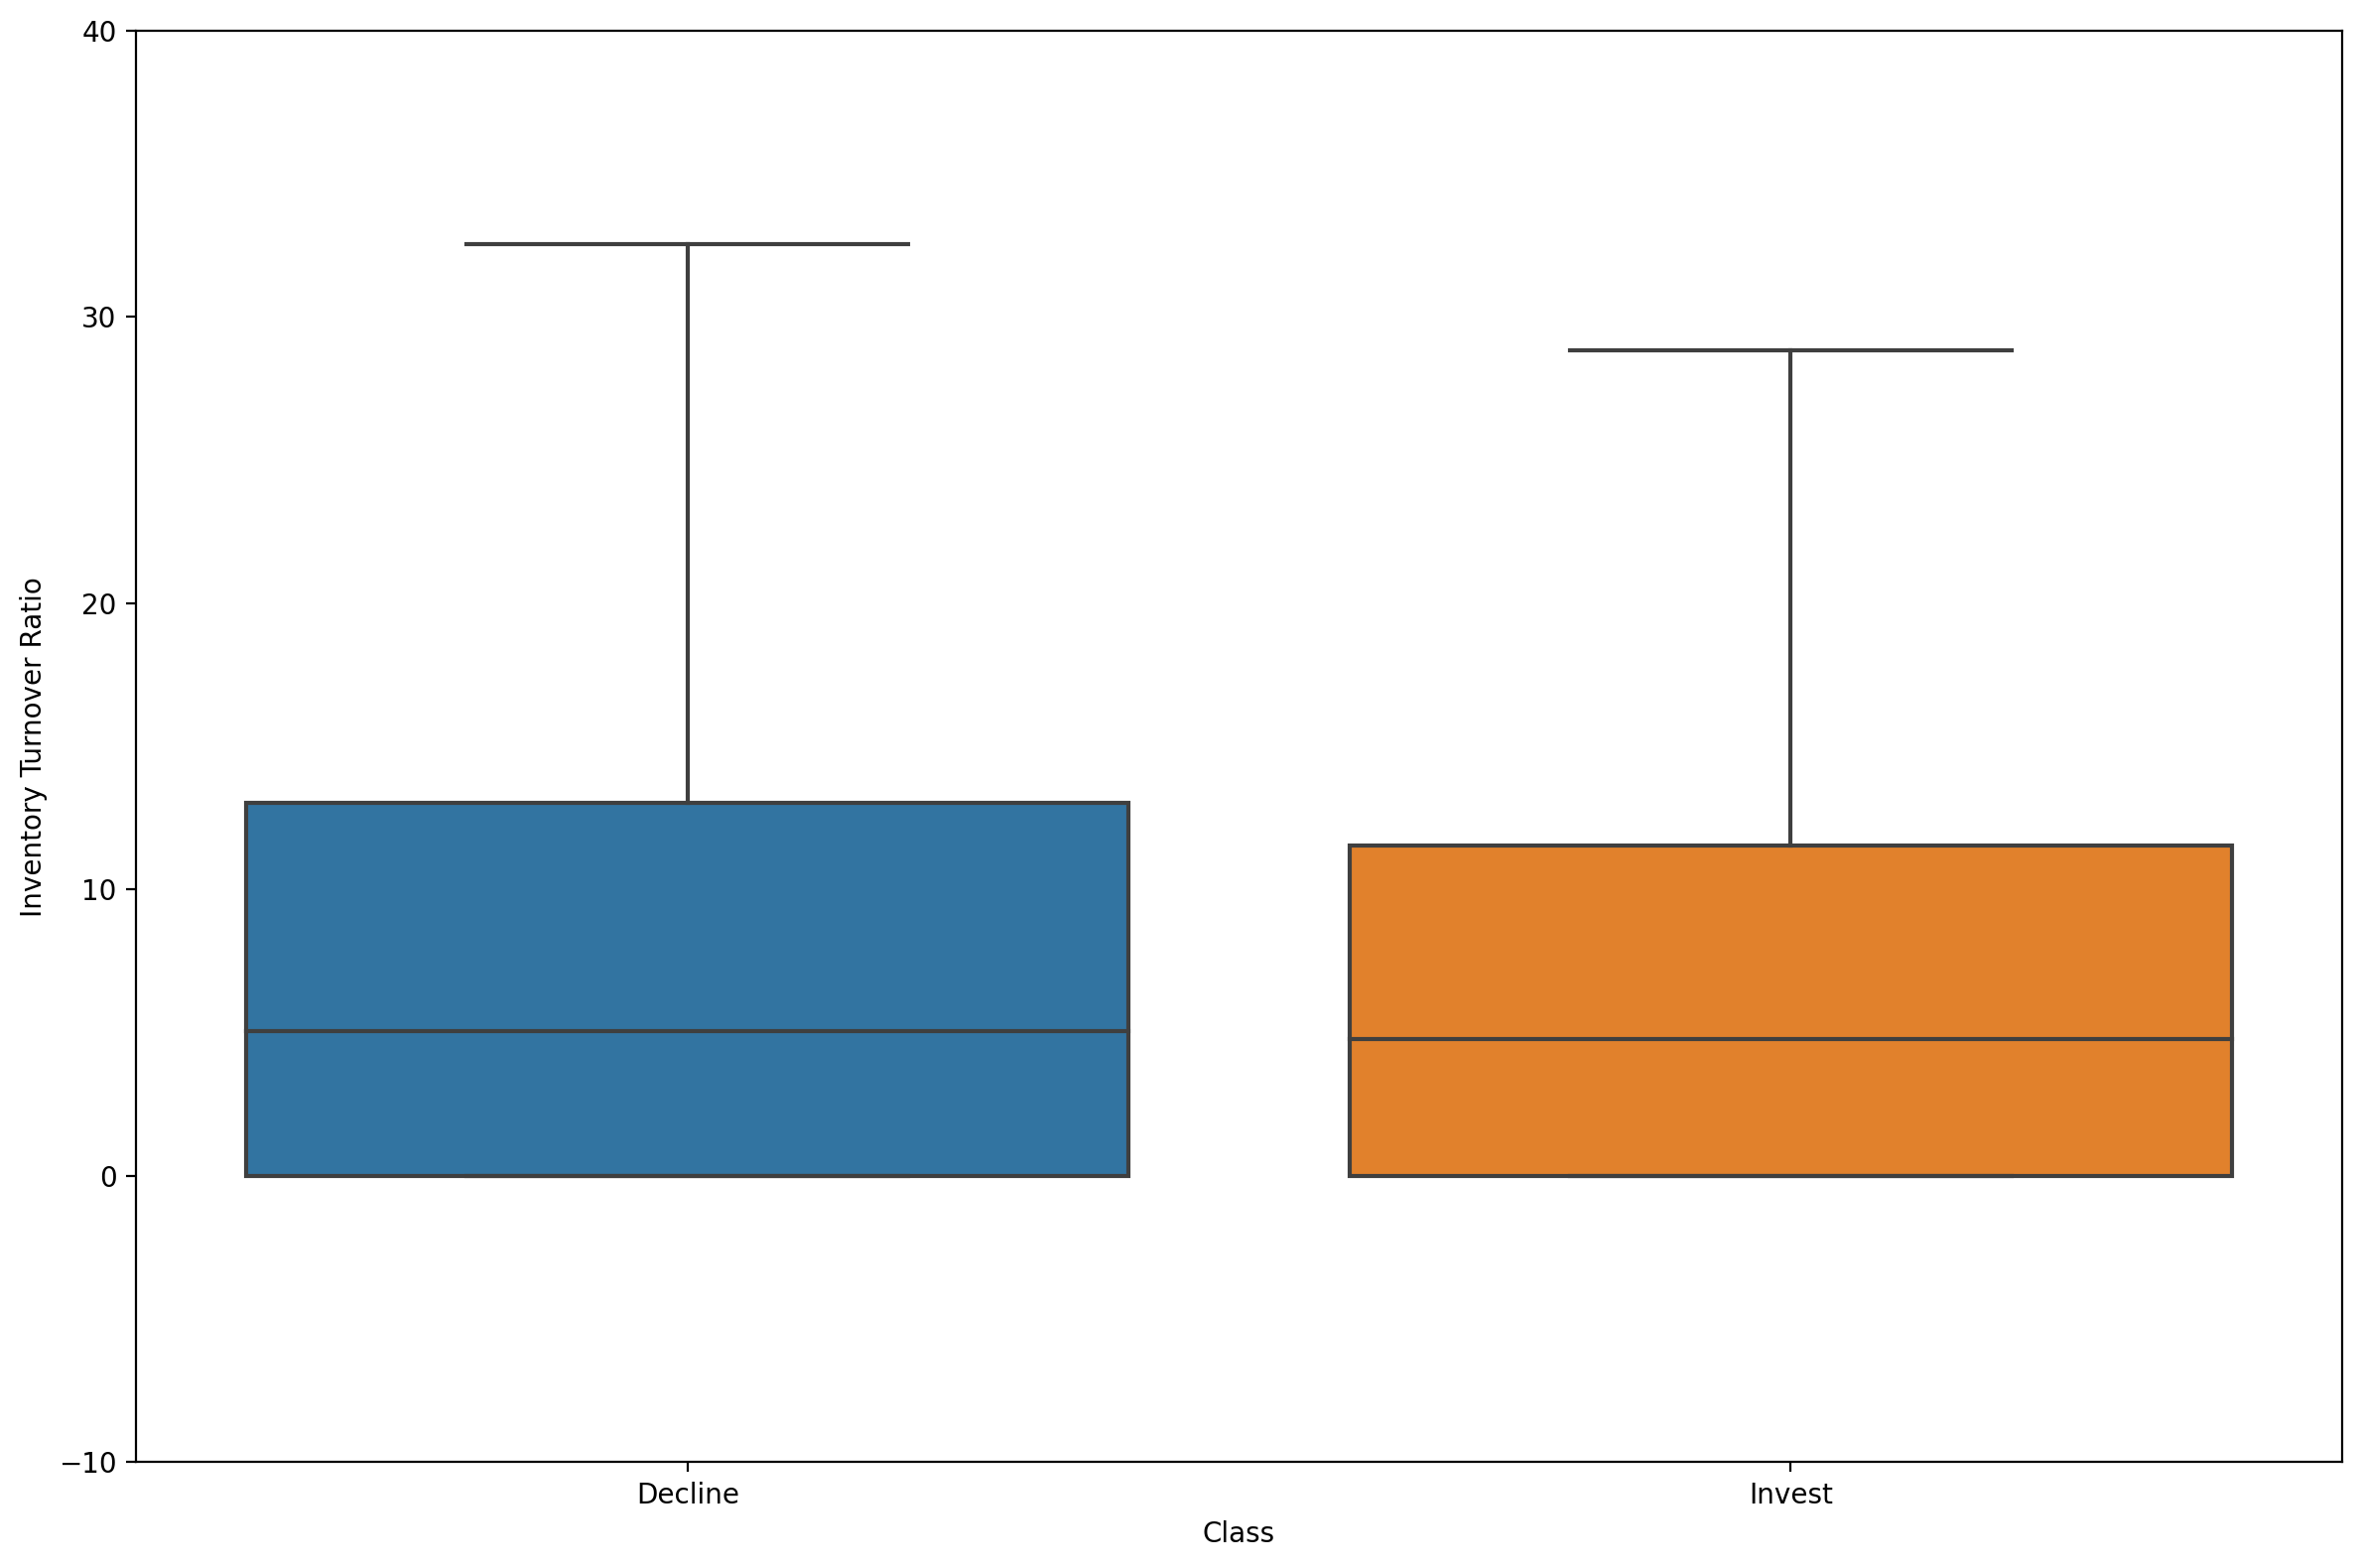

In [166]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Inventory Turnover Ratio', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-10, 40)

plt.tight_layout()

plt.show()

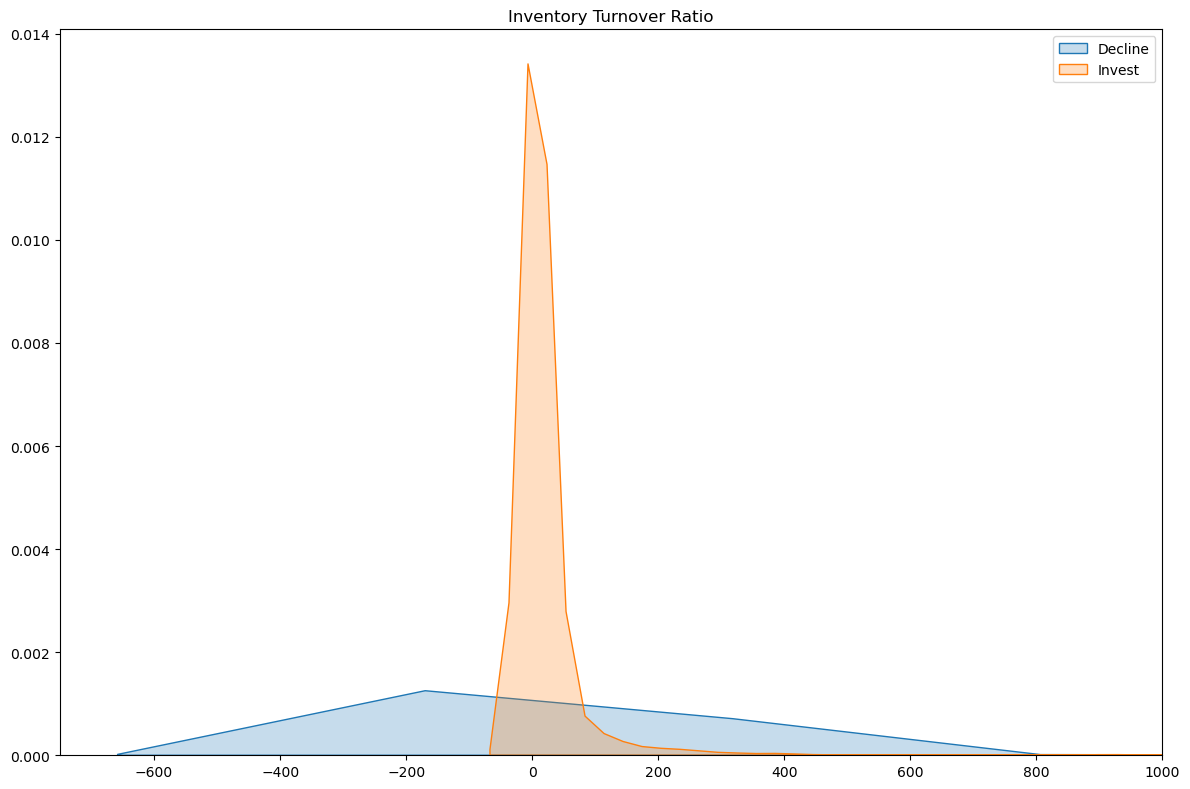

In [167]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Inventory Turnover Ratio'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Inventory Turnover Ratio'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-750, 1000)

plt.legend()

plt.title('Inventory Turnover Ratio')

plt.tight_layout()

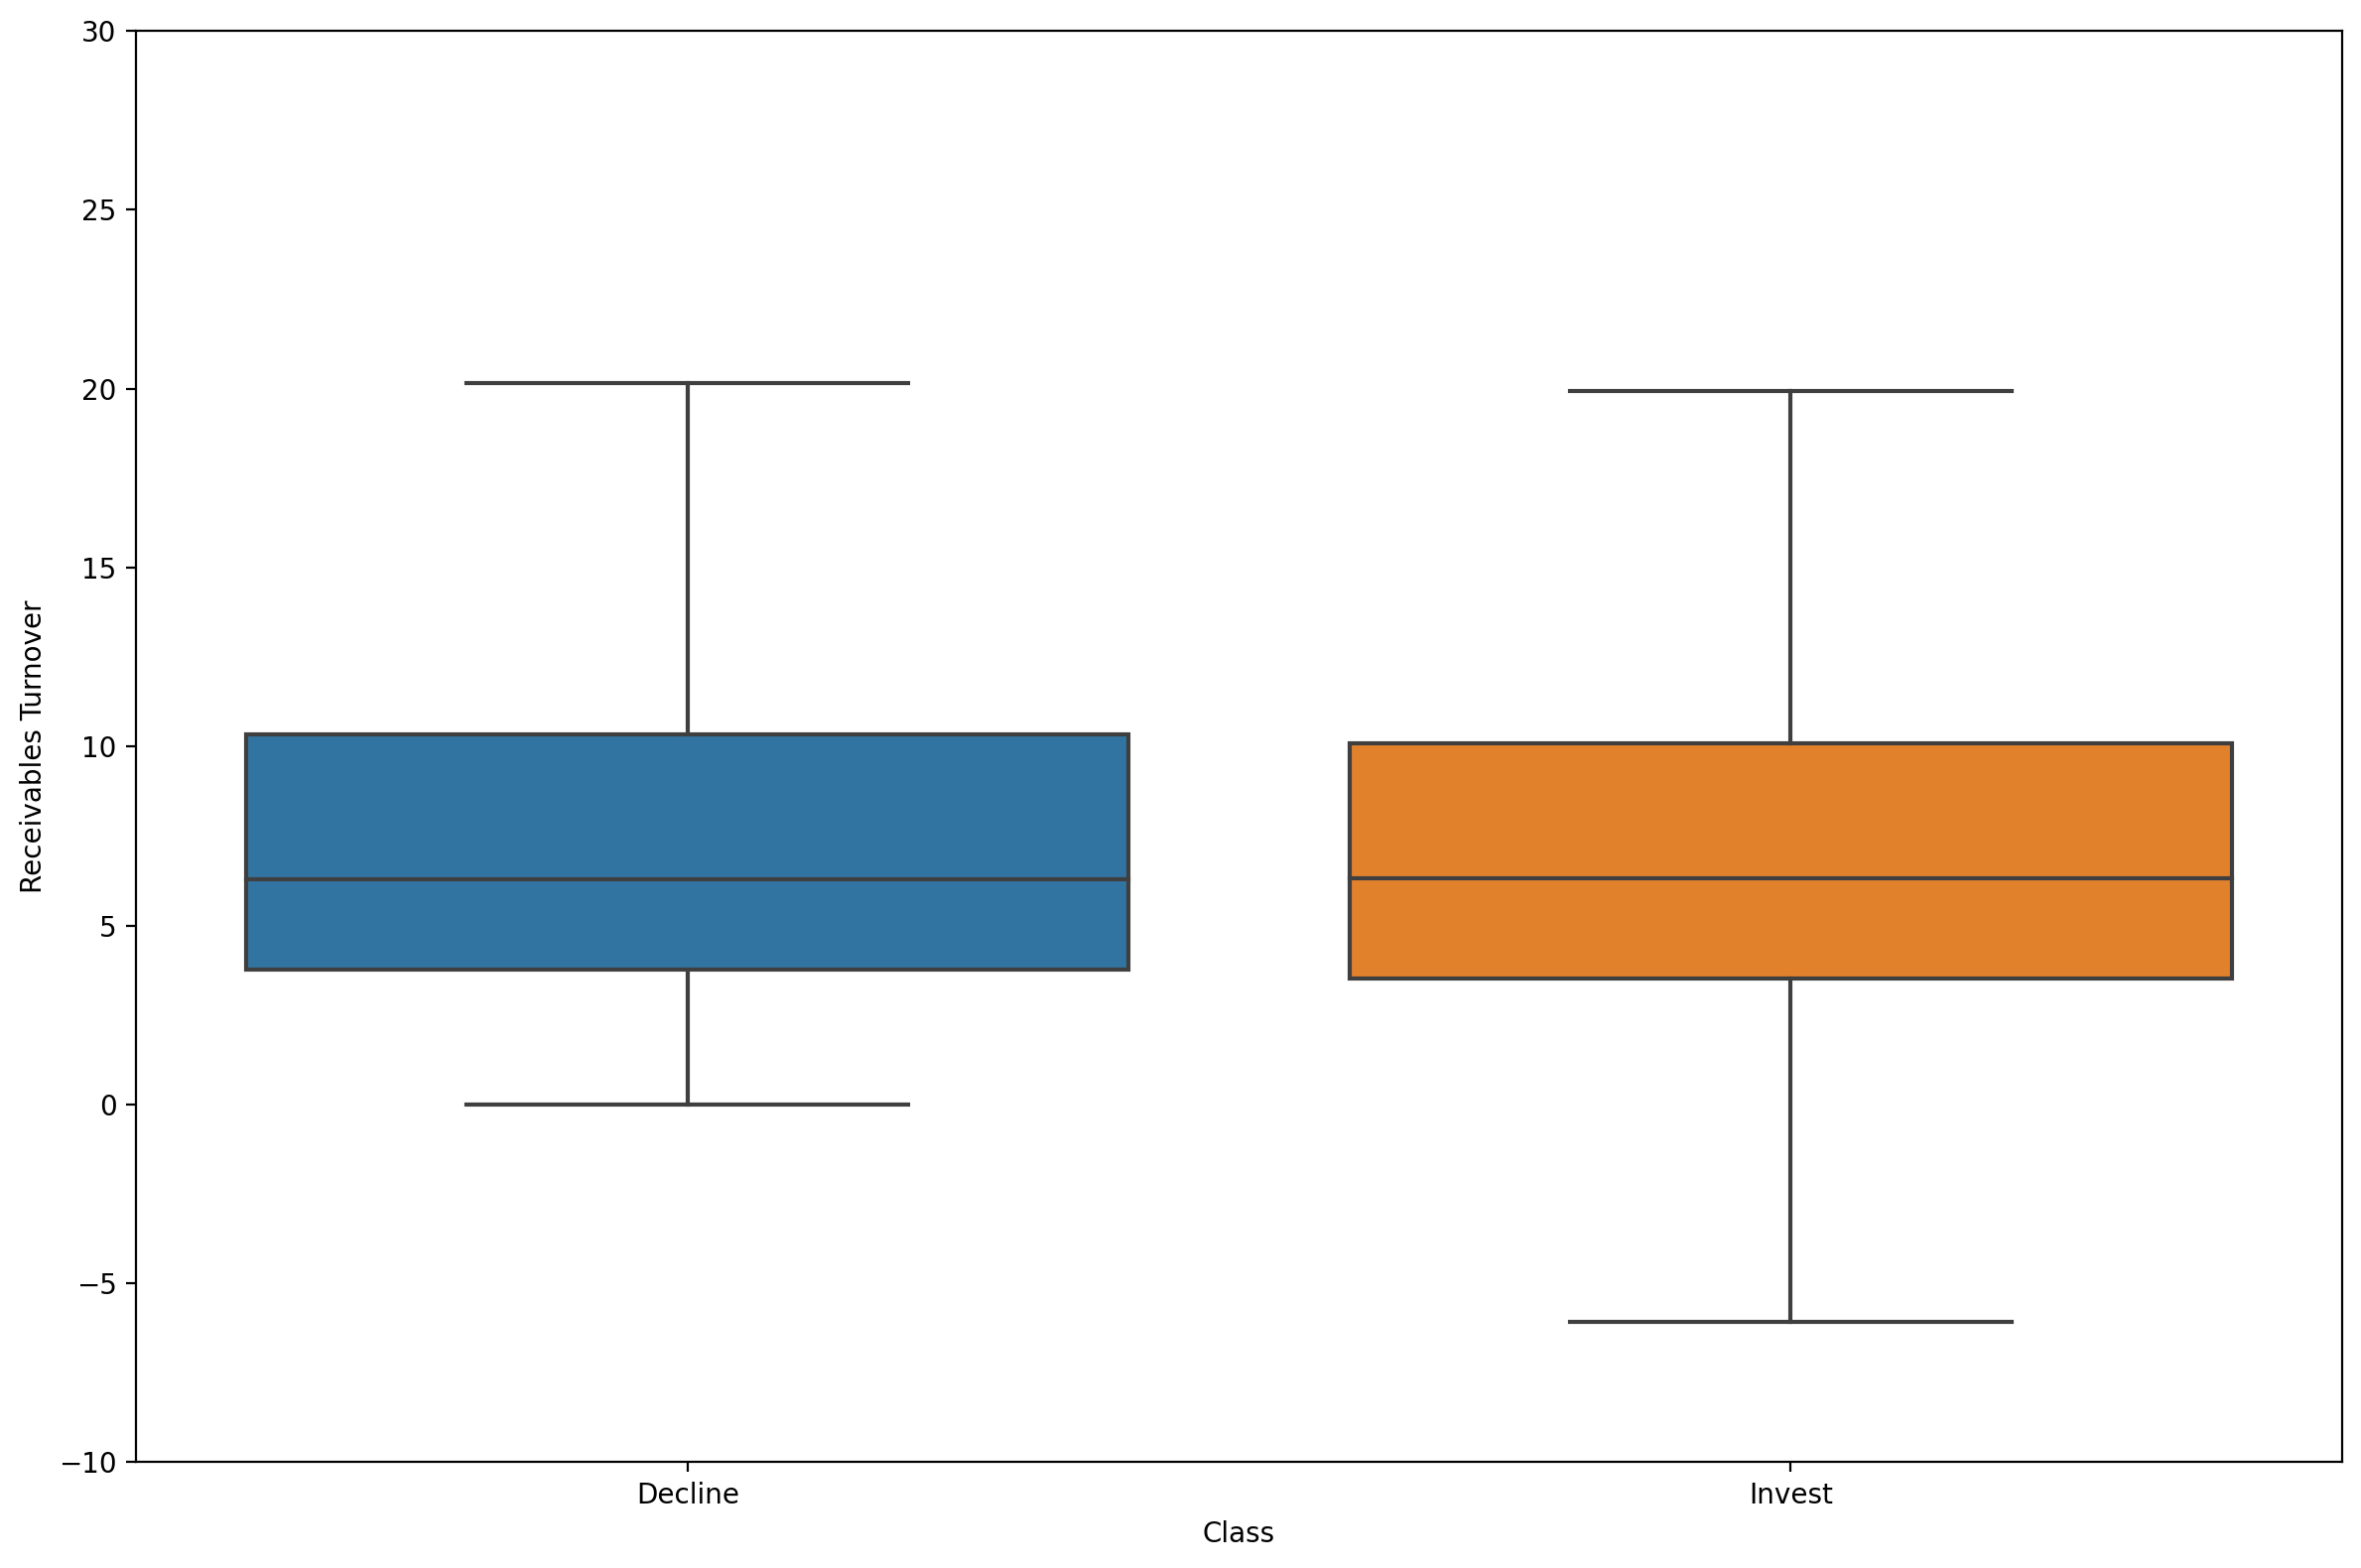

In [168]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'Receivables Turnover', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-10, 30)

plt.tight_layout()

plt.show()

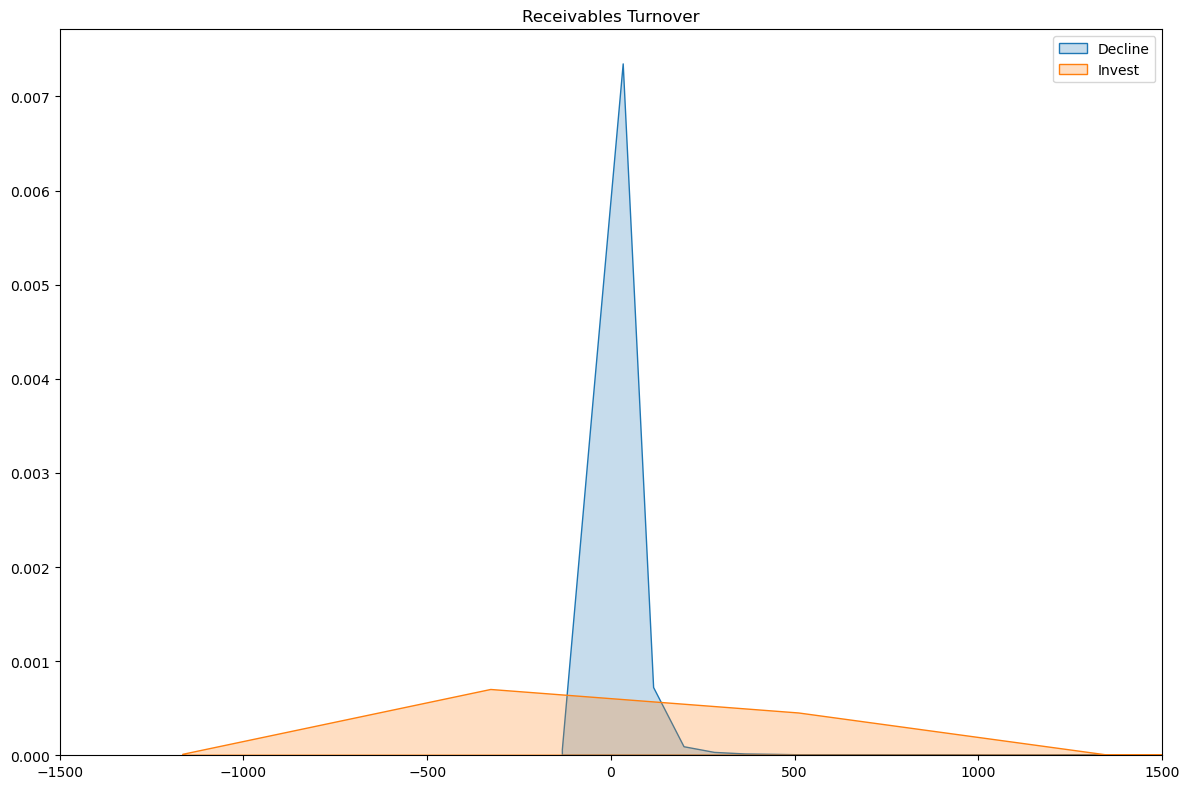

In [169]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Receivables Turnover'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['Receivables Turnover'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-1500, 1500)

plt.legend()

plt.title('Receivables Turnover')

plt.tight_layout()

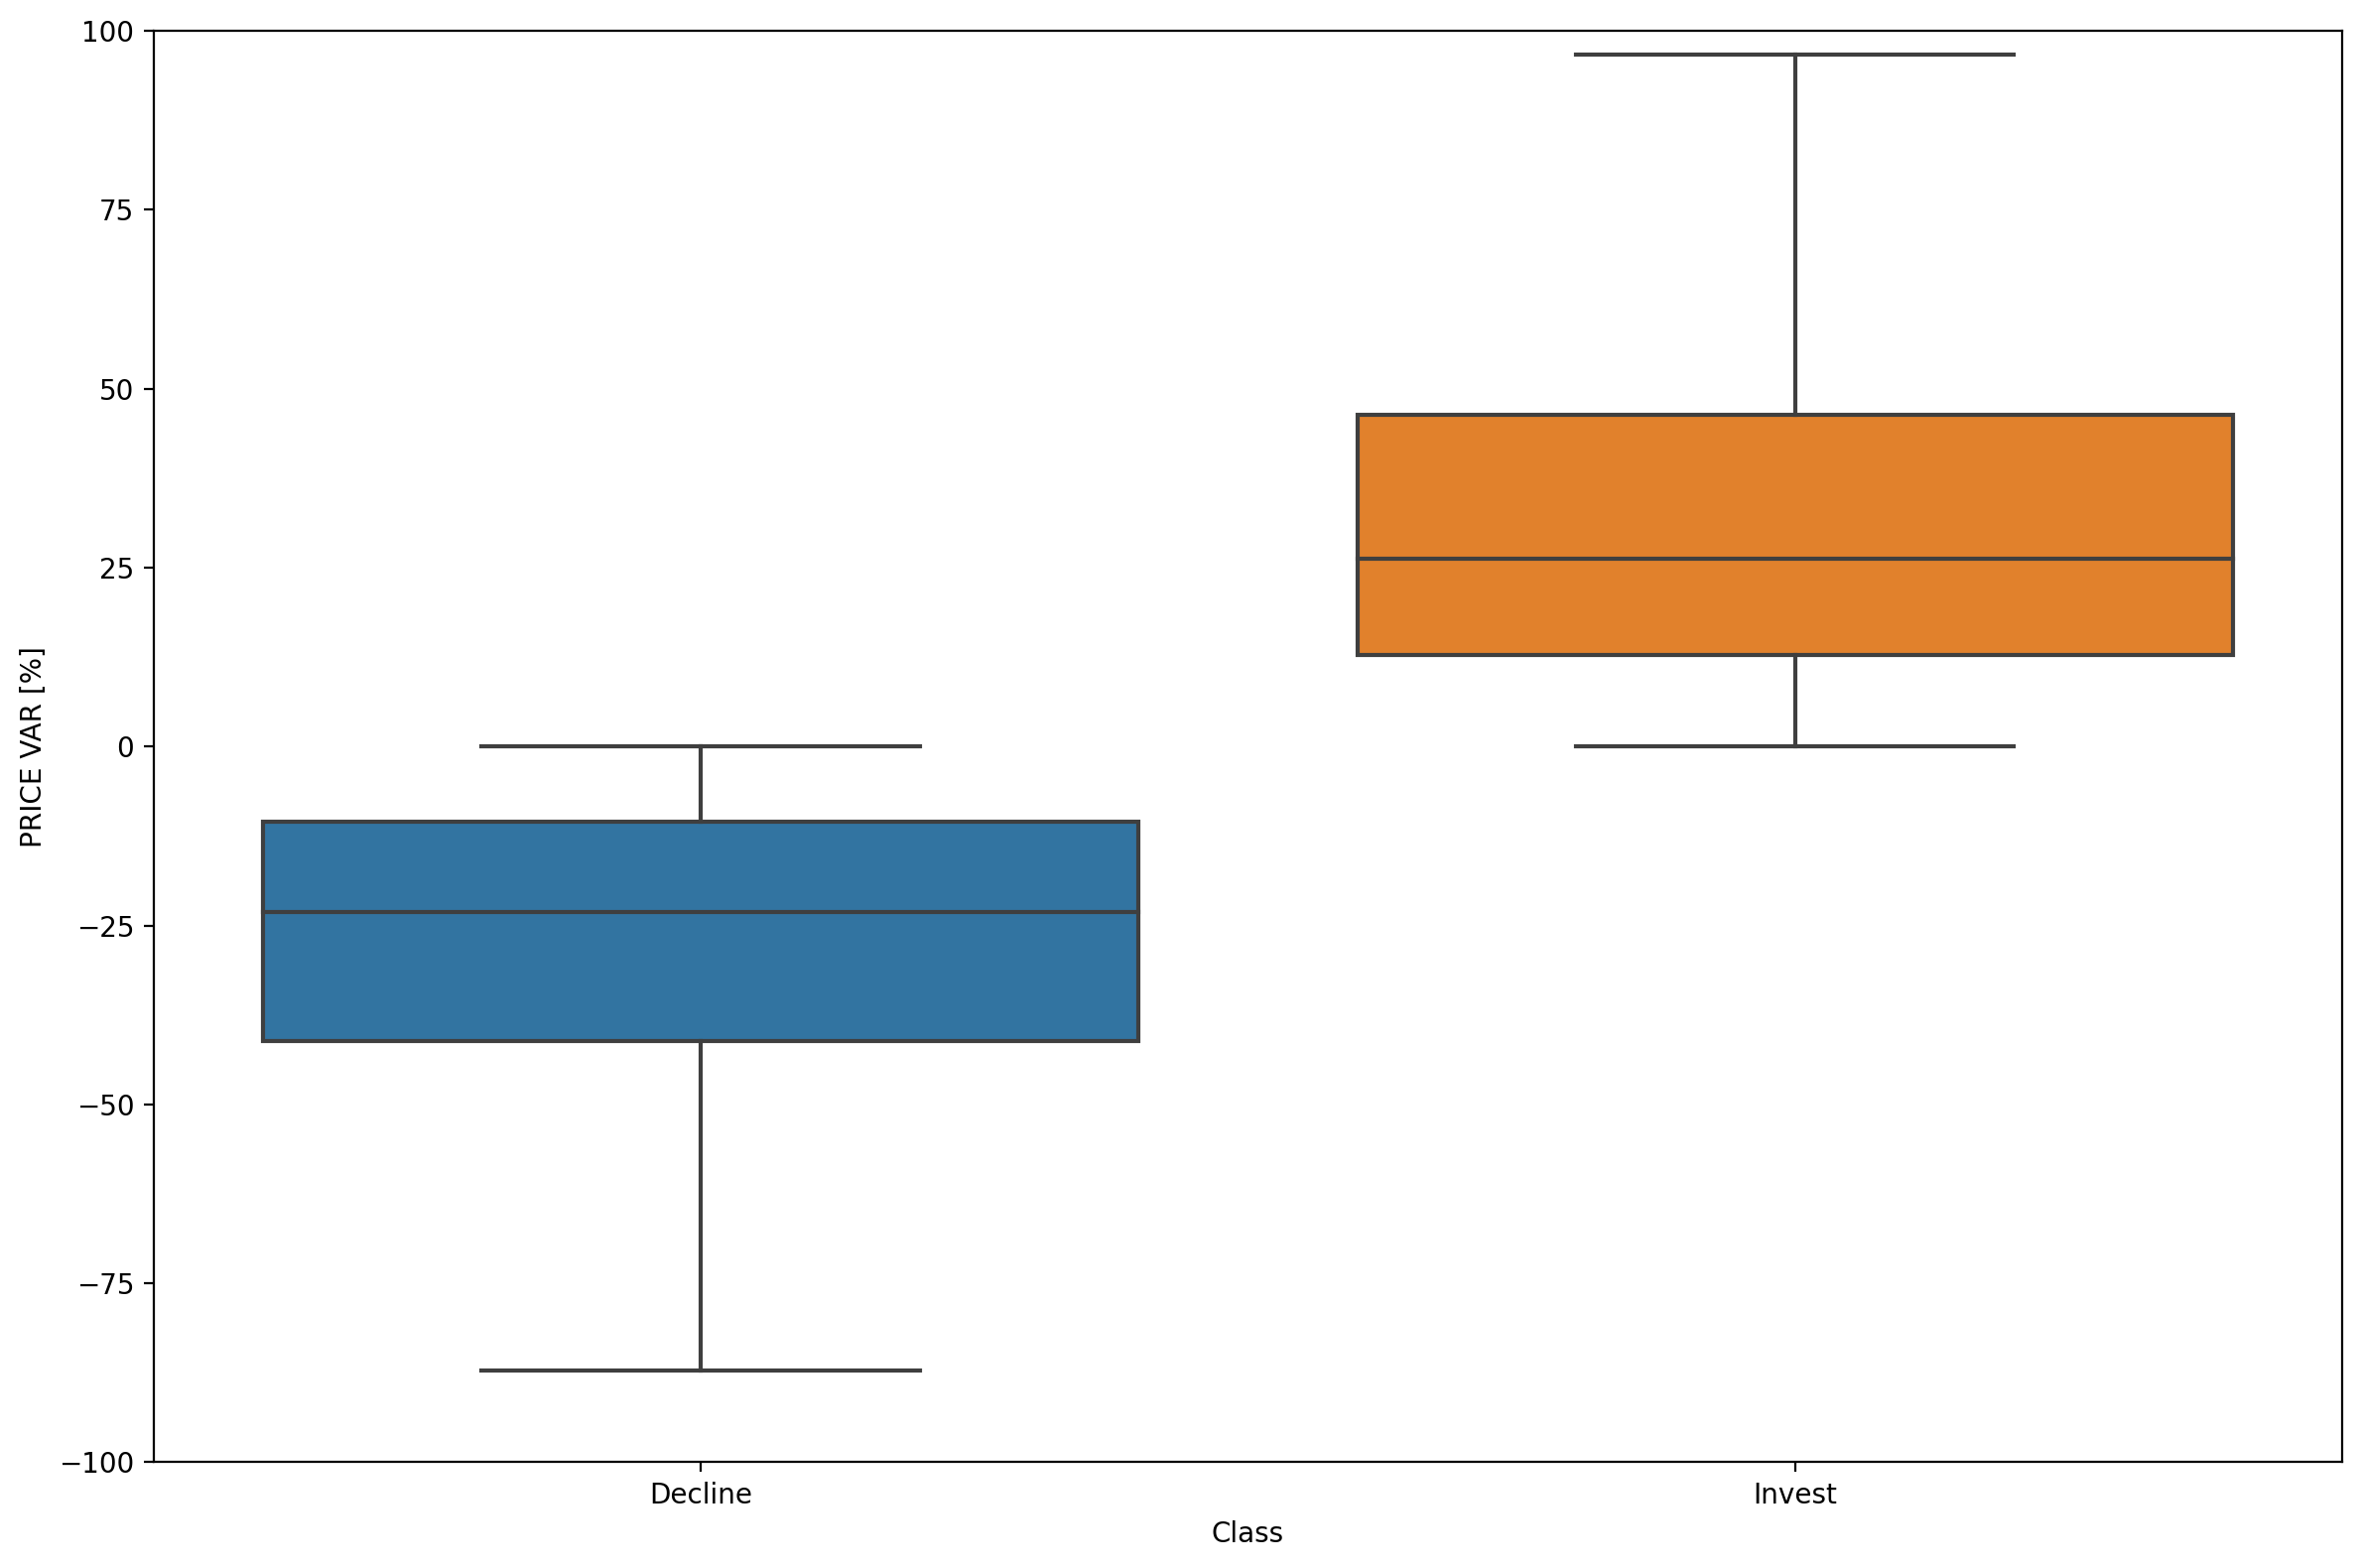

In [170]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)
ax = sns.boxplot(x = 'Class', y = 'PRICE VAR [%]', data = indicators, showfliers = False)
ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-100, 100)

plt.tight_layout()

plt.show()

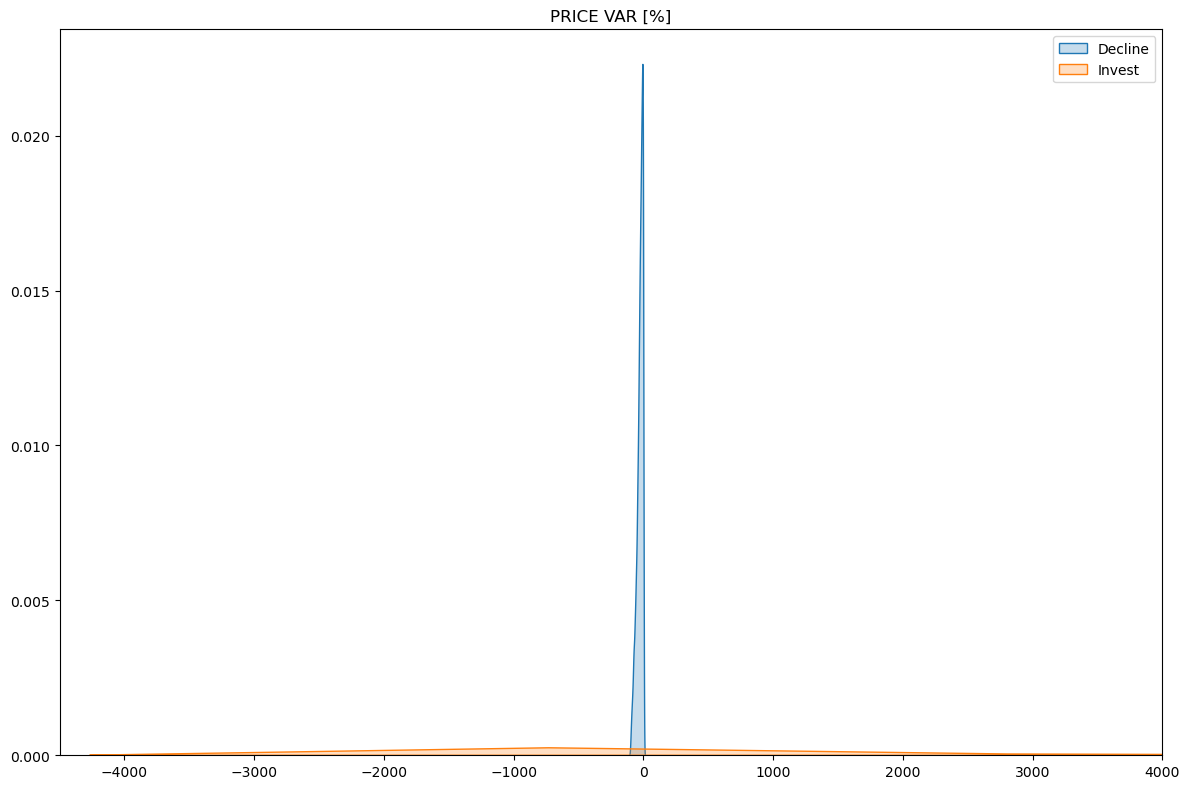

In [171]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['PRICE VAR [%]'], shade=True, label = 'Decline')

sns.kdeplot(indicators[indicators.Class == 1]['PRICE VAR [%]'], shade=True, label = 'Invest')

plt.xlabel(None)

plt.ylabel(None)

plt.xlim(-4500, 4000)

plt.legend()

plt.title('PRICE VAR [%]')

plt.tight_layout()

In [172]:
invest_atr = invest['Asset Turnover Ratio']

decline_atr = decline['Asset Turnover Ratio']

In [173]:
stats.normaltest(invest_atr)

NormaltestResult(statistic=9186.636027091974, pvalue=0.0)

In [174]:
stats.normaltest(decline_atr)

NormaltestResult(statistic=6035.82502750759, pvalue=0.0)

In [212]:
obs_difference = np.mean(invest_atr) - np.mean(decline_atr)

In [215]:
obs_difference = abs(obs_difference)

In [217]:
obs_difference

0.04010303161881612

In [175]:
atr = indicators[['Asset Turnover Ratio', 'Class']]

In [176]:
atr

Asset Turnover Ratio  Class
Year Stock                             
2014 PG                 0.515721      0
     KR                 3.359687      1
     RAD                3.675578      1
     GIS                0.773777      1
     PM                 2.276579      1
...                          ...    ...
2018 WVFC               0.019774      1
     WVVI               0.375387      0
     XELB               0.256890      1
     YTEN               0.042901      0
     ZKIN               0.718395      0

[14352 rows x 2 columns]

In [187]:
# First, make a list called difference.
difference = []

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google. 
for i in range(10000):
    atr[i] = np.random.permutation(atr['Asset Turnover Ratio'])
    difference.append(atr[i].groupby(atr['Class']).mean()[0] - atr[i].groupby(atr['Class']).mean()[1])

In [188]:
atr.shape

(14352, 10002)

<AxesSubplot:ylabel='Count'>

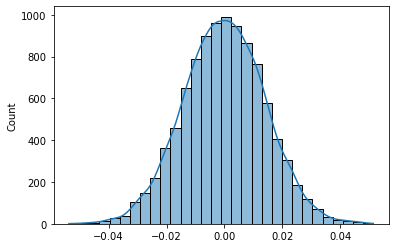

In [196]:
sns.histplot(difference, bins=30, kde = True)

In [190]:
len(difference)

10000

In [202]:
np.mean(difference)

-8.25593922280278e-05

In [218]:
np.sum((obs_difference >= np.mean(difference)) / len(difference))

0.0001